In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/staff-attire-detect-sample-video/sample.mp4


In [2]:
!nvidia-smi

Thu Oct 26 12:11:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5016.7/8062.4 GB disk)


In [4]:
import os
from ultralytics import YOLO
from IPython.display import display, Image

HOME = os.getcwd()
print(HOME)

/kaggle/working


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# Download the dataset version based on your modification 
# Simlpy choose the dataset you want and export with generated code as below
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VgT3DjGuCJJ44HONUfRE")
project = rf.workspace("qi-ming").project("staff-attire-identification")
dataset = project.version(4).download("yolov8")

/kaggle/working/datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.9 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/49.1 MB ? eta -:--:--

     ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/49.1 MB 140.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/49.1 MB 167.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━ 22.1/49.1 MB 168.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━ 27.9/49.1 MB 168.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 39.8/49.1 MB 169.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 46.0/49.1 MB 178.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 49.1/49.1 MB 173.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 49.1/49.1 MB 173.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 49.1/49.1 MB 173.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 49.1/49.1 MB 173.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 49.1/49.1 MB 173.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 27.1 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/67.8 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.7 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 7.8 MB/s eta 0:00:00


  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9


  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:


      Successfully uninstalled opencv-python-headless-4.8.0.76


  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4


  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:


      Successfully uninstalled cycler-0.11.0


  Attempting uninstall: certifi
    Found existing installation: certifi 2023.7.22
    Uninstalling certifi-2023.7.22:


      Successfully uninstalled certifi-2023.7.22


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-lsp 4.2.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pytoolconfig 1.2.5 requires packaging>=22.0, but you have packaging 21.3 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.2 which is incompatible.


A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5


loading Roboflow workspace...


loading Roboflow project...


Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Staff-Attire-Identification-4 in yolov8::   0%|          | 0/1668 [00:00<?, ?it/s]

Extracting Dataset Version Zip to Staff-Attire-Identification-4 in yolov8::  23%|██▎       | 384/1668 [00:00<00:00, 3830.82it/s]

Extracting Dataset Version Zip to Staff-Attire-Identification-4 in yolov8::  46%|████▌     | 768/1668 [00:00<00:00, 3552.59it/s]

Extracting Dataset Version Zip to Staff-Attire-Identification-4 in yolov8:: 100%|██████████| 1668/1668 [00:00<00:00, 5320.70it/s]

#### Train model

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=960 plots=True

/kaggle/working


  0%|                                               | 0.00/21.5M [00:00<?, ?B/s]

 73%|████████████████████████████▎          | 15.6M/21.5M [00:00<00:00, 164MB/s]

100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 188MB/s]



Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/kaggle/working/datasets/Staff-Attire-Identification-4/data.yaml, epochs=50, patience=50, batch=16, imgsz=960, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.0

100%|████████████████████████████████████████| 755k/755k [00:00<00:00, 21.1MB/s]


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     


  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              


  8                  -1  1   1838080  ultralytics.nn.modules.C2f                   [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.SPPF                  [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.Concat                [1]                           
 12                  -1  1    591360  ultralytics.nn.modules.C2f                   [768, 256, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.Concat                [1]                           
 15                  -1  1    148224  ultralytics.nn.modules.C2f                   [384, 128, 1]                 
 16                  -1  1    147712  ultralytics.nn.modules.Conv                  [128,

 21                  -1  1   1969152  ultralytics.nn.modules.C2f                   [768, 512, 1]                 
 22        [15, 18, 21]  1   2116435  ultralytics.nn.modules.Detect                [1, [128, 256, 512]]          


Model summary: 225 layers, 11135987 parameters, 11135971 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights


optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias
train: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/train/lab

train: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/train/lab

train: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/train/lab

train: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/train/lab

train: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/train/lab

train: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/train/lab
train: New cache created: /kaggle/working/datasets/Staff-Attire-Identification-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/valid/label

val: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/valid/label
val: New cache created: /kaggle/working/datasets/Staff-Attire-Identification-4/valid/labels.cache


Image sizes 960 train, 960 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

       1/50      7.81G      3.037      238.2      1.302         24        960:  

       1/50      7.81G      3.037      238.2      1.302         24        960:  

       1/50      8.35G      3.055      177.4      1.402         24        960:  

       1/50      8.35G       2.79      143.5       1.36         20        960:  

       1/50      8.35G      2.714      155.9      1.296         15        960:  

       1/50      8.35G       2.74      145.9      1.287         17        960:  

       1/50      8.35G      2.755      146.8      1.283         23        960:  

       1/50      8.35G      2.894      150.8      1.298         18        960:  

       1/50      8.35G      2.926      159.5      1.288         18        960:  

       1/50      8.35G      2.888        153      1.282         20        960:  

       1/50      8.35G      2.892      152.1      1.273         15        960:  

       1/50      8.35G      2.861      153.3      1.254         17        960:  

       1/50      8.35G      2.822      152.2      1.238         17        960:  

       1/50      8.35G       2.86      156.3       1.28         26        960:  

       1/50      8.37G      2.804      150.3      1.285         22        960:  

       1/50      8.38G      2.815        147      1.288         24        960:  

       1/50      8.38G      2.832      141.1      1.286         25        960:  

       1/50      8.38G      2.827      134.8      1.286         17        960:  

       1/50      8.38G      2.762      128.4      1.273         19        960:  

       1/50      8.38G      2.768      122.4      1.264         14        960:  

       1/50      8.38G      2.752      116.6      1.257         28        960:  

       1/50      8.38G      2.738      111.4       1.26         15        960:  

       1/50      8.38G      2.716      106.5      1.251         17        960:  

       1/50      8.38G      2.687        102      1.244         14        960:  

       1/50      8.38G      2.675      97.84       1.24         21        960:  

       1/50      8.38G       2.65      94.04      1.233         23        960:  

       1/50      8.38G      2.629      90.51      1.227         16        960:  

       1/50      8.38G      2.606      87.23      1.218         26        960:  

       1/50      8.38G      2.599      84.18      1.211         23        960:  

       1/50      8.38G      2.577      81.38       1.21         16        960:  

       1/50      8.38G      2.576      78.75      1.206         20        960:  

       1/50      8.38G      2.568      76.26        1.2         20        960:  

       1/50      8.38G       2.56      73.94      1.202         11        960:  

       1/50      8.38G      2.554      71.76      1.197         20        960:  

       1/50      8.38G      2.546      69.71       1.19         23        960:  

       1/50      8.38G      2.544      67.77      1.185         21        960:  

       1/50      8.38G      2.527      65.95      1.179         15        960:  

       1/50      8.38G      2.522      64.23      1.176         14        960:  

       1/50      8.38G       2.51      62.61       1.17         16        960:  

       1/50      8.38G      2.504      61.06      1.169         17        960:  

       1/50      8.38G       2.48      59.61      1.166         15        960:  

       1/50      8.38G      2.466       58.2      1.162         17        960:  

       1/50      8.38G      2.461      56.86       1.16         22        960:  

       1/50      8.38G      2.445       55.6      1.156         18        960:  

       1/50      8.38G      2.438      54.39      1.152         14        960:  

       1/50      8.38G       2.43      53.22      1.145         28        960:  

       1/50      8.38G      2.423       52.1      1.142          2        960: 1

       1/50      8.38G      2.423       52.1      1.142          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.626      0.648      0.651      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

       2/50      8.39G      2.171      1.753     0.8904         31        960:  

       2/50      8.39G      2.171      1.753     0.8904         31        960:  

       2/50      8.39G      2.271       1.79      1.042         21        960:  

       2/50      8.39G       2.27      1.659      1.042         20        960:  

       2/50      8.39G       2.17      1.787      1.032         17        960:  

       2/50      8.39G      2.228       1.71      1.021         20        960:  

       2/50      8.39G      2.254       1.66      1.022         16        960:  

       2/50      8.39G      2.255      1.637      1.018         15        960:  

       2/50      8.39G      2.267      1.727      1.027         18        960:  

       2/50      8.39G      2.257      1.795      1.022         27        960:  

       2/50      8.39G      2.236      1.746      1.011         20        960:  

       2/50      8.39G      2.203      1.687      1.003         17        960:  

       2/50      8.39G      2.178      1.683      1.008         16        960:  

       2/50      8.39G      2.161      1.671      1.015         18        960:  

       2/50      8.39G      2.149      1.674      1.015         25        960:  

       2/50      8.39G      2.132      1.696      1.018         20        960:  

       2/50      8.39G      2.118       1.67      1.018         16        960:  

       2/50      8.39G      2.117      1.643      1.017         19        960:  

       2/50      8.39G      2.103       1.67       1.02         23        960:  

       2/50      8.39G      2.092      1.664      1.016         13        960:  

       2/50      8.39G       2.09      1.637      1.013         24        960:  

       2/50      8.39G      2.103       1.63      1.012         18        960:  

       2/50      8.39G      2.095      1.618      1.012         18        960:  

       2/50      8.39G      2.112      1.602      1.014         17        960:  

       2/50      8.39G      2.112      1.592       1.01         17        960:  

       2/50      8.39G      2.128      1.584       1.01         15        960:  

       2/50      8.39G      2.115      1.579      1.009         21        960:  

       2/50      8.39G      2.103      1.583      1.012         15        960:  

       2/50      8.39G      2.108      1.582      1.016         24        960:  

       2/50      8.39G      2.112      1.591      1.017         14        960:  

       2/50      8.39G      2.117      1.605      1.016         26        960:  

       2/50      8.39G       2.12      1.626      1.016         22        960:  

       2/50      8.39G      2.123      1.639      1.016         20        960:  

       2/50      8.39G      2.116      1.627      1.017         17        960:  

       2/50      8.39G      2.114      1.614      1.018         18        960:  

       2/50      8.39G      2.107      1.616      1.018         19        960:  

       2/50      8.39G      2.103      1.607      1.016         14        960:  

       2/50      8.39G      2.104        1.6      1.015         11        960:  

       2/50      8.39G      2.107      1.606      1.013         21        960:  

       2/50      8.39G      2.101      1.601      1.012         18        960:  

       2/50      8.39G        2.1      1.602      1.011         20        960:  

       2/50      8.39G      2.102      1.609      1.013         17        960:  

       2/50      8.39G      2.095      1.616      1.013         27        960:  

       2/50      8.39G      2.097       1.63      1.011         18        960:  

       2/50      8.39G      2.089      1.629       1.01         20        960:  

       2/50      8.39G      2.087      1.616      1.011         19        960:  

       2/50      8.39G      2.096      1.607       1.01          4        960: 1

       2/50      8.39G      2.096      1.607       1.01          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.875      0.777      0.794      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

       3/50      8.39G      2.438      1.345     0.9639         23        960:  

       3/50      8.39G      2.298      1.786       1.01         24        960:  

       3/50      8.39G      2.226       2.21      1.054         18        960:  

       3/50      8.39G      2.336      2.358      1.041         20        960:  

       3/50      8.39G      2.337      2.128      1.016         18        960:  

       3/50      8.39G      2.328      2.032      1.007         20        960:  

       3/50      8.39G      2.275      1.902      1.003         16        960:  

       3/50      8.39G      2.254      1.821     0.9972         20        960:  

       3/50      8.39G       2.25      1.749     0.9987         15        960:  

       3/50      8.39G      2.254      1.724     0.9966         22        960:  

       3/50      8.39G      2.263       1.68      1.002         15        960:  

       3/50      8.39G      2.242      1.635     0.9988         19        960:  

       3/50      8.39G      2.249      1.606      1.006         14        960:  

       3/50      8.39G      2.249      1.657      1.006         21        960:  

       3/50      8.39G      2.242      1.689      1.001         20        960:  

       3/50      8.39G      2.251      1.683     0.9992         18        960:  

       3/50      8.39G      2.219      1.666     0.9919         19        960:  

       3/50      8.39G      2.214      1.663      1.004         20        960:  

       3/50      8.39G        2.2      1.668      1.006         18        960:  

       3/50      8.39G      2.196      1.659      1.004         22        960:  

       3/50      8.39G      2.188      1.681      1.011         20        960:  

       3/50      8.39G      2.188       1.68      1.008         25        960:  

       3/50      8.39G      2.184      1.673      1.014         17        960:  

       3/50      8.39G      2.176      1.671      1.013         17        960:  

       3/50      8.39G      2.174       1.67       1.01         19        960:  

       3/50      8.39G       2.16      1.665      1.005         13        960:  

       3/50      8.39G      2.156      1.689      1.007         26        960:  

       3/50      8.39G       2.16      1.729      1.019         18        960:  

       3/50      8.39G      2.174      1.745       1.02         22        960:  

       3/50      8.39G      2.171      1.762      1.021         17        960:  

       3/50      8.39G      2.169      1.754      1.021         19        960:  

       3/50      8.39G      2.162      1.743      1.022         22        960:  

       3/50      8.39G      2.151      1.726      1.018         20        960:  

       3/50      8.39G      2.149      1.711      1.022         17        960:  

       3/50      8.39G      2.156      1.764      1.022         23        960:  

       3/50      8.39G      2.154      1.775      1.022         22        960:  

       3/50      8.39G       2.16      1.814      1.026         25        960:  

       3/50      8.39G      2.174      1.853      1.028         18        960:  

       3/50      8.39G      2.171      1.873      1.028         24        960:  

       3/50      8.39G      2.162       1.88      1.029         12        960:  

       3/50      8.39G      2.159      1.915      1.031         23        960:  

       3/50      8.39G      2.158      1.913       1.03         20        960:  

       3/50      8.39G      2.171      1.901      1.032         21        960:  

       3/50      8.39G      2.165      1.882      1.031         20        960:  

       3/50      8.39G       2.17      1.865      1.033         16        960:  

       3/50      8.39G      2.166      1.866      1.032          2        960: 1

       3/50      8.39G      2.166      1.866      1.032          2        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.724      0.648      0.713       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

       4/50      8.39G       2.09      1.543      1.061         16        960:  

       4/50      8.39G      1.968      1.427      1.009         17        960:  

       4/50      8.39G      1.872      1.345     0.9892         14        960:  

       4/50      8.39G      2.035      1.351      1.078         19        960:  

       4/50      8.39G      2.035      1.351      1.078         19        960:  

       4/50      8.39G      2.098       1.44       1.07         17        960:  

       4/50      8.39G      2.103      1.536      1.064         22        960:  

       4/50      8.39G      2.116      1.593      1.062         24        960:  

       4/50      8.39G      2.135      1.658      1.062         28        960:  

       4/50      8.39G      2.139      1.619      1.063         23        960:  

       4/50      8.39G      2.139      1.583      1.053         14        960:  

       4/50      8.39G      2.136      1.535      1.053         19        960:  

       4/50      8.39G      2.161      1.498      1.059         25        960:  

       4/50      8.39G      2.172      1.484      1.062         21        960:  

       4/50      8.39G      2.185       1.46      1.063         20        960:  

       4/50      8.39G      2.176      1.434      1.049         13        960:  

       4/50      8.39G      2.176      1.418      1.048         20        960:  

       4/50      8.39G      2.199      1.404      1.055         20        960:  

       4/50      8.39G      2.214      1.398      1.046         23        960:  

       4/50      8.39G      2.195      1.405      1.049         17        960:  

       4/50      8.39G      2.189      1.388      1.048         21        960:  

       4/50      8.39G      2.183      1.428      1.045         23        960:  

       4/50      8.39G      2.173      1.479      1.041         19        960:  

       4/50      8.39G      2.172      1.504      1.048         21        960:  

       4/50      8.39G      2.163      1.516      1.046         21        960:  

       4/50      8.39G      2.154        1.5      1.046         17        960:  

       4/50      8.39G      2.152      1.485      1.045         18        960:  

       4/50      8.39G      2.145      1.472      1.042         22        960:  

       4/50      8.39G      2.135      1.478      1.041         20        960:  

       4/50      8.39G      2.127      1.483      1.039         22        960:  

       4/50      8.39G      2.124      1.498      1.036         29        960:  

       4/50      8.39G      2.128      1.512      1.041         17        960:  

       4/50      8.39G      2.117      1.511       1.04         21        960:  

       4/50      8.39G       2.11      1.498      1.038         23        960:  

       4/50      8.39G      2.111      1.495      1.034         16        960:  

       4/50      8.39G      2.113      1.495      1.036         16        960:  

       4/50      8.39G      2.115      1.489      1.037         16        960:  

       4/50      8.39G      2.112      1.493      1.033         14        960:  

       4/50      8.39G      2.112      1.493      1.033         14        960:  

       4/50      8.39G      2.109      1.513      1.029         22        960:  

       4/50      8.39G      2.113      1.515      1.029         25        960:  

       4/50      8.39G       2.11      1.537      1.037         17        960:  

       4/50      8.39G      2.117      1.549      1.035         14        960:  

       4/50      8.39G       2.12      1.565      1.036         17        960:  

       4/50      8.39G      2.123      1.569      1.036         26        960:  

       4/50      8.39G      2.124      1.567      1.035         14        960:  

       4/50      8.39G      2.126      1.571       1.04         18        960:  

       4/50      8.39G      2.138      1.575      1.037          6        960: 1

       4/50      8.39G      2.138      1.575      1.037          6        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.585      0.732       0.69      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

       5/50      8.39G      2.215      1.243      1.061         15        960:  

       5/50      8.39G      2.074      1.303      1.009         16        960:  

       5/50      8.39G      2.227      1.396      1.032         21        960:  

       5/50      8.39G      2.239      1.466       1.05         18        960:  

       5/50      8.39G      2.263      1.516      1.061         19        960:  

       5/50      8.39G      2.235       1.54      1.068         21        960:  

       5/50      8.39G      2.179       1.73      1.062         13        960:  

       5/50      8.39G       2.18      1.873      1.056         29        960:  

       5/50      8.39G      2.183      1.939      1.053         16        960:  

       5/50      8.39G       2.17      1.966      1.045         24        960:  

       5/50      8.39G      2.149      1.974      1.031         25        960:  

       5/50      8.39G      2.116      1.934      1.022         16        960:  

       5/50      8.39G      2.121       1.91      1.028         20        960:  

       5/50      8.39G      2.134      1.874      1.032         17        960:  

       5/50      8.39G      2.169      1.859      1.032         13        960:  

       5/50      8.39G      2.168       1.84      1.028         18        960:  

       5/50      8.39G      2.184      1.851      1.037         24        960:  

       5/50      8.39G      2.184      1.851      1.037         24        960:  

       5/50      8.39G      2.169      1.814      1.037         18        960:  

       5/50      8.39G      2.157      1.807      1.039         15        960:  

       5/50      8.39G      2.161      1.819      1.038         20        960:  

       5/50      8.39G      2.152      1.817      1.033         14        960:  

       5/50      8.39G      2.167      1.817      1.037         19        960:  

       5/50      8.39G      2.161      1.791      1.033         14        960:  

       5/50      8.39G      2.156      1.762       1.03         26        960:  

       5/50      8.39G      2.154      1.733      1.027         24        960:  

       5/50      8.39G      2.151      1.715      1.025         19        960:  

       5/50      8.39G      2.163      1.693      1.021         25        960:  

       5/50      8.39G      2.164      1.687      1.017         23        960:  

       5/50      8.39G       2.16      1.679      1.016         18        960:  

       5/50      8.39G      2.159      1.659      1.015         28        960:  

       5/50      8.39G      2.159      1.652      1.018         14        960:  

       5/50      8.39G      2.153      1.633      1.017         21        960:  

       5/50      8.39G       2.16      1.621      1.015         21        960:  

       5/50      8.39G       2.16      1.615      1.014         18        960:  

       5/50      8.39G      2.166      1.615      1.018         11        960:  

       5/50      8.39G       2.17      1.611       1.02         24        960:  

       5/50      8.39G      2.165      1.603      1.019         16        960:  

       5/50      8.39G      2.175      1.604      1.018         17        960:  

       5/50      8.39G      2.186      1.595      1.016         24        960:  

       5/50      8.39G      2.215      1.614      1.027         22        960:  

       5/50      8.39G      2.206        1.6      1.028         22        960:  

       5/50      8.39G      2.212      1.595      1.028         20        960:  

       5/50      8.39G      2.214       1.59       1.03         21        960:  

       5/50      8.39G      2.216      1.583      1.031         32        960:  

       5/50      8.39G      2.216      1.574      1.033         18        960:  

       5/50      8.39G      2.212       1.56      1.037          2        960: 1

       5/50      8.39G      2.212       1.56      1.037          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.744      0.833      0.833      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

       6/50      8.39G      2.071      1.044     0.9036         20        960:  

       6/50      8.39G      2.244      1.166      0.975         26        960:  

       6/50      8.39G      2.184      1.141     0.9582         26        960:  

       6/50      8.39G      2.102      1.124     0.9707         15        960:  

       6/50      8.39G      2.118      1.183     0.9764         20        960:  

       6/50      8.39G      2.095      1.177     0.9712         16        960:  

       6/50      8.39G        2.1      1.192     0.9726         26        960:  

       6/50      8.39G      2.102      1.244     0.9799         16        960:  

       6/50      8.39G      2.116      1.221     0.9889         16        960:  

       6/50      8.39G      2.116      1.224      0.984         23        960:  

       6/50      8.39G      2.128      1.233     0.9798         20        960:  

       6/50      8.39G      2.107      1.218     0.9803         21        960:  

       6/50      8.39G       2.12      1.226     0.9814         24        960:  

       6/50      8.39G      2.114      1.213     0.9833         22        960:  

       6/50      8.39G      2.114      1.213     0.9833         22        960:  

       6/50      8.39G      2.119      1.219     0.9865         14        960:  

       6/50      8.39G       2.11      1.212     0.9886         16        960:  

       6/50      8.39G      2.119      1.209     0.9956         25        960:  

       6/50      8.39G      2.139      1.221     0.9942         19        960:  

       6/50      8.39G      2.148      1.215     0.9928         24        960:  

       6/50      8.39G      2.154      1.233     0.9933         11        960:  

       6/50      8.39G      2.146      1.226     0.9932         20        960:  

       6/50      8.39G      2.138      1.218      0.994         21        960:  

       6/50      8.39G      2.137      1.212     0.9922         25        960:  

       6/50      8.39G      2.135      1.213     0.9883         17        960:  

       6/50      8.39G      2.137      1.203     0.9852         23        960:  

       6/50      8.39G      2.158      1.213     0.9884         21        960:  

       6/50      8.39G      2.156      1.216     0.9873         21        960:  

       6/50      8.39G      2.152       1.21     0.9853         10        960:  

       6/50      8.39G      2.156      1.207     0.9846         24        960:  

       6/50      8.39G      2.154      1.201     0.9856         21        960:  

       6/50      8.39G      2.151      1.195     0.9885         17        960:  

       6/50      8.39G      2.146      1.194     0.9898         19        960:  

       6/50      8.39G      2.145      1.191     0.9907         20        960:  

       6/50      8.39G      2.141      1.189     0.9899         20        960:  

       6/50      8.39G      2.141      1.188     0.9952         21        960:  

       6/50      8.39G      2.139      1.188     0.9964         22        960:  

       6/50      8.39G      2.136      1.184      0.996         21        960:  

       6/50      8.39G      2.132      1.195     0.9971         23        960:  

       6/50      8.39G      2.136      1.194     0.9976         23        960:  

       6/50      8.39G      2.134      1.192          1         19        960:  

       6/50      8.39G      2.135      1.189     0.9996         25        960:  

       6/50      8.39G      2.143       1.19      1.001         23        960:  

       6/50      8.39G      2.144      1.193          1         20        960:  

       6/50      8.39G      2.144      1.193          1         20        960:  

       6/50      8.39G      2.147      1.188          1         17        960:  

       6/50      8.39G      2.144      1.184      0.999         14        960:  

       6/50      8.39G      2.128      1.181     0.9969          3        960: 1

       6/50      8.39G      2.128      1.181     0.9969          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.778      0.712      0.804       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

       7/50      8.39G      2.153      1.002     0.9069         17        960:  

       7/50      8.39G      2.163      1.078     0.9394         24        960:  

       7/50      8.39G      2.126       1.04     0.9534         19        960:  

       7/50      8.39G      2.152      1.052     0.9742         26        960:  

       7/50      8.39G      2.186      1.088     0.9857         16        960:  

       7/50      8.39G      2.216      1.094     0.9934         19        960:  

       7/50      8.39G      2.168      1.058     0.9906         20        960:  

       7/50      8.39G      2.182      1.038     0.9959         24        960:  

       7/50      8.39G      2.161      1.052     0.9995         27        960:  

       7/50      8.39G      2.191      1.065      1.008         18        960:  

       7/50      8.39G      2.191      1.069      1.018         18        960:  

       7/50      8.39G      2.225      1.078      1.025         15        960:  

       7/50      8.39G      2.221       1.09      1.026         14        960:  

       7/50      8.39G      2.249      1.104      1.033         19        960:  

       7/50      8.39G      2.249      1.104      1.033         19        960:  

       7/50      8.39G      2.236      1.098      1.035         17        960:  

       7/50      8.39G      2.219      1.097       1.03         21        960:  

       7/50      8.39G      2.217      1.102      1.026         18        960:  

       7/50      8.39G      2.211      1.096      1.022         18        960:  

       7/50      8.39G      2.214      1.119      1.027         17        960:  

       7/50      8.39G      2.213      1.119      1.022         21        960:  

       7/50      8.39G      2.209      1.137      1.023         16        960:  

       7/50      8.39G      2.203      1.144       1.02         20        960:  

       7/50      8.39G      2.198      1.153      1.019         25        960:  

       7/50      8.39G      2.187      1.158       1.02         17        960:  

       7/50      8.39G      2.188      1.177       1.02         22        960:  

       7/50      8.39G      2.185      1.183      1.019         22        960:  

       7/50      8.39G      2.181      1.179      1.016         22        960:  

       7/50      8.39G      2.173      1.181      1.015         21        960:  

       7/50      8.39G      2.178      1.201      1.017         14        960:  

       7/50      8.39G      2.173        1.2      1.015         15        960:  

       7/50      8.39G      2.176       1.19      1.015         22        960:  

       7/50      8.39G      2.185      1.186      1.017         20        960:  

       7/50      8.39G      2.188       1.18      1.015         17        960:  

       7/50      8.39G      2.183      1.173      1.013         17        960:  

       7/50      8.39G      2.194      1.179       1.02         19        960:  

       7/50      8.39G      2.195      1.178      1.019         19        960:  

       7/50      8.39G      2.202      1.179      1.021         19        960:  

       7/50      8.39G      2.198      1.173       1.02         15        960:  

       7/50      8.39G      2.194      1.167      1.018         26        960:  

       7/50      8.39G      2.187      1.165      1.016         25        960:  

       7/50      8.39G       2.18      1.161      1.018         13        960:  

       7/50      8.39G      2.185       1.16       1.02         17        960:  

       7/50      8.39G      2.179      1.158      1.022         18        960:  

       7/50      8.39G      2.171      1.153       1.02         21        960:  

       7/50      8.39G      2.166      1.152      1.019         20        960:  

       7/50      8.39G      2.197      1.162      1.021          8        960: 1

       7/50      8.39G      2.197      1.162      1.021          8        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.833      0.834      0.907      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

       8/50      8.39G      2.406      1.665     0.9453         20        960:  

       8/50      8.39G      2.145      1.327     0.9761         11        960:  

       8/50      8.39G      2.135      1.293     0.9836         29        960:  

       8/50      8.39G      2.174      1.346      1.004         25        960:  

       8/50      8.39G      2.171      1.292      1.013         26        960:  

       8/50      8.39G      2.191      1.289      1.016         18        960:  

       8/50      8.39G       2.17      1.353      1.046         21        960:  

       8/50      8.39G      2.195      1.355      1.044         15        960:  

       8/50      8.39G      2.185      1.311       1.04         17        960:  

       8/50      8.39G      2.146       1.28      1.034         13        960:  

       8/50      8.39G      2.134      1.264      1.028         17        960:  

       8/50      8.39G       2.13      1.243      1.028         15        960:  

       8/50      8.39G      2.122      1.264      1.035         18        960:  

       8/50      8.39G      2.107      1.238      1.028         22        960:  

       8/50      8.39G       2.12      1.277       1.04         19        960:  

       8/50      8.39G      2.128       1.26      1.039         19        960:  

       8/50      8.39G      2.117      1.257      1.038         11        960:  

       8/50      8.39G      2.117      1.243      1.035         18        960:  

       8/50      8.39G      2.115      1.239      1.028         21        960:  

       8/50      8.39G      2.126      1.242      1.037         17        960:  

       8/50      8.39G      2.127      1.234      1.037         15        960:  

       8/50      8.39G      2.116      1.222      1.037         18        960:  

       8/50      8.39G      2.122      1.215      1.038         19        960:  

       8/50      8.39G      2.118      1.205      1.039         18        960:  

       8/50      8.39G      2.107      1.214      1.042         17        960:  

       8/50      8.39G      2.103      1.203      1.038         20        960:  

       8/50      8.39G      2.098      1.197      1.034         21        960:  

       8/50      8.39G      2.101       1.19      1.032         26        960:  

       8/50      8.39G      2.099      1.185      1.032         18        960:  

       8/50      8.39G      2.091       1.19      1.031         21        960:  

       8/50      8.39G      2.088      1.187       1.03         19        960:  

       8/50      8.39G      2.092      1.181       1.03         24        960:  

       8/50      8.39G      2.079      1.175      1.026         18        960:  

       8/50      8.39G      2.077      1.187      1.025         14        960:  

       8/50      8.39G      2.071      1.186      1.024         15        960:  

       8/50      8.39G       2.07      1.184      1.023         18        960:  

       8/50      8.39G      2.077      1.198       1.02         15        960:  

       8/50      8.39G      2.076      1.197      1.021         14        960:  

       8/50      8.39G      2.069      1.197      1.018         20        960:  

       8/50      8.39G      2.071      1.195      1.018         13        960:  

       8/50      8.39G      2.071      1.197      1.019         18        960:  

       8/50      8.39G      2.072        1.2      1.018         16        960:  

       8/50      8.39G      2.073      1.193      1.017         21        960:  

       8/50      8.39G      2.083       1.19      1.021         19        960:  

       8/50      8.39G      2.075      1.187      1.021         20        960:  

       8/50      8.39G      2.066      1.179       1.02          3        960: 1

       8/50      8.39G      2.066      1.179       1.02          3        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54        0.8      0.796      0.833      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

       9/50      8.39G      2.057     0.9489     0.9678         21        960:  

       9/50      8.39G      2.081      0.984     0.9967         16        960:  

       9/50      8.39G      2.087      1.012      1.003         26        960:  

       9/50      8.39G      2.084      1.001      1.019         23        960:  

       9/50      8.39G       2.08      1.053      1.033         24        960:  

       9/50      8.39G      2.065      1.019      1.008         23        960:  

       9/50      8.39G      2.095      1.034      1.008         19        960:  

       9/50      8.39G      2.118      1.053      1.006         19        960:  

       9/50      8.39G      2.106      1.053      1.011         15        960:  

       9/50      8.39G      2.118      1.055      1.006         21        960:  

       9/50      8.39G      2.112      1.058      1.001         16        960:  

       9/50      8.39G      2.112      1.058      1.001         16        960:  

       9/50      8.39G      2.112      1.062      1.016         22        960:  

       9/50      8.39G      2.099      1.059      1.015         19        960:  

       9/50      8.39G      2.093      1.056      1.016         20        960:  

       9/50      8.39G      2.086      1.057      1.016         32        960:  

       9/50      8.39G      2.073      1.045      1.013         17        960:  

       9/50      8.39G      2.061      1.042      1.012         19        960:  

       9/50      8.39G      2.058      1.034      1.009         19        960:  

       9/50      8.39G      2.066      1.028      1.006         24        960:  

       9/50      8.39G      2.065      1.022      1.008         15        960:  

       9/50      8.39G      2.069      1.019      1.008         17        960:  

       9/50      8.39G      2.091      1.021      1.014         24        960:  

       9/50      8.39G      2.102      1.023      1.009         14        960:  

       9/50      8.39G      2.108      1.022      1.006         32        960:  

       9/50      8.39G      2.101      1.021      1.006         15        960:  

       9/50      8.39G      2.118      1.022      1.015         17        960:  

       9/50      8.39G       2.13      1.037      1.013         25        960:  

       9/50      8.39G      2.123      1.035      1.014         15        960:  

       9/50      8.39G      2.135      1.039       1.01         21        960:  

       9/50      8.39G      2.136      1.038      1.009         20        960:  

       9/50      8.39G      2.132      1.036      1.008         21        960:  

       9/50      8.39G      2.136      1.036      1.006         22        960:  

       9/50      8.39G      2.129      1.036      1.005         16        960:  

       9/50      8.39G      2.116      1.039      1.003         20        960:  

       9/50      8.39G      2.109      1.039      1.003         19        960:  

       9/50      8.39G      2.109      1.045      1.001         17        960:  

       9/50      8.39G      2.107      1.051      1.002         23        960:  

       9/50      8.39G      2.108      1.055      1.004         19        960:  

       9/50      8.39G      2.101      1.056      1.005         14        960:  

       9/50      8.39G      2.102      1.065       1.01         22        960:  

       9/50      8.39G      2.098      1.064      1.009         13        960:  

       9/50      8.39G      2.099      1.068      1.006         19        960:  

       9/50      8.39G      2.096      1.065      1.004         21        960:  

       9/50      8.39G       2.09      1.063      1.003         20        960:  

       9/50      8.39G      2.081       1.06      1.001         17        960:  

       9/50      8.39G      2.072      1.064      1.001          4        960: 1

       9/50      8.39G      2.072      1.064      1.001          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.764      0.759      0.767      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      10/50      8.39G      1.986      1.169     0.9472         23        960:  

      10/50      8.39G      2.097      1.184     0.9981         19        960:  

      10/50      8.39G      2.154      1.136     0.9986         21        960:  

      10/50      8.39G      2.183      1.184     0.9824         13        960:  

      10/50      8.39G      2.196      1.157     0.9766         17        960:  

      10/50      8.39G      2.189      1.134     0.9802         17        960:  

      10/50      8.39G      2.162      1.131     0.9891         21        960:  

      10/50      8.39G      2.174       1.13     0.9836         24        960:  

      10/50      8.39G      2.202      1.151     0.9898         22        960:  

      10/50      8.39G      2.182      1.153      0.994         20        960:  

      10/50      8.39G      2.178      1.167     0.9899         21        960:  

      10/50      8.39G      2.165      1.177     0.9917         19        960:  

      10/50      8.39G       2.14      1.162     0.9907         15        960:  

      10/50      8.39G      2.135      1.156     0.9965         14        960:  

      10/50      8.39G      2.121      1.147     0.9899         25        960:  

      10/50      8.39G      2.122      1.138     0.9889         25        960:  

      10/50      8.39G      2.135      1.139     0.9891         24        960:  

      10/50      8.39G      2.119      1.136     0.9942         11        960:  

      10/50      8.39G      2.114      1.126     0.9952         18        960:  

      10/50      8.39G      2.114      1.118     0.9981         14        960:  

      10/50      8.39G      2.119      1.112      1.002          7        960:  

      10/50      8.39G      2.113      1.104      1.008         15        960:  

      10/50      8.39G      2.117      1.097      1.006         19        960:  

      10/50      8.39G      2.111      1.093      1.005         15        960:  

      10/50      8.39G      2.102      1.106      1.005         27        960:  

      10/50      8.39G      2.101      1.099      1.002         22        960:  

      10/50      8.39G      2.103      1.096      1.001         20        960:  

      10/50      8.39G      2.107      1.095      1.001         15        960:  

      10/50      8.39G      2.107      1.089      1.003         16        960:  

      10/50      8.39G      2.111      1.085      1.004         19        960:  

      10/50      8.39G      2.105      1.083      1.007         18        960:  

      10/50      8.39G      2.103      1.099      1.007         24        960:  

      10/50      8.39G      2.103      1.099      1.007         24        960:  

      10/50      8.39G      2.104      1.096      1.007         17        960:  

      10/50      8.39G      2.105      1.094      1.005         17        960:  

      10/50      8.39G      2.095      1.089      1.006         16        960:  

      10/50      8.39G      2.102      1.094      1.006         26        960:  

      10/50      8.39G      2.109      1.095      1.007         22        960:  

      10/50      8.39G      2.109      1.092      1.005         24        960:  

      10/50      8.39G      2.111      1.091      1.006         20        960:  

      10/50      8.39G      2.111      1.091      1.006         20        960:  

      10/50      8.39G      2.114      1.097      1.004         15        960:  

      10/50      8.39G      2.114      1.094      1.005         16        960:  

      10/50      8.39G      2.108      1.091      1.003         18        960:  

      10/50      8.39G      2.099      1.085      1.005         17        960:  

      10/50      8.39G      2.095      1.082      1.004         15        960:  

      10/50      8.39G      2.095      1.082      1.004         15        960:  

      10/50      8.39G      2.105      1.093      1.006         18        960:  

      10/50      8.39G        2.1      1.094      1.006          5        960: 1

      10/50      8.39G        2.1      1.094      1.006          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.843      0.893      0.912      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      11/50      8.39G      2.315        1.1       1.03         19        960:  

      11/50      8.39G      2.091     0.9905     0.9969         16        960:  

      11/50      8.39G      2.051      1.002      1.004         19        960:  

      11/50      8.39G       2.04     0.9613     0.9863         27        960:  

      11/50      8.39G      2.028     0.9606     0.9647         16        960:  

      11/50      8.39G       2.04     0.9792     0.9735         14        960:  

      11/50      8.39G      2.046     0.9991     0.9727         18        960:  

      11/50      8.39G      2.062     0.9968     0.9738         16        960:  

      11/50      8.39G      2.065     0.9794     0.9742         25        960:  

      11/50      8.39G      2.052     0.9798     0.9734         26        960:  

      11/50      8.39G      2.078      1.005     0.9857         17        960:  

      11/50      8.39G      2.078      1.003     0.9871         20        960:  

      11/50      8.39G      2.065      0.997     0.9791         17        960:  

      11/50      8.39G      2.067     0.9942     0.9781         16        960:  

      11/50      8.39G       2.05      1.005     0.9745         14        960:  

      11/50      8.39G      2.054      1.013     0.9768         13        960:  

      11/50      8.39G      2.032      1.004     0.9764         17        960:  

      11/50      8.39G      2.006     0.9992     0.9737         16        960:  

      11/50      8.39G      1.992     0.9916     0.9772         20        960:  

      11/50      8.39G      1.989     0.9899     0.9769         17        960:  

      11/50      8.39G      1.992     0.9903      0.976         20        960:  

      11/50      8.39G      1.999     0.9877     0.9767         24        960:  

      11/50      8.39G      1.997     0.9846      0.979         20        960:  

      11/50      8.39G      2.005     0.9951     0.9808         21        960:  

      11/50      8.39G      2.003     0.9926     0.9801         19        960:  

      11/50      8.39G          2     0.9895     0.9786         22        960:  

      11/50      8.39G      1.991     0.9869     0.9789         21        960:  

      11/50      8.39G      1.995     0.9855      0.979         18        960:  

      11/50      8.39G      2.006     0.9832     0.9768         11        960:  

      11/50      8.39G      2.003      0.986     0.9723         15        960:  

      11/50      8.39G      2.006     0.9896     0.9734         25        960:  

      11/50      8.39G      2.011     0.9898     0.9727         23        960:  

      11/50      8.39G      2.009     0.9891     0.9727         21        960:  

      11/50      8.39G      2.015     0.9894     0.9723         19        960:  

      11/50      8.39G      2.011     0.9886     0.9702         20        960:  

      11/50      8.39G      2.006     0.9968     0.9708         19        960:  

      11/50      8.39G      2.009      1.005     0.9789         15        960:  

      11/50      8.39G      2.016       1.01     0.9814         26        960:  

      11/50      8.39G      2.017      1.012     0.9812         24        960:  

      11/50      8.39G      2.022      1.013     0.9846         20        960:  

      11/50      8.39G      2.019      1.019     0.9888         22        960:  

      11/50      8.39G       2.03      1.027     0.9896         25        960:  

      11/50      8.39G      2.027      1.025     0.9888         22        960:  

      11/50      8.39G      2.027      1.027     0.9893         11        960:  

      11/50      8.39G       2.03      1.027     0.9872         17        960:  

      11/50      8.39G      2.046      1.033     0.9929          2        960: 1

      11/50      8.39G      2.046      1.033     0.9929          2        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.845      0.909      0.844      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      12/50      8.39G      1.977      0.988      0.921         17        960:  

      12/50      8.39G       2.09      1.008     0.9334         19        960:  

      12/50      8.39G      2.126      1.031      0.942         21        960:  

      12/50      8.39G      2.087      1.014     0.9534         11        960:  

      12/50      8.39G      2.111       1.03     0.9759         17        960:  

      12/50      8.39G      2.116      1.019      1.005         24        960:  

      12/50      8.39G      2.103      1.015     0.9961         23        960:  

      12/50      8.39G      2.098      1.047     0.9872         17        960:  

      12/50      8.39G      2.128       1.04     0.9974         22        960:  

      12/50      8.39G      2.117       1.05      0.986         22        960:  

      12/50      8.39G       2.14      1.054     0.9924         19        960:  

      12/50      8.39G      2.122      1.053     0.9911         22        960:  

      12/50      8.39G      2.123      1.057     0.9904         32        960:  

      12/50      8.39G      2.133      1.063      1.003         21        960:  

      12/50      8.39G      2.131      1.067      1.001         16        960:  

      12/50      8.39G      2.127      1.061      0.998         17        960:  

      12/50      8.39G      2.127      1.061      0.998         17        960:  

      12/50      8.39G      2.122      1.052     0.9962         20        960:  

      12/50      8.39G       2.13      1.067     0.9918         25        960:  

      12/50      8.39G       2.13      1.069     0.9943         20        960:  

      12/50      8.39G      2.113      1.069     0.9916         16        960:  

      12/50      8.39G      2.106      1.069     0.9866         22        960:  

      12/50      8.39G      2.096      1.063     0.9852         19        960:  

      12/50      8.39G      2.092      1.066     0.9882         32        960:  

      12/50      8.39G       2.08       1.07     0.9895         18        960:  

      12/50      8.39G      2.097      1.077     0.9937         14        960:  

      12/50      8.39G      2.099      1.077     0.9934         15        960:  

      12/50      8.39G      2.099      1.077     0.9934         15        960:  

      12/50      8.39G      2.098      1.078     0.9963         23        960:  

      12/50      8.39G      2.096      1.071     0.9928         26        960:  

      12/50      8.39G      2.086      1.068     0.9917         18        960:  

      12/50      8.39G      2.075      1.067     0.9891         17        960:  

      12/50      8.39G      2.068      1.065     0.9916         13        960:  

      12/50      8.39G      2.062      1.062      0.991         22        960:  

      12/50      8.39G      2.055      1.066       0.99         17        960:  

      12/50      8.39G      2.052      1.065      0.991         24        960:  

      12/50      8.39G       2.05      1.064     0.9922         26        960:  

      12/50      8.39G      2.048      1.063       0.99         24        960:  

      12/50      8.39G      2.045      1.059     0.9882         21        960:  

      12/50      8.39G      2.043      1.061     0.9869         21        960:  

      12/50      8.39G      2.041       1.06     0.9892         17        960:  

      12/50      8.39G      2.048      1.063     0.9884         27        960:  

      12/50      8.39G       2.05      1.062     0.9879         22        960:  

      12/50      8.39G      2.045      1.056     0.9877         22        960:  

      12/50      8.39G      2.045      1.054     0.9879         15        960:  

      12/50      8.39G      2.045      1.054      0.987         15        960:  

      12/50      8.39G      2.049      1.059     0.9865         21        960:  

      12/50      8.39G      2.061      1.056     0.9831          3        960: 1

      12/50      8.39G      2.061      1.056     0.9831          3        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.875      0.852       0.89      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      13/50      8.39G      2.128     0.9635      1.105         24        960:  

      13/50      8.39G      2.168     0.9254      1.077         19        960:  

      13/50      8.39G      2.153     0.9144      1.039         18        960:  

      13/50      8.39G      2.068     0.9331      1.008         24        960:  

      13/50      8.39G      2.068     0.9331      1.008         24        960:  

      13/50      8.39G      2.022     0.9407      1.003         27        960:  

      13/50      8.39G      1.999     0.9382     0.9993         17        960:  

      13/50      8.39G      1.924     0.9319     0.9918         14        960:  

      13/50      8.39G      1.949     0.9572     0.9926         25        960:  

      13/50      8.39G      1.959     0.9631     0.9814         28        960:  

      13/50      8.39G      1.943      0.966     0.9938         16        960:  

      13/50      8.39G      1.945     0.9549     0.9835         25        960:  

      13/50      8.39G      1.939     0.9459     0.9804         26        960:  

      13/50      8.39G      1.939     0.9455     0.9815         18        960:  

      13/50      8.39G      1.948     0.9488     0.9756         21        960:  

      13/50      8.39G      1.966      0.964     0.9723         15        960:  

      13/50      8.39G      1.981     0.9716     0.9693         23        960:  

      13/50      8.39G      1.987     0.9722     0.9771         17        960:  

      13/50      8.39G      1.983     0.9698     0.9795         26        960:  

      13/50      8.39G      1.983     0.9657     0.9782         27        960:  

      13/50      8.39G      1.979     0.9555     0.9814         16        960:  

      13/50      8.39G      1.973      0.948     0.9818         21        960:  

      13/50      8.39G       1.98     0.9526     0.9833         20        960:  

      13/50      8.39G      1.976     0.9464     0.9781         29        960:  

      13/50      8.39G      1.968     0.9443     0.9788         10        960:  

      13/50      8.39G      1.969     0.9471     0.9773         24        960:  

      13/50      8.39G      1.977     0.9441     0.9746         17        960:  

      13/50      8.39G      1.979     0.9401     0.9723         19        960:  

      13/50      8.39G       1.98     0.9445     0.9724         27        960:  

      13/50      8.39G      1.984     0.9404     0.9697         20        960:  

      13/50      8.39G      1.998     0.9649     0.9732         16        960:  

      13/50      8.39G      2.002     0.9834     0.9796         15        960:  

      13/50      8.39G      1.989     0.9777     0.9765         16        960:  

      13/50      8.39G      1.987      0.973     0.9777         24        960:  

      13/50      8.39G      1.984     0.9707     0.9767         20        960:  

      13/50      8.39G      1.987      0.971     0.9793         21        960:  

      13/50      8.39G      1.978     0.9647     0.9778         24        960:  

      13/50      8.39G      1.976     0.9601     0.9767         24        960:  

      13/50      8.39G      1.982     0.9622     0.9757         20        960:  

      13/50      8.39G      1.983      0.958     0.9753         24        960:  

      13/50      8.39G      1.987     0.9567     0.9772         26        960:  

      13/50      8.39G      1.989     0.9545     0.9768         22        960:  

      13/50      8.39G      1.991     0.9538     0.9787         22        960:  

      13/50      8.39G      1.997     0.9554     0.9787         13        960:  

      13/50      8.39G      1.992     0.9513     0.9778         20        960:  

      13/50      8.39G      1.992     0.9513     0.9778         20        960:  

      13/50      8.39G      1.991     0.9527     0.9783         22        960:  

      13/50      8.39G      1.995     0.9502     0.9819          4        960: 1

      13/50      8.39G      1.995     0.9502     0.9819          4        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.833      0.778      0.836      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      14/50      8.39G      1.967     0.8984     0.8903         19        960:  

      14/50      8.39G      1.873     0.8467     0.9446         22        960:  

      14/50      8.39G      1.934      0.879     0.9366         25        960:  

      14/50      8.39G      1.937     0.8638     0.9549         17        960:  

      14/50      8.39G       1.96     0.8797     0.9471         26        960:  

      14/50      8.39G      1.938     0.8728     0.9393         17        960:  

      14/50      8.39G      2.024     0.9064     0.9458         18        960:  

      14/50      8.39G      2.032     0.9166      0.953         17        960:  

      14/50      8.39G      2.013     0.9193     0.9513         31        960:  

      14/50      8.39G      2.019     0.9368     0.9591         27        960:  

      14/50      8.39G      2.034     0.9389     0.9559         17        960:  

      14/50      8.39G       2.02     0.9275     0.9501         24        960:  

      14/50      8.39G      2.009     0.9285     0.9492         12        960:  

      14/50      8.39G      2.014     0.9249     0.9484         20        960:  

      14/50      8.39G      2.026     0.9315     0.9542         21        960:  

      14/50      8.39G      2.024     0.9366      0.957         20        960:  

      14/50      8.39G      2.047     0.9561     0.9553         26        960:  

      14/50      8.39G      2.052     0.9668     0.9542         24        960:  

      14/50      8.39G      2.043     0.9603     0.9502         17        960:  

      14/50      8.39G      2.056      0.964     0.9491         14        960:  

      14/50      8.39G      2.046     0.9629      0.946         19        960:  

      14/50      8.39G      2.048     0.9635     0.9471         15        960:  

      14/50      8.39G      2.045     0.9723     0.9506         18        960:  

      14/50      8.39G      2.061     0.9924     0.9707         13        960:  

      14/50      8.39G      2.047     0.9847     0.9657         15        960:  

      14/50      8.39G      2.044     0.9832     0.9648         11        960:  

      14/50      8.39G      2.038     0.9789     0.9641         21        960:  

      14/50      8.39G      2.028     0.9773     0.9666         21        960:  

      14/50      8.39G      2.031      0.977     0.9667         15        960:  

      14/50      8.39G      2.031     0.9802     0.9696         23        960:  

      14/50      8.39G      2.035     0.9889     0.9687         14        960:  

      14/50      8.39G      2.037     0.9881     0.9707         18        960:  

      14/50      8.39G      2.036      1.001     0.9732         29        960:  

      14/50      8.39G       2.03     0.9992     0.9722         13        960:  

      14/50      8.39G      2.023     0.9974     0.9736         26        960:  

      14/50      8.39G      2.019     0.9924     0.9737         22        960:  

      14/50      8.39G      2.018     0.9914     0.9718         37        960:  

      14/50      8.39G      2.016     0.9885     0.9708         24        960:  

      14/50      8.39G      2.012     0.9882     0.9735         21        960:  

      14/50      8.39G       2.01     0.9897     0.9745         14        960:  

      14/50      8.39G       2.01     0.9914     0.9794         18        960:  

      14/50      8.39G      2.016      0.994     0.9913         17        960:  

      14/50      8.39G      2.013     0.9949     0.9899         27        960:  

      14/50      8.39G      2.012     0.9919      0.991         15        960:  

      14/50      8.39G      2.008     0.9896     0.9896         23        960:  

      14/50      8.39G      2.005     0.9887     0.9887          6        960: 1

      14/50      8.39G      2.005     0.9887     0.9887          6        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54       0.87      0.796      0.848      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      15/50      8.39G      1.639     0.9085     0.8907         17        960:  

      15/50      8.39G      1.737       0.93     0.8989         23        960:  

      15/50      8.39G      1.702     0.9584      0.917         19        960:  

      15/50      8.39G      1.788      0.951     0.9367         16        960:  

      15/50      8.39G       1.77     0.9942     0.9491         20        960:  

      15/50      8.39G       1.81     0.9731     0.9711         17        960:  

      15/50      8.39G      1.829     0.9732     0.9678         24        960:  

      15/50      8.39G      1.829     0.9732     0.9678         24        960:  

      15/50      8.39G      1.821     0.9707     0.9674         19        960:  

      15/50      8.39G      1.855     0.9824     0.9711         17        960:  

      15/50      8.39G      1.892     0.9755     0.9777         17        960:  

      15/50      8.39G      1.909     0.9699       0.98         16        960:  

      15/50      8.39G      1.948      1.002     0.9969         13        960:  

      15/50      8.39G      1.961          1      1.001         21        960:  

      15/50      8.39G      1.965      1.005     0.9969         19        960:  

      15/50      8.39G      1.965     0.9909     0.9937         22        960:  

      15/50      8.39G      1.953     0.9848     0.9875         17        960:  

      15/50      8.39G      1.949     0.9897     0.9966         23        960:  

      15/50      8.39G      1.966     0.9936      1.001         16        960:  

      15/50      8.39G      1.974     0.9986     0.9961         20        960:  

      15/50      8.39G      1.963     0.9973     0.9973         16        960:  

      15/50      8.39G      1.975     0.9944      0.997         15        960:  

      15/50      8.39G      1.984     0.9958          1         16        960:  

      15/50      8.39G       1.98      1.003      1.008         16        960:  

      15/50      8.39G      1.977     0.9994      1.001         21        960:  

      15/50      8.39G      1.971     0.9944          1         19        960:  

      15/50      8.39G      1.966     0.9872     0.9987         20        960:  

      15/50      8.39G      1.973     0.9852      0.997         22        960:  

      15/50      8.39G       1.97     0.9927     0.9976         21        960:  

      15/50      8.39G       1.97     0.9927     0.9976         21        960:  

      15/50      8.39G      1.968     0.9944      1.001         20        960:  

      15/50      8.39G       1.96     0.9907     0.9962         27        960:  

      15/50      8.39G      1.959      0.996      1.001         19        960:  

      15/50      8.39G      1.958     0.9981      1.002         15        960:  

      15/50      8.39G       1.96     0.9947      1.002         18        960:  

      15/50      8.39G      1.954     0.9969     0.9998         16        960:  

      15/50      8.39G      1.956     0.9942     0.9983         16        960:  

      15/50      8.39G      1.957     0.9929     0.9947         26        960:  

      15/50      8.39G      1.954     0.9944     0.9984         13        960:  

      15/50      8.39G      1.955      0.995     0.9979         23        960:  

      15/50      8.39G      1.954     0.9939      1.001         21        960:  

      15/50      8.39G      1.949     0.9927     0.9988         16        960:  

      15/50      8.39G      1.947     0.9903     0.9977         21        960:  

      15/50      8.39G       1.94     0.9907     0.9976         16        960:  

      15/50      8.39G      1.938     0.9913     0.9954         21        960:  

      15/50      8.39G      1.944     0.9919      0.996         20        960:  

      15/50      8.39G      1.945      0.991     0.9967         15        960:  

      15/50      8.39G       1.94     0.9852     0.9957          6        960: 1

      15/50      8.39G       1.94     0.9852     0.9957          6        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.954      0.764      0.908      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      16/50      8.39G      2.087      1.104      1.301         15        960:  

      16/50      8.39G      1.808     0.9982      1.102         20        960:  

      16/50      8.39G      1.884     0.9728      1.084         16        960:  

      16/50      8.39G      1.872      1.051      1.062         20        960:  

      16/50      8.39G      1.843      1.035       1.03         21        960:  

      16/50      8.39G       1.84       0.99      1.018         12        960:  

      16/50      8.39G      1.845     0.9799      1.011         13        960:  

      16/50      8.39G      1.833     0.9694      1.001         17        960:  

      16/50      8.39G      1.833      0.965     0.9968         24        960:  

      16/50      8.39G      1.819     0.9549     0.9855         19        960:  

      16/50      8.39G      1.853     0.9583     0.9886         19        960:  

      16/50      8.39G      1.844     0.9494     0.9881         18        960:  

      16/50      8.39G      1.831       0.95     0.9802         13        960:  

      16/50      8.39G      1.848     0.9641      1.008         16        960:  

      16/50      8.39G      1.853     0.9595      1.009         16        960:  

      16/50      8.39G      1.847      0.954      1.006         25        960:  

      16/50      8.39G      1.857     0.9659      1.007         25        960:  

      16/50      8.39G      1.871     0.9668      1.008         17        960:  

      16/50      8.39G       1.88     0.9609      1.003         16        960:  

      16/50      8.39G      1.872     0.9562      0.997         19        960:  

      16/50      8.39G      1.879     0.9594     0.9959         24        960:  

      16/50      8.39G      1.892     0.9577     0.9963         16        960:  

      16/50      8.39G      1.896     0.9491     0.9938         26        960:  

      16/50      8.39G      1.885     0.9432      0.988         17        960:  

      16/50      8.39G      1.894     0.9504     0.9948         24        960:  

      16/50      8.39G      1.895      0.942     0.9961         22        960:  

      16/50      8.39G      1.899     0.9463     0.9956         19        960:  

      16/50      8.39G      1.903     0.9586      1.002         20        960:  

      16/50      8.39G       1.91     0.9537      1.002         25        960:  

      16/50      8.39G      1.915     0.9509      1.001         15        960:  

      16/50      8.39G      1.919     0.9451     0.9982         22        960:  

      16/50      8.39G      1.918     0.9474      1.001         26        960:  

      16/50      8.39G      1.909     0.9523     0.9983         12        960:  

      16/50      8.39G      1.902     0.9484     0.9927         12        960:  

      16/50      8.39G        1.9     0.9446     0.9896         26        960:  

      16/50      8.39G      1.895     0.9397     0.9896         18        960:  

      16/50      8.39G      1.892      0.939     0.9885         14        960:  

      16/50      8.39G       1.89      0.936     0.9862         28        960:  

      16/50      8.39G      1.892      0.935     0.9855         20        960:  

      16/50      8.39G      1.884     0.9298     0.9842         19        960:  

      16/50      8.39G      1.884     0.9311     0.9843         21        960:  

      16/50      8.39G      1.879     0.9275     0.9826         19        960:  

      16/50      8.39G      1.884     0.9275     0.9832         27        960:  

      16/50      8.39G       1.88     0.9273     0.9797         15        960:  

      16/50      8.39G      1.886     0.9269     0.9793         22        960:  

      16/50      8.39G      1.876     0.9227     0.9772          6        960: 1

      16/50      8.39G      1.876     0.9227     0.9772          6        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.891      0.852      0.903      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      17/50      8.39G      2.047      1.006      0.936         21        960:  

      17/50      8.39G      2.047      1.006      0.936         21        960:  

      17/50      8.39G      2.158      0.947      0.953         20        960:  

      17/50      8.39G      2.001     0.9797      0.992         12        960:  

      17/50      8.39G      1.978     0.9964      1.018         13        960:  

      17/50      8.39G      1.968     0.9742      0.997         14        960:  

      17/50      8.39G      1.946     0.9496     0.9904         25        960:  

      17/50      8.39G      1.942     0.9907     0.9938         16        960:  

      17/50      8.39G      1.914      1.011     0.9969         19        960:  

      17/50      8.39G      1.912     0.9995     0.9935         21        960:  

      17/50      8.39G      1.909     0.9966     0.9767         24        960:  

      17/50      8.39G      1.936      1.002     0.9772         11        960:  

      17/50      8.39G      1.939      1.014      0.997         17        960:  

      17/50      8.39G      1.942      1.002     0.9956         23        960:  

      17/50      8.39G      1.931      1.029      1.011         12        960:  

      17/50      8.39G       1.93      1.013      1.009         21        960:  

      17/50      8.39G      1.914      1.001      1.004         14        960:  

      17/50      8.39G      1.904      1.012      1.024         21        960:  

      17/50      8.39G      1.883      1.004      1.016         21        960:  

      17/50      8.39G      1.876      1.001       1.01         25        960:  

      17/50      8.39G      1.879     0.9898      1.005         23        960:  

      17/50      8.39G      1.878     0.9738      1.001         18        960:  

      17/50      8.39G      1.882     0.9809      1.009         27        960:  

      17/50      8.39G      1.893     0.9888      1.009         14        960:  

      17/50      8.39G      1.907     0.9881      1.006         28        960:  

      17/50      8.39G      1.914     0.9887      1.006         18        960:  

      17/50      8.39G       1.91     0.9842      1.006         15        960:  

      17/50      8.39G      1.907     0.9827      1.006         14        960:  

      17/50      8.39G      1.895     0.9897      1.008         17        960:  

      17/50      8.39G      1.894     0.9941      1.005         23        960:  

      17/50      8.39G        1.9      0.994      1.005         12        960:  

      17/50      8.39G      1.897     0.9881      1.009         17        960:  

      17/50      8.39G      1.896      0.986      1.009         18        960:  

      17/50      8.39G        1.9     0.9868      1.007         23        960:  

      17/50      8.39G      1.898     0.9859      1.008         18        960:  

      17/50      8.39G      1.896     0.9866      1.008         24        960:  

      17/50      8.39G      1.895     0.9817      1.008         20        960:  

      17/50      8.39G      1.896     0.9783      1.009         32        960:  

      17/50      8.39G      1.895     0.9751      1.005         23        960:  

      17/50      8.39G      1.902     0.9738      1.004         22        960:  

      17/50      8.39G      1.908     0.9758      1.006         21        960:  

      17/50      8.39G      1.905      0.978      1.004         23        960:  

      17/50      8.39G      1.909     0.9842      1.004         10        960:  

      17/50      8.39G      1.902       0.98      1.002         18        960:  

      17/50      8.39G      1.899      0.976     0.9997         21        960:  

      17/50      8.39G      1.891     0.9731     0.9973         13        960:  

      17/50      8.39G      1.905     0.9721      1.001          5        960: 1

      17/50      8.39G      1.905     0.9721      1.001          5        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.944      0.796      0.919      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      18/50      8.39G      1.656     0.7961     0.8658         19        960:  

      18/50      8.39G      1.675     0.7869       0.89         17        960:  

      18/50      8.39G      1.669     0.7826     0.8979         11        960:  

      18/50      8.39G      1.686     0.8022     0.9104         18        960:  

      18/50      8.39G      1.688     0.8105     0.9105         23        960:  

      18/50      8.39G      1.737      0.807     0.9179         21        960:  

      18/50      8.39G      1.742     0.8124     0.9194         21        960:  

      18/50      8.39G      1.789     0.8493     0.9693         21        960:  

      18/50      8.39G      1.776     0.8419     0.9651         17        960:  

      18/50      8.39G      1.804     0.8514     0.9901         18        960:  

      18/50      8.39G      1.822      0.869      0.995         18        960:  

      18/50      8.39G      1.832     0.8823          1         22        960:  

      18/50      8.39G      1.822     0.8837     0.9971         20        960:  

      18/50      8.39G      1.821     0.8842     0.9854         17        960:  

      18/50      8.39G      1.796     0.8771     0.9819         17        960:  

      18/50      8.39G      1.779     0.8693     0.9786         17        960:  

      18/50      8.39G      1.783     0.8714     0.9758         20        960:  

      18/50      8.39G      1.786      0.867     0.9786         22        960:  

      18/50      8.39G      1.798     0.8733     0.9761         17        960:  

      18/50      8.39G      1.784      0.865     0.9694         19        960:  

      18/50      8.39G      1.784      0.871     0.9682         17        960:  

      18/50      8.39G      1.784      0.866     0.9662         19        960:  

      18/50      8.39G      1.783     0.8636      0.967         17        960:  

      18/50      8.39G       1.78      0.865     0.9714         14        960:  

      18/50      8.39G      1.775     0.8581     0.9679         18        960:  

      18/50      8.39G      1.781     0.8539     0.9678         21        960:  

      18/50      8.39G       1.79     0.8545     0.9649         26        960:  

      18/50      8.39G      1.807     0.8669     0.9635         24        960:  

      18/50      8.39G      1.812     0.8765     0.9634         21        960:  

      18/50      8.39G      1.813     0.8744     0.9616         29        960:  

      18/50      8.39G      1.811     0.8796     0.9581         21        960:  

      18/50      8.39G       1.81     0.8953     0.9598         25        960:  

      18/50      8.39G      1.813     0.8981     0.9599         21        960:  

      18/50      8.39G      1.815     0.8964     0.9568         20        960:  

      18/50      8.39G      1.815     0.8925     0.9573         12        960:  

      18/50      8.39G      1.817     0.8931     0.9585         24        960:  

      18/50      8.39G      1.817     0.8918     0.9592         15        960:  

      18/50      8.39G      1.811     0.8899     0.9605         18        960:  

      18/50      8.39G      1.816     0.8864      0.961         16        960:  

      18/50      8.39G      1.823     0.8983     0.9678         16        960:  

      18/50      8.39G      1.814     0.8952     0.9684         20        960:  

      18/50      8.39G      1.808     0.8903      0.968         18        960:  

      18/50      8.39G      1.807     0.8944     0.9692         23        960:  

      18/50      8.39G      1.814     0.8949     0.9687         20        960:  

      18/50      8.39G      1.808      0.894     0.9659         15        960:  

      18/50      8.39G      1.818     0.8991     0.9687          5        960:  

      18/50      8.39G      1.818     0.8991     0.9687          5        960: 1

      18/50      8.39G      1.818     0.8991     0.9687          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.932      0.852      0.917       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      19/50      8.39G      1.711       1.04     0.8622         22        960:  

      19/50      8.39G      1.772     0.9115     0.9193         17        960:  

      19/50      8.39G      1.852       0.88     0.9409         22        960:  

      19/50      8.39G      1.809     0.8578     0.9311         16        960:  

      19/50      8.39G      1.818     0.8437     0.9243         21        960:  

      19/50      8.39G      1.896     0.8799     0.9619         17        960:  

      19/50      8.39G      1.921     0.8969      0.952         21        960:  

      19/50      8.39G      1.925      0.888     0.9415         19        960:  

      19/50      8.39G      1.925      0.888     0.9415         19        960:  

      19/50      8.39G      1.926     0.8908     0.9401         28        960:  

      19/50      8.39G      1.908     0.8966     0.9385         27        960:  

      19/50      8.39G      1.897     0.8929     0.9378         20        960:  

      19/50      8.39G       1.89     0.8951     0.9359         14        960:  

      19/50      8.39G        1.9      0.899     0.9351         23        960:  

      19/50      8.39G      1.899     0.8972     0.9407         16        960:  

      19/50      8.39G      1.891      0.891     0.9445         17        960:  

      19/50      8.39G      1.883     0.8876     0.9424         17        960:  

      19/50      8.39G      1.888     0.8891     0.9384         26        960:  

      19/50      8.39G      1.892     0.8849      0.938         24        960:  

      19/50      8.39G      1.876     0.8763     0.9352         23        960:  

      19/50      8.39G      1.867     0.8662     0.9313         21        960:  

      19/50      8.39G      1.867     0.8662     0.9313         21        960:  

      19/50      8.39G      1.865     0.8825     0.9449         13        960:  

      19/50      8.39G      1.881     0.8941     0.9505         20        960:  

      19/50      8.39G       1.88     0.8891     0.9525         17        960:  

      19/50      8.39G      1.873     0.8815     0.9527         18        960:  

      19/50      8.39G       1.87     0.8784     0.9509         22        960:  

      19/50      8.39G      1.865     0.8738     0.9478         20        960:  

      19/50      8.39G      1.866     0.8702      0.949         17        960:  

      19/50      8.39G      1.853     0.8677     0.9474         17        960:  

      19/50      8.39G      1.863     0.8785     0.9523         19        960:  

      19/50      8.39G      1.849     0.8754     0.9488         18        960:  

      19/50      8.39G      1.853     0.8756     0.9487         18        960:  

      19/50      8.39G      1.852     0.8782     0.9507         21        960:  

      19/50      8.39G      1.852     0.8804     0.9535         12        960:  

      19/50      8.39G      1.848     0.8777     0.9522         19        960:  

      19/50      8.39G       1.85     0.8802     0.9601         18        960:  

      19/50      8.39G      1.846     0.8773     0.9593         21        960:  

      19/50      8.39G      1.842     0.8761     0.9588         22        960:  

      19/50      8.39G      1.842     0.8816     0.9657         16        960:  

      19/50      8.39G      1.843     0.8993     0.9667         17        960:  

      19/50      8.39G      1.847     0.9015     0.9659         22        960:  

      19/50      8.39G      1.849     0.9041     0.9705         14        960:  

      19/50      8.39G      1.845     0.9049     0.9747         19        960:  

      19/50      8.39G      1.843     0.9025     0.9726         24        960:  

      19/50      8.39G      1.849     0.9023     0.9706         21        960:  

      19/50      8.39G      1.848     0.8981     0.9714         16        960:  

      19/50      8.39G      1.834     0.8952     0.9687          3        960: 1

      19/50      8.39G      1.834     0.8952     0.9687          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.852       0.87      0.911      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      20/50      8.39G      1.832     0.8429     0.9645         18        960:  

      20/50      8.39G      1.709     0.7773     0.9498         14        960:  

      20/50      8.39G      1.721     0.8955     0.9778         22        960:  

      20/50      8.39G       1.78     0.9182     0.9828         14        960:  

      20/50      8.39G      1.757     0.9085      0.964         14        960:  

      20/50      8.39G      1.728     0.8976     0.9732         19        960:  

      20/50      8.39G      1.765     0.8979     0.9645         22        960:  

      20/50      8.39G      1.791     0.9905     0.9615         22        960:  

      20/50      8.39G      1.807     0.9852     0.9617         19        960:  

      20/50      8.39G      1.779     0.9678     0.9574         17        960:  

      20/50      8.39G      1.764     0.9448     0.9522         21        960:  

      20/50      8.39G      1.771     0.9417     0.9537         21        960:  

      20/50      8.39G       1.77      0.929     0.9464         14        960:  

      20/50      8.39G      1.758     0.9127     0.9492         17        960:  

      20/50      8.39G      1.761     0.9033      0.948         12        960:  

      20/50      8.39G       1.76     0.8996     0.9458         16        960:  

      20/50      8.39G      1.757     0.8893     0.9463         19        960:  

      20/50      8.39G      1.746     0.8852     0.9442         21        960:  

      20/50      8.39G      1.762     0.8978     0.9419         16        960:  

      20/50      8.39G       1.76     0.9039     0.9497         13        960:  

      20/50      8.39G      1.766     0.8978     0.9481         22        960:  

      20/50      8.39G      1.766     0.8978     0.9481         22        960:  

      20/50      8.39G       1.76     0.8977       0.95         23        960:  

      20/50      8.39G      1.751     0.8951      0.946         18        960:  

      20/50      8.39G      1.768     0.8965     0.9423         14        960:  

      20/50      8.39G      1.771     0.8993     0.9424         20        960:  

      20/50      8.39G      1.765     0.8913     0.9396         16        960:  

      20/50      8.39G      1.766      0.885     0.9409         19        960:  

      20/50      8.39G      1.766     0.8835     0.9411         14        960:  

      20/50      8.39G      1.761       0.88     0.9387         16        960:  

      20/50      8.39G      1.762     0.8904     0.9448         21        960:  

      20/50      8.39G      1.764     0.8903     0.9443         18        960:  

      20/50      8.39G      1.776     0.8884     0.9485         20        960:  

      20/50      8.39G       1.78     0.8897     0.9469         26        960:  

      20/50      8.39G      1.787     0.8875     0.9486         25        960:  

      20/50      8.39G      1.776      0.885      0.946         20        960:  

      20/50      8.39G      1.773      0.882     0.9443         19        960:  

      20/50      8.39G      1.773     0.8818     0.9454         14        960:  

      20/50      8.39G       1.77     0.8807     0.9466         15        960:  

      20/50      8.39G      1.774      0.879     0.9486         22        960:  

      20/50      8.39G      1.777     0.8803     0.9511         16        960:  

      20/50      8.39G      1.767     0.8779     0.9507         16        960:  

      20/50      8.39G      1.771     0.8772     0.9498         20        960:  

      20/50      8.39G      1.769     0.8749     0.9484         17        960:  

      20/50      8.39G      1.769      0.873     0.9478         19        960:  

      20/50      8.39G      1.768     0.8735     0.9474         18        960:  

      20/50      8.39G      1.774     0.8761     0.9459          5        960: 1

      20/50      8.39G      1.774     0.8761     0.9459          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.905      0.907      0.953      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      21/50      8.39G      1.895     0.8654     0.9756         17        960:  

      21/50      8.39G       1.76     0.7823     0.9413         20        960:  

      21/50      8.39G      1.739     0.7835     0.9129         21        960:  

      21/50      8.39G       1.68     0.7916     0.9046         15        960:  

      21/50      8.39G      1.685     0.7864     0.9083         21        960:  

      21/50      8.39G      1.719     0.7983     0.9056         19        960:  

      21/50      8.39G       1.72     0.7947      0.927         20        960:  

      21/50      8.39G      1.769     0.8051      0.945         21        960:  

      21/50      8.39G      1.748     0.7942     0.9465         10        960:  

      21/50      8.39G      1.745     0.8172     0.9464         19        960:  

      21/50      8.39G      1.759     0.8257     0.9657         21        960:  

      21/50      8.39G      1.774     0.8216     0.9693         13        960:  

      21/50      8.39G      1.762     0.8261     0.9718         17        960:  

      21/50      8.39G      1.768     0.8229     0.9659         20        960:  

      21/50      8.39G      1.764     0.8244      0.963         23        960:  

      21/50      8.39G      1.769     0.8201     0.9621         24        960:  

      21/50      8.39G      1.784     0.8216       0.96         23        960:  

      21/50      8.39G       1.78     0.8317     0.9579         22        960:  

      21/50      8.39G      1.779     0.8441     0.9695         14        960:  

      21/50      8.39G      1.788     0.8379       0.97         20        960:  

      21/50      8.39G      1.788     0.8379       0.97         20        960:  

      21/50      8.39G      1.802     0.8411     0.9674         19        960:  

      21/50      8.39G      1.809     0.8399     0.9663         20        960:  

      21/50      8.39G      1.813     0.8439     0.9644         17        960:  

      21/50      8.39G      1.829     0.8449     0.9634         13        960:  

      21/50      8.39G      1.837      0.843     0.9732         25        960:  

      21/50      8.39G      1.832     0.8363     0.9753         13        960:  

      21/50      8.39G       1.83     0.8384     0.9766         17        960:  

      21/50      8.39G      1.838     0.8393     0.9757         21        960:  

      21/50      8.39G      1.845     0.8394     0.9742         33        960:  

      21/50      8.39G      1.843     0.8358      0.973         23        960:  

      21/50      8.39G      1.853     0.8398     0.9744         20        960:  

      21/50      8.39G      1.847     0.8382     0.9733         22        960:  

      21/50      8.39G      1.848     0.8402     0.9733         15        960:  

      21/50      8.39G      1.851      0.838     0.9793         13        960:  

      21/50      8.39G      1.854     0.8367      0.977         25        960:  

      21/50      8.39G      1.852     0.8364      0.976         18        960:  

      21/50      8.39G      1.857     0.8399     0.9802         21        960:  

      21/50      8.39G       1.87     0.8429     0.9777         19        960:  

      21/50      8.39G      1.869     0.8428      0.981         23        960:  

      21/50      8.39G      1.868      0.844     0.9813         18        960:  

      21/50      8.39G      1.863     0.8477     0.9855         17        960:  

      21/50      8.39G      1.862     0.8503     0.9865         23        960:  

      21/50      8.39G      1.855     0.8486     0.9844         14        960:  

      21/50      8.39G      1.845     0.8467     0.9825         17        960:  

      21/50      8.39G      1.854     0.8492      0.981         21        960:  

      21/50      8.39G       1.85     0.8656     0.9911          3        960: 1

      21/50      8.39G       1.85     0.8656     0.9911          3        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.808      0.889      0.847      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      22/50      8.39G      1.498     0.9157     0.9371         20        960:  

      22/50      8.39G      1.693     0.8869      1.018         17        960:  

      22/50      8.39G      1.701     0.8417     0.9919         16        960:  

      22/50      8.39G      1.674     0.8115     0.9666         17        960:  

      22/50      8.39G      1.669     0.7928     0.9565         17        960:  

      22/50      8.39G      1.657     0.7863     0.9433         21        960:  

      22/50      8.39G       1.72     0.8196     0.9499         25        960:  

      22/50      8.39G      1.763     0.8176     0.9495         26        960:  

      22/50      8.39G      1.771     0.8139     0.9573         18        960:  

      22/50      8.39G      1.783     0.8049     0.9638         10        960:  

      22/50      8.39G      1.779     0.8041     0.9606         25        960:  

      22/50      8.39G      1.775     0.8022      0.948         21        960:  

      22/50      8.39G       1.74      0.797       0.95         17        960:  

      22/50      8.39G      1.761     0.8012     0.9453         21        960:  

      22/50      8.39G      1.743     0.7967     0.9409         20        960:  

      22/50      8.39G      1.742     0.7925     0.9389         16        960:  

      22/50      8.39G      1.755     0.7994     0.9522         13        960:  

      22/50      8.39G      1.762      0.802     0.9508         25        960:  

      22/50      8.39G       1.76     0.8038     0.9568         21        960:  

      22/50      8.39G      1.752     0.8011     0.9533         15        960:  

      22/50      8.39G      1.764     0.8065     0.9509         20        960:  

      22/50      8.39G      1.759     0.8038     0.9495         16        960:  

      22/50      8.39G      1.755     0.8054     0.9482         17        960:  

      22/50      8.39G       1.77     0.8084     0.9465         17        960:  

      22/50      8.39G      1.764     0.8056     0.9423         22        960:  

      22/50      8.39G       1.76      0.804     0.9415         20        960:  

      22/50      8.39G      1.765     0.8138     0.9414         14        960:  

      22/50      8.39G       1.76     0.8132     0.9407         23        960:  

      22/50      8.39G      1.754     0.8111     0.9395         20        960:  

      22/50      8.39G      1.748     0.8073     0.9384         12        960:  

      22/50      8.39G      1.751      0.807     0.9354         19        960:  

      22/50      8.39G      1.753     0.8073     0.9345         20        960:  

      22/50      8.39G       1.75     0.8078     0.9337         14        960:  

      22/50      8.39G       1.75     0.8072     0.9332         19        960:  

      22/50      8.39G       1.75     0.8046     0.9317         23        960:  

      22/50      8.39G      1.762     0.8069     0.9314         29        960:  

      22/50      8.39G      1.763     0.8071      0.932         16        960:  

      22/50      8.39G      1.765     0.8097     0.9328         18        960:  

      22/50      8.39G      1.768     0.8115     0.9329         26        960:  

      22/50      8.39G       1.77     0.8107     0.9322         27        960:  

      22/50      8.39G      1.765     0.8104     0.9333         19        960:  

      22/50      8.39G      1.763     0.8107     0.9353         20        960:  

      22/50      8.39G      1.762     0.8083     0.9342         20        960:  

      22/50      8.39G      1.759     0.8075     0.9333         21        960:  

      22/50      8.39G      1.757     0.8057     0.9327         20        960:  

      22/50      8.39G      1.771      0.813      0.937          2        960: 1

      22/50      8.39G      1.771      0.813      0.937          2        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.971       0.87      0.952       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      23/50      8.39G      1.788     0.8223     0.9787         27        960:  

      23/50      8.39G      1.836      0.826     0.9601         24        960:  

      23/50      8.39G      1.769     0.8017     0.9555         22        960:  

      23/50      8.39G      1.811     0.7807     0.9759         14        960:  

      23/50      8.39G      1.806     0.7863     0.9585         18        960:  

      23/50      8.39G      1.861     0.8407     0.9619         16        960:  

      23/50      8.39G      1.805     0.8491     0.9596         18        960:  

      23/50      8.39G      1.789     0.8415     0.9609         23        960:  

      23/50      8.39G      1.793      0.834     0.9642         20        960:  

      23/50      8.39G      1.782      0.833     0.9589         17        960:  

      23/50      8.39G      1.771     0.8327     0.9596         18        960:  

      23/50      8.39G       1.76     0.8286     0.9581         23        960:  

      23/50      8.39G      1.762     0.8223     0.9496         21        960:  

      23/50      8.39G      1.748     0.8113     0.9472         24        960:  

      23/50      8.39G       1.75     0.8202     0.9498         16        960:  

      23/50      8.39G      1.751     0.8253     0.9628         14        960:  

      23/50      8.39G      1.747     0.8252     0.9572         26        960:  

      23/50      8.39G      1.752     0.8186     0.9533         15        960:  

      23/50      8.39G      1.752     0.8186     0.9533         15        960:  

      23/50      8.39G      1.757     0.8198     0.9602         13        960:  

      23/50      8.39G      1.753     0.8242      0.966         25        960:  

      23/50      8.39G       1.75     0.8223     0.9686         21        960:  

      23/50      8.39G      1.759     0.8279     0.9707         15        960:  

      23/50      8.39G      1.759     0.8279     0.9707         15        960:  

      23/50      8.39G      1.764     0.8308      0.971         20        960:  

      23/50      8.39G      1.767     0.8312     0.9747         14        960:  

      23/50      8.39G      1.752     0.8324     0.9707         22        960:  

      23/50      8.39G      1.747     0.8322     0.9695         19        960:  

      23/50      8.39G      1.739     0.8278     0.9661         19        960:  

      23/50      8.39G      1.742     0.8323     0.9645         24        960:  

      23/50      8.39G      1.747      0.833     0.9657         17        960:  

      23/50      8.39G      1.753      0.832     0.9686         12        960:  

      23/50      8.39G      1.752     0.8366     0.9731         16        960:  

      23/50      8.39G      1.745      0.835     0.9714         17        960:  

      23/50      8.39G      1.738     0.8395     0.9692         15        960:  

      23/50      8.39G      1.741     0.8407     0.9746         25        960:  

      23/50      8.39G      1.741     0.8399     0.9761         19        960:  

      23/50      8.39G      1.739     0.8366     0.9735         19        960:  

      23/50      8.39G      1.738     0.8365       0.97         16        960:  

      23/50      8.39G      1.728     0.8356     0.9715         12        960:  

      23/50      8.39G      1.726      0.839     0.9697         20        960:  

      23/50      8.39G      1.724     0.8354      0.967         23        960:  

      23/50      8.39G      1.722     0.8317      0.966         19        960:  

      23/50      8.39G      1.728     0.8323     0.9664         28        960:  

      23/50      8.39G      1.722     0.8292     0.9652         15        960:  

      23/50      8.39G      1.723     0.8272     0.9651         25        960:  

      23/50      8.39G      1.716     0.8249     0.9628         15        960:  

      23/50       8.4G      1.713     0.8228     0.9612          7        960: 1

      23/50       8.4G      1.713     0.8228     0.9612          7        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.918       0.87      0.939      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      24/50       8.4G      1.533     0.8083      0.957         12        960:  

      24/50       8.4G      1.544     0.8394     0.9499         24        960:  

      24/50       8.4G      1.563     0.8382     0.9402         22        960:  

      24/50       8.4G      1.615     0.8403     0.9521         20        960:  

      24/50       8.4G      1.666     0.8342      0.939         20        960:  

      24/50       8.4G      1.698     0.8335     0.9214         24        960:  

      24/50       8.4G       1.74     0.8406      0.921         20        960:  

      24/50       8.4G      1.725     0.8592     0.9318         16        960:  

      24/50       8.4G      1.746     0.8608     0.9418         17        960:  

      24/50       8.4G      1.757     0.8514     0.9317         20        960:  

      24/50       8.4G      1.748     0.8389     0.9287         27        960:  

      24/50       8.4G      1.745     0.8397     0.9308         11        960:  

      24/50       8.4G      1.724     0.8312     0.9234         16        960:  

      24/50       8.4G      1.721     0.8272     0.9248         18        960:  

      24/50       8.4G      1.699     0.8146     0.9199         17        960:  

      24/50       8.4G      1.693     0.8114     0.9175         26        960:  

      24/50       8.4G      1.692     0.8134     0.9194         16        960:  

      24/50       8.4G      1.691     0.8115     0.9123         13        960:  

      24/50       8.4G      1.711     0.8153     0.9204         15        960:  

      24/50       8.4G      1.717     0.8085     0.9204         18        960:  

      24/50       8.4G       1.72     0.8072     0.9216         24        960:  

      24/50       8.4G       1.72     0.8166     0.9182         17        960:  

      24/50       8.4G      1.719     0.8136     0.9149         19        960:  

      24/50       8.4G      1.711     0.8174     0.9159         19        960:  

      24/50       8.4G      1.711     0.8167     0.9161         23        960:  

      24/50       8.4G      1.709      0.814     0.9188         13        960:  

      24/50       8.4G      1.703     0.8138     0.9202         20        960:  

      24/50       8.4G       1.71     0.8294     0.9255         15        960:  

      24/50       8.4G      1.704     0.8244     0.9235         14        960:  

      24/50       8.4G      1.707      0.827     0.9253         21        960:  

      24/50       8.4G      1.711     0.8245     0.9251         19        960:  

      24/50       8.4G      1.713     0.8345     0.9282         15        960:  

      24/50       8.4G      1.707     0.8302     0.9257         21        960:  

      24/50       8.4G      1.724     0.8549     0.9464         19        960:  

      24/50       8.4G      1.723     0.8504     0.9432         20        960:  

      24/50       8.4G      1.715     0.8504     0.9417         16        960:  

      24/50       8.4G      1.711     0.8496       0.94         13        960:  

      24/50       8.4G      1.717     0.8545     0.9426         24        960:  

      24/50       8.4G      1.713     0.8515     0.9408         24        960:  

      24/50       8.4G      1.712     0.8499     0.9449         18        960:  

      24/50       8.4G      1.713     0.8474     0.9436         28        960:  

      24/50       8.4G      1.712     0.8478     0.9435         20        960:  

      24/50       8.4G      1.716     0.8499     0.9433         21        960:  

      24/50       8.4G      1.719      0.855     0.9446         17        960:  

      24/50       8.4G      1.722     0.8515      0.943         19        960:  

      24/50       8.4G      1.717     0.8489     0.9438          6        960: 1

      24/50       8.4G      1.717     0.8489     0.9438          6        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.951       0.87      0.943      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      25/50       8.4G      1.783     0.8713     0.9321         20        960:  

      25/50       8.4G      1.754     0.8113     0.9121         19        960:  

      25/50       8.4G      1.631     0.7866     0.8964         17        960:  

      25/50       8.4G      1.656     0.7645     0.8929         18        960:  

      25/50       8.4G      1.631     0.7636     0.9062         18        960:  

      25/50       8.4G      1.635     0.7711        0.9         22        960:  

      25/50       8.4G      1.654     0.7948     0.9197         23        960:  

      25/50       8.4G      1.634     0.7913     0.9259         16        960:  

      25/50       8.4G      1.662     0.7939     0.9254         20        960:  

      25/50       8.4G      1.675     0.7956     0.9355         24        960:  

      25/50       8.4G      1.691     0.7979     0.9281         27        960:  

      25/50       8.4G      1.693     0.7917     0.9236         22        960:  

      25/50       8.4G      1.705     0.7924     0.9188         16        960:  

      25/50       8.4G      1.689     0.7814     0.9156         21        960:  

      25/50       8.4G      1.684     0.7766     0.9124         24        960:  

      25/50       8.4G      1.679      0.774     0.9073         16        960:  

      25/50       8.4G      1.669     0.7644     0.9065         20        960:  

      25/50       8.4G      1.661     0.7624     0.9078         21        960:  

      25/50       8.4G      1.663     0.7662     0.9107         24        960:  

      25/50       8.4G      1.648     0.7615     0.9093         25        960:  

      25/50       8.4G      1.661     0.7742     0.9097         21        960:  

      25/50       8.4G      1.658     0.7774      0.915         16        960:  

      25/50       8.4G      1.667     0.7785     0.9151         21        960:  

      25/50       8.4G      1.655      0.776      0.915         14        960:  

      25/50       8.4G      1.647     0.7703     0.9141         17        960:  

      25/50       8.4G      1.655     0.7718      0.917         26        960:  

      25/50       8.4G      1.665     0.7795     0.9287         16        960:  

      25/50       8.4G      1.668     0.7781     0.9331         13        960:  

      25/50       8.4G      1.667     0.7726     0.9305         23        960:  

      25/50       8.4G      1.681     0.7715      0.931         22        960:  

      25/50       8.4G      1.681     0.7715      0.931         22        960:  

      25/50       8.4G       1.68      0.775     0.9346         21        960:  

      25/50       8.4G      1.683     0.7738     0.9354         23        960:  

      25/50       8.4G      1.686     0.7724     0.9342         26        960:  

      25/50       8.4G      1.687     0.7801     0.9362         24        960:  

      25/50       8.4G      1.686     0.7771     0.9374         17        960:  

      25/50       8.4G      1.696     0.7771     0.9443         24        960:  

      25/50       8.4G      1.699     0.7746      0.943         25        960:  

      25/50       8.4G      1.699     0.7733     0.9418         19        960:  

      25/50       8.4G      1.693     0.7693     0.9389         23        960:  

      25/50       8.4G      1.686     0.7675     0.9368         19        960:  

      25/50       8.4G      1.682     0.7712     0.9383         19        960:  

      25/50       8.4G      1.688      0.772     0.9418         19        960:  

      25/50       8.4G      1.686     0.7722     0.9429         27        960:  

      25/50       8.4G      1.685      0.772     0.9434         22        960:  

      25/50       8.4G      1.686     0.7719     0.9426         18        960:  

      25/50       8.4G      1.681     0.7701     0.9396          2        960: 1

      25/50       8.4G      1.681     0.7701     0.9396          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.887      0.907      0.914      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      26/50       8.4G      1.842      0.795     0.9676         23        960:  

      26/50       8.4G      1.779     0.8402      1.052         20        960:  

      26/50       8.4G      1.699     0.7802      1.031         23        960:  

      26/50       8.4G      1.644     0.8181      1.024         18        960:  

      26/50       8.4G      1.659     0.8536      1.025         24        960:  

      26/50       8.4G      1.634     0.8169     0.9989         17        960:  

      26/50       8.4G      1.617     0.8085     0.9811         15        960:  

      26/50       8.4G       1.62     0.7984     0.9776         18        960:  

      26/50       8.4G      1.627     0.7875      0.974         20        960:  

      26/50       8.4G      1.632     0.7829     0.9688         28        960:  

      26/50       8.4G      1.637     0.7683     0.9677         24        960:  

      26/50       8.4G      1.653     0.7672      0.972         15        960:  

      26/50       8.4G      1.676     0.7748     0.9682         19        960:  

      26/50       8.4G      1.659     0.7665     0.9608         17        960:  

      26/50       8.4G       1.67     0.7682     0.9577         19        960:  

      26/50       8.4G      1.671     0.7723     0.9507         26        960:  

      26/50       8.4G      1.681      0.782     0.9555         11        960:  

      26/50       8.4G      1.684      0.778     0.9554         19        960:  

      26/50       8.4G      1.682      0.776     0.9552         19        960:  

      26/50       8.4G      1.678     0.7767     0.9522         18        960:  

      26/50       8.4G      1.663     0.7733       0.95         19        960:  

      26/50       8.4G       1.66     0.7685     0.9543         22        960:  

      26/50       8.4G       1.66     0.7668     0.9547         21        960:  

      26/50       8.4G       1.66     0.7661     0.9531         20        960:  

      26/50       8.4G      1.669     0.7694     0.9557         17        960:  

      26/50       8.4G      1.669     0.7735     0.9542         23        960:  

      26/50       8.4G      1.673     0.7735     0.9521         29        960:  

      26/50       8.4G      1.668     0.7722     0.9517         19        960:  

      26/50       8.4G      1.667      0.774     0.9538         16        960:  

      26/50       8.4G      1.676     0.7765     0.9541         14        960:  

      26/50       8.4G      1.673      0.774     0.9531         21        960:  

      26/50       8.4G      1.678      0.774     0.9512         15        960:  

      26/50       8.4G      1.678     0.7752     0.9472         16        960:  

      26/50       8.4G      1.672     0.7738     0.9464         13        960:  

      26/50       8.4G      1.672      0.778     0.9452         18        960:  

      26/50       8.4G      1.671     0.7763     0.9428         22        960:  

      26/50       8.4G      1.674     0.7775     0.9433         16        960:  

      26/50       8.4G      1.676     0.7774     0.9411          8        960:  

      26/50       8.4G      1.672     0.7773     0.9405         21        960:  

      26/50       8.4G      1.672     0.7766     0.9413         22        960:  

      26/50       8.4G      1.669     0.7742     0.9419         16        960:  

      26/50       8.4G      1.667     0.7723     0.9446         12        960:  

      26/50       8.4G      1.667     0.7713     0.9445         20        960:  

      26/50       8.4G      1.666     0.7725     0.9442         20        960:  

      26/50       8.4G      1.663     0.7765     0.9461         20        960:  

      26/50       8.4G      1.663     0.7745      0.947          3        960: 1

      26/50       8.4G      1.663     0.7745      0.947          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.911      0.943       0.96      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      27/50       8.4G      1.504     0.7833     0.9625         18        960:  

      27/50       8.4G      1.628     0.8195      1.118         15        960:  

      27/50       8.4G      1.598     0.7718      1.066         20        960:  

      27/50       8.4G      1.591     0.7449      1.031         22        960:  

      27/50       8.4G      1.566     0.7397      1.008         19        960:  

      27/50       8.4G      1.593     0.7398      1.002         10        960:  

      27/50       8.4G      1.559     0.7476      1.001         18        960:  

      27/50       8.4G       1.58     0.7391      1.002         18        960:  

      27/50       8.4G      1.588     0.7258     0.9915         15        960:  

      27/50       8.4G      1.574      0.724     0.9773         17        960:  

      27/50       8.4G      1.564      0.727     0.9708         21        960:  

      27/50       8.4G      1.574     0.7248      0.966         17        960:  

      27/50       8.4G       1.58     0.7254     0.9589         22        960:  

      27/50       8.4G      1.592      0.727     0.9544         26        960:  

      27/50       8.4G        1.6     0.7253     0.9478         21        960:  

      27/50       8.4G      1.611     0.7298     0.9449         24        960:  

      27/50       8.4G      1.616     0.7382     0.9487         17        960:  

      27/50       8.4G      1.598     0.7361     0.9432         20        960:  

      27/50       8.4G       1.59     0.7287     0.9412         23        960:  

      27/50       8.4G      1.584     0.7296     0.9394         20        960:  

      27/50       8.4G      1.582     0.7328     0.9387         22        960:  

      27/50       8.4G      1.578     0.7311     0.9363         22        960:  

      27/50       8.4G      1.575      0.757     0.9338         23        960:  

      27/50       8.4G      1.579       0.76     0.9336         15        960:  

      27/50       8.4G      1.596     0.7707      0.933         15        960:  

      27/50       8.4G       1.59       0.77     0.9324         18        960:  

      27/50       8.4G      1.595     0.7691     0.9368         17        960:  

      27/50       8.4G      1.604     0.7834     0.9419         19        960:  

      27/50       8.4G      1.622     0.7846      0.946         17        960:  

      27/50       8.4G      1.618     0.7784     0.9439         24        960:  

      27/50       8.4G      1.626     0.7765     0.9438         22        960:  

      27/50       8.4G      1.622     0.7705     0.9429         20        960:  

      27/50       8.4G      1.617     0.7693     0.9405         18        960:  

      27/50       8.4G      1.626     0.7707     0.9419         17        960:  

      27/50       8.4G      1.623     0.7686     0.9406         20        960:  

      27/50       8.4G       1.62     0.7649     0.9398         25        960:  

      27/50       8.4G       1.62     0.7623     0.9401         24        960:  

      27/50       8.4G      1.624     0.7603     0.9396         16        960:  

      27/50       8.4G      1.621     0.7582     0.9369         15        960:  

      27/50       8.4G      1.629     0.7588     0.9355         19        960:  

      27/50       8.4G      1.624     0.7573     0.9355         26        960:  

      27/50       8.4G      1.623     0.7566     0.9337         17        960:  

      27/50       8.4G       1.63     0.7624     0.9359         17        960:  

      27/50       8.4G      1.627     0.7595     0.9359         23        960:  

      27/50       8.4G      1.631     0.7586     0.9364         21        960:  

      27/50       8.4G       1.64     0.7615     0.9404          2        960: 1

      27/50       8.4G       1.64     0.7615     0.9404          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.979      0.868      0.945      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      28/50       8.4G      1.479     0.6909     0.9386         26        960:  

      28/50       8.4G      1.506     0.6595     0.8909         17        960:  

      28/50       8.4G      1.491     0.6688     0.9126         11        960:  

      28/50       8.4G      1.481     0.7036     0.8965         16        960:  

      28/50       8.4G      1.554     0.7186     0.8884         30        960:  

      28/50       8.4G      1.518     0.7051     0.8816         15        960:  

      28/50       8.4G      1.549      0.702     0.8888         14        960:  

      28/50       8.4G      1.548     0.6966     0.8859         24        960:  

      28/50       8.4G      1.567     0.6977     0.8919         16        960:  

      28/50       8.4G      1.577     0.6963     0.9028         23        960:  

      28/50       8.4G      1.565     0.6978     0.9016         20        960:  

      28/50       8.4G      1.566     0.6905     0.8981         19        960:  

      28/50       8.4G      1.566     0.6905     0.8981         19        960:  

      28/50       8.4G      1.569     0.6924     0.9077         16        960:  

      28/50       8.4G      1.574     0.6925     0.9055         22        960:  

      28/50       8.4G      1.573     0.6947     0.9081         13        960:  

      28/50       8.4G      1.584     0.6988     0.9097         20        960:  

      28/50       8.4G      1.606     0.7025     0.9163         27        960:  

      28/50       8.4G      1.601     0.7028       0.92         26        960:  

      28/50       8.4G      1.608     0.7057     0.9235         20        960:  

      28/50       8.4G      1.599     0.7037     0.9227         21        960:  

      28/50       8.4G      1.604     0.7096     0.9238         23        960:  

      28/50       8.4G      1.613     0.7253     0.9238         18        960:  

      28/50       8.4G       1.61      0.722     0.9202         16        960:  

      28/50       8.4G      1.601     0.7208     0.9202         19        960:  

      28/50       8.4G      1.611     0.7251     0.9222         20        960:  

      28/50       8.4G      1.608     0.7243     0.9204         16        960:  

      28/50       8.4G      1.617     0.7242     0.9209         19        960:  

      28/50       8.4G      1.618     0.7272       0.92         13        960:  

      28/50       8.4G      1.617     0.7306     0.9187         21        960:  

      28/50       8.4G      1.624     0.7308      0.918         19        960:  

      28/50       8.4G       1.63     0.7329     0.9191         21        960:  

      28/50       8.4G       1.63     0.7312     0.9188         18        960:  

      28/50       8.4G      1.621     0.7287     0.9162         22        960:  

      28/50       8.4G      1.621     0.7384      0.918         17        960:  

      28/50       8.4G      1.626     0.7386     0.9156         20        960:  

      28/50       8.4G      1.628     0.7364     0.9154         16        960:  

      28/50       8.4G       1.63      0.738     0.9131         16        960:  

      28/50       8.4G      1.628     0.7368     0.9133         21        960:  

      28/50       8.4G      1.627     0.7392     0.9126         16        960:  

      28/50       8.4G      1.623     0.7373     0.9133         13        960:  

      28/50       8.4G      1.617     0.7358     0.9131         16        960:  

      28/50       8.4G      1.613     0.7342     0.9117         19        960:  

      28/50       8.4G      1.618     0.7343     0.9142         19        960:  

      28/50       8.4G      1.618     0.7328      0.913         17        960:  

      28/50       8.4G      1.622     0.7321     0.9115         25        960:  

      28/50       8.4G      1.624     0.7313     0.9099          5        960: 1

      28/50       8.4G      1.624     0.7313     0.9099          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.909      0.923       0.94      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      29/50       8.4G      1.294     0.6931     0.9851         18        960:  

      29/50       8.4G      1.407     0.6841     0.9301         21        960:  

      29/50       8.4G      1.464     0.6867     0.9238         18        960:  

      29/50       8.4G      1.558     0.6861     0.9301         15        960:  

      29/50       8.4G      1.537     0.6736      0.923         22        960:  

      29/50       8.4G      1.561     0.6892      0.933         21        960:  

      29/50       8.4G      1.593       0.71     0.9431         22        960:  

      29/50       8.4G       1.57     0.7214     0.9426         18        960:  

      29/50       8.4G      1.578     0.7166     0.9411         20        960:  

      29/50       8.4G      1.582     0.7189     0.9434         20        960:  

      29/50       8.4G      1.589     0.7303     0.9527         19        960:  

      29/50       8.4G      1.604     0.7333     0.9478         25        960:  

      29/50       8.4G      1.634     0.7376      0.945         27        960:  

      29/50       8.4G      1.635     0.7391     0.9421         25        960:  

      29/50       8.4G       1.64     0.7383      0.948         24        960:  

      29/50       8.4G      1.641     0.7505     0.9467         16        960:  

      29/50       8.4G      1.641     0.7505     0.9467         16        960:  

      29/50       8.4G      1.632      0.749     0.9479         23        960:  

      29/50       8.4G      1.623     0.7441      0.945         21        960:  

      29/50       8.4G      1.649     0.7458       0.95         19        960:  

      29/50       8.4G      1.641      0.745     0.9493         28        960:  

      29/50       8.4G      1.644      0.746     0.9523         20        960:  

      29/50       8.4G       1.63     0.7421     0.9495         22        960:  

      29/50       8.4G      1.626     0.7431     0.9442         19        960:  

      29/50       8.4G      1.626     0.7431     0.9442         19        960:  

      29/50       8.4G      1.621     0.7419     0.9418         14        960:  

      29/50       8.4G      1.614      0.741     0.9396         21        960:  

      29/50       8.4G      1.614      0.741     0.9396         21        960:  

      29/50       8.4G      1.611     0.7363     0.9392         22        960:  

      29/50       8.4G       1.61     0.7375     0.9366         17        960:  

      29/50       8.4G      1.596     0.7362     0.9345         16        960:  

      29/50       8.4G      1.595     0.7373     0.9351         21        960:  

      29/50       8.4G      1.592     0.7363     0.9349         18        960:  

      29/50       8.4G      1.592     0.7363     0.9349         18        960:  

      29/50       8.4G      1.594     0.7357     0.9333         21        960:  

      29/50       8.4G      1.591     0.7356     0.9323         16        960:  

      29/50       8.4G      1.588     0.7383     0.9329         19        960:  

      29/50       8.4G      1.593     0.7351     0.9319         19        960:  

      29/50       8.4G      1.598     0.7374      0.934         17        960:  

      29/50       8.4G      1.592      0.738     0.9335         17        960:  

      29/50       8.4G      1.595     0.7393     0.9338         21        960:  

      29/50       8.4G      1.594     0.7367     0.9324         15        960:  

      29/50       8.4G      1.599     0.7404     0.9361         18        960:  

      29/50       8.4G      1.601     0.7401     0.9354         17        960:  

      29/50       8.4G      1.605     0.7415     0.9365         20        960:  

      29/50       8.4G      1.603     0.7398     0.9365         21        960:  

      29/50       8.4G      1.599     0.7379     0.9329         18        960:  

      29/50       8.4G      1.596     0.7367     0.9304         19        960:  

      29/50       8.4G      1.596     0.7357     0.9303         26        960:  

      29/50       8.4G      1.589     0.7323     0.9302          4        960: 1

      29/50       8.4G      1.589     0.7323     0.9302          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.912      0.958      0.959      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      30/50       8.4G      1.625     0.6921     0.8838         28        960:  

      30/50       8.4G      1.703     0.7122     0.8582         15        960:  

      30/50       8.4G       1.67     0.7038     0.8669         21        960:  

      30/50       8.4G      1.647     0.6764     0.8844         15        960:  

      30/50       8.4G      1.623     0.6719     0.8799         16        960:  

      30/50       8.4G      1.639      0.677      0.876         19        960:  

      30/50       8.4G      1.669     0.6768     0.8839         20        960:  

      30/50       8.4G      1.662     0.6859     0.8809         22        960:  

      30/50       8.4G      1.667     0.6977     0.8811         18        960:  

      30/50       8.4G      1.658     0.7112     0.8744         17        960:  

      30/50       8.4G      1.658     0.7112     0.8744         17        960:  

      30/50       8.4G      1.656     0.7096     0.8772         19        960:  

      30/50       8.4G      1.636     0.7017     0.8755         18        960:  

      30/50       8.4G      1.648      0.697     0.8811         27        960:  

      30/50       8.4G      1.639     0.6916     0.8843         18        960:  

      30/50       8.4G      1.631     0.6935     0.8891         18        960:  

      30/50       8.4G      1.636     0.6952     0.8893         15        960:  

      30/50       8.4G      1.629     0.6947     0.8905         19        960:  

      30/50       8.4G      1.627     0.6943     0.8898         19        960:  

      30/50       8.4G      1.624     0.6952     0.8933         19        960:  

      30/50       8.4G      1.622     0.6933     0.8978         16        960:  

      30/50       8.4G      1.613     0.6905      0.896         19        960:  

      30/50       8.4G      1.613     0.6917     0.8995         16        960:  

      30/50       8.4G      1.606     0.6898      0.901         16        960:  

      30/50       8.4G      1.609     0.6892     0.9015         22        960:  

      30/50       8.4G      1.609     0.6908     0.9006         22        960:  

      30/50       8.4G      1.607     0.6906     0.9012         19        960:  

      30/50       8.4G      1.605     0.6886     0.8986         15        960:  

      30/50       8.4G      1.616     0.6991     0.8983         21        960:  

      30/50       8.4G      1.606     0.6968     0.8965         13        960:  

      30/50       8.4G      1.604     0.6968     0.8961         16        960:  

      30/50       8.4G      1.607     0.6973        0.9         22        960:  

      30/50       8.4G      1.605     0.6974     0.8975         16        960:  

      30/50       8.4G      1.604      0.697     0.9005         11        960:  

      30/50       8.4G       1.61     0.6981     0.8999         24        960:  

      30/50       8.4G      1.606     0.6993     0.9028         21        960:  

      30/50       8.4G      1.601     0.6974     0.9022         18        960:  

      30/50       8.4G      1.601     0.6997     0.9025         20        960:  

      30/50       8.4G        1.6     0.7017     0.9028         23        960:  

      30/50       8.4G      1.598     0.6999     0.9029         23        960:  

      30/50       8.4G      1.602     0.7014      0.904         24        960:  

      30/50       8.4G      1.602      0.702     0.9035         15        960:  

      30/50       8.4G      1.597     0.7052     0.9035         19        960:  

      30/50       8.4G      1.602     0.7059      0.905         19        960:  

      30/50       8.4G       1.61     0.7078     0.9078         13        960:  

      30/50       8.4G      1.612     0.7088     0.9078         16        960:  

      30/50       8.4G       1.61     0.7102     0.9047          5        960: 1

      30/50       8.4G       1.61     0.7102     0.9047          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.941      0.888      0.967      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      31/50       8.4G      1.383     0.7632       0.99         17        960:  

      31/50       8.4G      1.536     0.7526     0.9057         23        960:  

      31/50       8.4G      1.572     0.7638     0.8924         16        960:  

      31/50       8.4G      1.509     0.7414     0.8921         25        960:  

      31/50       8.4G      1.608     0.7526     0.8952         14        960:  

      31/50       8.4G      1.638     0.7678     0.8934         26        960:  

      31/50       8.4G      1.624     0.7628     0.9145         22        960:  

      31/50       8.4G      1.586     0.7461     0.9102         19        960:  

      31/50       8.4G      1.583     0.7412     0.9048         27        960:  

      31/50       8.4G      1.581     0.7422     0.9083         16        960:  

      31/50       8.4G      1.589     0.7417     0.9053         20        960:  

      31/50       8.4G      1.598     0.7424      0.907         16        960:  

      31/50       8.4G      1.616     0.7477       0.91         18        960:  

      31/50       8.4G      1.628     0.7574     0.9187         17        960:  

      31/50       8.4G      1.637     0.7564     0.9197         22        960:  

      31/50       8.4G       1.63     0.7511     0.9163         20        960:  

      31/50       8.4G       1.62     0.7467     0.9114         24        960:  

      31/50       8.4G      1.625     0.7447      0.916         22        960:  

      31/50       8.4G      1.631     0.7416     0.9131         20        960:  

      31/50       8.4G      1.641     0.7445     0.9082         18        960:  

      31/50       8.4G      1.638     0.7436     0.9139         20        960:  

      31/50       8.4G      1.642     0.7433      0.915         19        960:  

      31/50       8.4G      1.642      0.743      0.914         19        960:  

      31/50       8.4G       1.65     0.7473     0.9168         23        960:  

      31/50       8.4G      1.644     0.7461      0.919         15        960:  

      31/50       8.4G      1.638      0.745     0.9195         16        960:  

      31/50       8.4G      1.637     0.7458       0.92         16        960:  

      31/50       8.4G      1.634     0.7455     0.9208         19        960:  

      31/50       8.4G      1.629     0.7422     0.9182         21        960:  

      31/50       8.4G      1.631     0.7411     0.9184         21        960:  

      31/50       8.4G      1.632     0.7428     0.9232         24        960:  

      31/50       8.4G      1.625     0.7398     0.9228         14        960:  

      31/50       8.4G      1.621     0.7365     0.9205         23        960:  

      31/50       8.4G      1.622     0.7363     0.9191         22        960:  

      31/50       8.4G      1.626     0.7369     0.9203         16        960:  

      31/50       8.4G      1.621     0.7332     0.9192         20        960:  

      31/50       8.4G      1.617     0.7317     0.9185         28        960:  

      31/50       8.4G      1.618      0.734     0.9162         15        960:  

      31/50       8.4G      1.615     0.7352     0.9181         17        960:  

      31/50       8.4G      1.615     0.7352     0.9181         17        960:  

      31/50       8.4G      1.615     0.7327      0.918         26        960:  

      31/50       8.4G      1.616     0.7313      0.918         21        960:  

      31/50       8.4G      1.611     0.7318     0.9177         20        960:  

      31/50       8.4G      1.613     0.7315     0.9191         13        960:  

      31/50       8.4G      1.609     0.7299     0.9182         21        960:  

      31/50       8.4G      1.611     0.7299     0.9198         18        960:  

      31/50       8.4G       1.61     0.7333     0.9185          3        960:  

      31/50       8.4G       1.61     0.7333     0.9185          3        960: 1

      31/50       8.4G       1.61     0.7333     0.9185          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.928      0.955      0.973      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      32/50       8.4G      1.799     0.7117     0.8664         23        960:  

      32/50       8.4G      1.686     0.6686     0.8414         23        960:  

      32/50       8.4G      1.683     0.6863      0.848         24        960:  

      32/50       8.4G      1.684     0.7087     0.8658         20        960:  

      32/50       8.4G      1.695     0.7331     0.9057         19        960:  

      32/50       8.4G      1.668     0.7365     0.9117         25        960:  

      32/50       8.4G      1.675     0.7563     0.9275         19        960:  

      32/50       8.4G      1.634      0.745     0.9225         14        960:  

      32/50       8.4G      1.609     0.7358     0.9097         23        960:  

      32/50       8.4G      1.585     0.7255     0.9129         23        960:  

      32/50       8.4G      1.596     0.7293     0.9121         18        960:  

      32/50       8.4G      1.603      0.728      0.919         16        960:  

      32/50       8.4G      1.596     0.7197     0.9206         24        960:  

      32/50       8.4G      1.594      0.738     0.9275         14        960:  

      32/50       8.4G      1.593     0.7345     0.9293         20        960:  

      32/50       8.4G      1.585     0.7307     0.9307         17        960:  

      32/50       8.4G      1.579     0.7276     0.9302         22        960:  

      32/50       8.4G      1.579     0.7288     0.9267         21        960:  

      32/50       8.4G      1.579     0.7288     0.9267         21        960:  

      32/50       8.4G       1.58     0.7266     0.9268         19        960:  

      32/50       8.4G      1.579     0.7229     0.9345         16        960:  

      32/50       8.4G      1.585     0.7248     0.9356         18        960:  

      32/50       8.4G      1.581     0.7215     0.9366         14        960:  

      32/50       8.4G      1.589     0.7239     0.9314         20        960:  

      32/50       8.4G      1.578     0.7231     0.9309         23        960:  

      32/50       8.4G      1.571     0.7213     0.9274         28        960:  

      32/50       8.4G      1.568     0.7235     0.9232         13        960:  

      32/50       8.4G      1.566     0.7244     0.9223         18        960:  

      32/50       8.4G      1.575     0.7288     0.9213         21        960:  

      32/50       8.4G      1.577     0.7255     0.9229         18        960:  

      32/50       8.4G      1.572     0.7234     0.9235         20        960:  

      32/50       8.4G      1.568      0.723     0.9246         27        960:  

      32/50       8.4G      1.571     0.7228     0.9273         21        960:  

      32/50       8.4G      1.577     0.7244     0.9248         14        960:  

      32/50       8.4G      1.577     0.7244     0.9248         14        960:  

      32/50       8.4G      1.582     0.7255     0.9281         22        960:  

      32/50       8.4G      1.578     0.7238     0.9258         22        960:  

      32/50       8.4G      1.581     0.7228     0.9253         19        960:  

      32/50       8.4G       1.58     0.7215     0.9257         17        960:  

      32/50       8.4G      1.578     0.7193      0.926         25        960:  

      32/50       8.4G      1.581     0.7202     0.9249         23        960:  

      32/50       8.4G       1.58     0.7205     0.9225         25        960:  

      32/50       8.4G      1.576     0.7181     0.9223         18        960:  

      32/50       8.4G      1.577     0.7175      0.921         12        960:  

      32/50       8.4G      1.576     0.7182     0.9218         17        960:  

      32/50       8.4G      1.581     0.7203     0.9238         19        960:  

      32/50       8.4G      1.584     0.7211     0.9239         25        960:  

      32/50       8.4G      1.586     0.7231     0.9246          2        960: 1

      32/50       8.4G      1.586     0.7231     0.9246          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.894      0.939      0.971      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      33/50       8.4G      1.372      0.604     0.8327         26        960:  

      33/50       8.4G      1.505     0.6363     0.9067         16        960:  

      33/50       8.4G      1.466     0.6395     0.8707         16        960:  

      33/50       8.4G      1.442     0.6469     0.9003         17        960:  

      33/50       8.4G      1.496     0.6658     0.8998         21        960:  

      33/50       8.4G      1.527     0.6737      0.899         24        960:  

      33/50       8.4G      1.511     0.6666     0.9067         12        960:  

      33/50       8.4G      1.513     0.6657     0.8986         15        960:  

      33/50       8.4G      1.506     0.6689      0.898         20        960:  

      33/50       8.4G      1.496     0.6655     0.8886         25        960:  

      33/50       8.4G      1.514     0.6809      0.903         19        960:  

      33/50       8.4G      1.516     0.6839     0.9041         13        960:  

      33/50       8.4G      1.514     0.6815     0.9028         19        960:  

      33/50       8.4G      1.523     0.6809     0.9083         11        960:  

      33/50       8.4G      1.523       0.68      0.912         14        960:  

      33/50       8.4G      1.518     0.6806     0.9074         26        960:  

      33/50       8.4G      1.513     0.6853     0.9001         13        960:  

      33/50       8.4G      1.508     0.6854     0.9032         22        960:  

      33/50       8.4G      1.499     0.6839     0.8974         23        960:  

      33/50       8.4G      1.498     0.6835     0.8942         21        960:  

      33/50       8.4G      1.504     0.6882     0.8876         19        960:  

      33/50       8.4G      1.504     0.6872     0.8866         17        960:  

      33/50       8.4G      1.501     0.6837     0.8871         15        960:  

      33/50       8.4G      1.505     0.6843     0.8863         20        960:  

      33/50       8.4G       1.51     0.6847     0.8899         24        960:  

      33/50       8.4G      1.502     0.6817     0.8878         20        960:  

      33/50       8.4G        1.5     0.6805     0.8856         18        960:  

      33/50       8.4G      1.497     0.6784     0.8884         19        960:  

      33/50       8.4G      1.496     0.6778     0.8898         11        960:  

      33/50       8.4G      1.491     0.6807     0.8941         19        960:  

      33/50       8.4G      1.487     0.6785     0.8938         19        960:  

      33/50       8.4G      1.487     0.6778     0.8926         16        960:  

      33/50       8.4G      1.495     0.6893     0.8962         20        960:  

      33/50       8.4G       1.49     0.6868     0.8965         20        960:  

      33/50       8.4G      1.492     0.6849     0.8948         30        960:  

      33/50       8.4G      1.495      0.689      0.896         19        960:  

      33/50       8.4G      1.494     0.6876     0.8952         19        960:  

      33/50       8.4G      1.494     0.6867     0.8959         20        960:  

      33/50       8.4G      1.494     0.6886     0.9004         18        960:  

      33/50       8.4G      1.491     0.6885     0.9009         16        960:  

      33/50       8.4G      1.491     0.6882      0.902         18        960:  

      33/50       8.4G      1.487     0.6848     0.9005         23        960:  

      33/50       8.4G      1.491     0.6845     0.9023         16        960:  

      33/50       8.4G      1.496     0.6833     0.9023         29        960:  

      33/50       8.4G      1.499     0.6853     0.9019         18        960:  

      33/50       8.4G      1.495     0.6821     0.9014          9        960: 1

      33/50       8.4G      1.495     0.6821     0.9014          9        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.923      0.887      0.926       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      34/50       8.4G      1.446     0.8503       0.99         13        960:  

      34/50       8.4G      1.544     0.7897     0.9155         18        960:  

      34/50       8.4G       1.49     0.7466     0.9377         16        960:  

      34/50       8.4G       1.49     0.7466     0.9377         16        960:  

      34/50       8.4G      1.447      0.726     0.9083         17        960:  

      34/50       8.4G       1.49     0.7246     0.9024         17        960:  

      34/50       8.4G      1.476     0.7109      0.908         22        960:  

      34/50       8.4G      1.496     0.6985     0.9182         15        960:  

      34/50       8.4G       1.48     0.6922      0.918         15        960:  

      34/50       8.4G      1.506     0.6907     0.9139         19        960:  

      34/50       8.4G      1.509     0.6978     0.9192         16        960:  

      34/50       8.4G      1.508     0.7028     0.9229         22        960:  

      34/50       8.4G      1.509     0.6994     0.9184         26        960:  

      34/50       8.4G      1.509     0.6994     0.9184         26        960:  

      34/50       8.4G        1.5     0.6975     0.9175         20        960:  

      34/50       8.4G      1.499     0.6972     0.9147         15        960:  

      34/50       8.4G      1.501     0.6948     0.9158         21        960:  

      34/50       8.4G      1.502     0.6916     0.9177         16        960:  

      34/50       8.4G      1.505     0.6874     0.9121         20        960:  

      34/50       8.4G      1.495     0.6805     0.9097         16        960:  

      34/50       8.4G      1.495     0.6713     0.9078         21        960:  

      34/50       8.4G      1.492     0.6742     0.9134         16        960:  

      34/50       8.4G      1.489     0.6778     0.9118         22        960:  

      34/50       8.4G      1.504     0.6803     0.9114         20        960:  

      34/50       8.4G      1.512     0.6818     0.9097         26        960:  

      34/50       8.4G      1.517     0.6815     0.9065         17        960:  

      34/50       8.4G      1.513     0.6771     0.9071         21        960:  

      34/50       8.4G      1.513     0.6754      0.909         23        960:  

      34/50       8.4G      1.511     0.6735     0.9086         26        960:  

      34/50       8.4G      1.507     0.6707     0.9094         18        960:  

      34/50       8.4G      1.503     0.6702     0.9092         19        960:  

      34/50       8.4G       1.51     0.6711     0.9089         15        960:  

      34/50       8.4G       1.51     0.6681      0.909         26        960:  

      34/50       8.4G      1.504      0.666     0.9065         23        960:  

      34/50       8.4G      1.501     0.6664     0.9042         18        960:  

      34/50       8.4G        1.5     0.6654     0.9027         17        960:  

      34/50       8.4G      1.508     0.6651     0.9035         15        960:  

      34/50       8.4G      1.509     0.6649     0.9037         19        960:  

      34/50       8.4G      1.503     0.6627     0.9027         21        960:  

      34/50       8.4G      1.512     0.6635     0.9025         16        960:  

      34/50       8.4G      1.511     0.6639     0.9023         15        960:  

      34/50       8.4G      1.511     0.6637     0.9011         27        960:  

      34/50       8.4G      1.513     0.6649     0.9001         17        960:  

      34/50       8.4G       1.51     0.6644     0.9003         20        960:  

      34/50       8.4G      1.506     0.6618     0.8996         17        960:  

      34/50       8.4G      1.507     0.6614     0.8961         12        960:  

      34/50       8.4G      1.504     0.6612     0.8972         14        960:  

      34/50       8.4G      1.507     0.6609     0.8969          7        960: 1

      34/50       8.4G      1.507     0.6609     0.8969          7        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.961      0.903      0.943      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      35/50       8.4G       1.57     0.8407     0.9285         15        960:  

      35/50       8.4G      1.569     0.7469     0.9002         19        960:  

      35/50       8.4G      1.659     0.7312     0.9099         17        960:  

      35/50       8.4G        1.6     0.7147     0.8961         10        960:  

      35/50       8.4G      1.557     0.6977     0.8805         20        960:  

      35/50       8.4G      1.582     0.6943     0.8777         24        960:  

      35/50       8.4G      1.566     0.6868     0.8837         19        960:  

      35/50       8.4G      1.544     0.6782      0.887         16        960:  

      35/50       8.4G      1.528       0.67     0.8886         18        960:  

      35/50       8.4G      1.549     0.6741     0.8872         20        960:  

      35/50       8.4G      1.525     0.6661      0.885         22        960:  

      35/50       8.4G      1.534     0.6716     0.8777         21        960:  

      35/50       8.4G      1.535     0.6811       0.89         21        960:  

      35/50       8.4G      1.524     0.6761     0.8872         20        960:  

      35/50       8.4G      1.521      0.669     0.8839         21        960:  

      35/50       8.4G      1.519     0.6669     0.8822         27        960:  

      35/50       8.4G      1.504     0.6638     0.8775         31        960:  

      35/50       8.4G      1.502     0.6627     0.8789         22        960:  

      35/50       8.4G      1.502     0.6665     0.8842         24        960:  

      35/50       8.4G      1.505     0.6651     0.8841         13        960:  

      35/50       8.4G      1.508     0.6654     0.8822         23        960:  

      35/50       8.4G      1.516     0.6676     0.8887         21        960:  

      35/50       8.4G      1.514     0.6701      0.888         24        960:  

      35/50       8.4G      1.515     0.6675     0.8897         21        960:  

      35/50       8.4G      1.523     0.6682     0.8919         20        960:  

      35/50       8.4G      1.518     0.6676     0.8916          9        960:  

      35/50       8.4G      1.513     0.6681     0.8907         20        960:  

      35/50       8.4G      1.513      0.667      0.894         16        960:  

      35/50       8.4G      1.515     0.6666     0.8947         21        960:  

      35/50       8.4G      1.519     0.6667     0.8936         21        960:  

      35/50       8.4G      1.519     0.6654     0.8943         28        960:  

      35/50       8.4G       1.52     0.6673     0.8934         11        960:  

      35/50       8.4G      1.521     0.6676     0.8973         15        960:  

      35/50       8.4G      1.526     0.6684     0.8993         15        960:  

      35/50       8.4G      1.522     0.6658     0.8966         23        960:  

      35/50       8.4G       1.53     0.6651     0.8992         10        960:  

      35/50       8.4G      1.536      0.669     0.8968         19        960:  

      35/50       8.4G      1.542     0.6679     0.8998         11        960:  

      35/50       8.4G      1.543     0.6666     0.8971         14        960:  

      35/50       8.4G       1.54     0.6671     0.8969         19        960:  

      35/50       8.4G      1.534     0.6651     0.8968         15        960:  

      35/50       8.4G      1.532     0.6643     0.8965         22        960:  

      35/50       8.4G      1.532     0.6643     0.8965         22        960:  

      35/50       8.4G      1.531     0.6653      0.895         24        960:  

      35/50       8.4G      1.533     0.6646     0.8968         16        960:  

      35/50       8.4G      1.534     0.6643     0.8951         15        960:  

      35/50       8.4G      1.532     0.6621     0.8953          4        960: 1

      35/50       8.4G      1.532     0.6621     0.8953          4        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.943      0.915      0.965      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      36/50       8.4G      1.334     0.6089     0.8513         28        960:  

      36/50       8.4G      1.357     0.6217     0.9106         23        960:  

      36/50       8.4G      1.375     0.6446     0.9172         17        960:  

      36/50       8.4G      1.364     0.6367     0.9071         20        960:  

      36/50       8.4G      1.382     0.6466     0.9065         22        960:  

      36/50       8.4G      1.395     0.6399     0.8997         25        960:  

      36/50       8.4G      1.399     0.6259      0.898         20        960:  

      36/50       8.4G      1.427     0.6428     0.9187         21        960:  

      36/50       8.4G      1.436     0.6374     0.9221         17        960:  

      36/50       8.4G      1.436     0.6374     0.9221         17        960:  

      36/50       8.4G      1.434      0.642     0.9115         18        960:  

      36/50       8.4G       1.42     0.6361     0.9092         22        960:  

      36/50       8.4G      1.432     0.6383     0.9127         18        960:  

      36/50       8.4G      1.413      0.628     0.9103         14        960:  

      36/50       8.4G      1.434     0.6325     0.9155         20        960:  

      36/50       8.4G      1.447     0.6322     0.9147         26        960:  

      36/50       8.4G      1.446     0.6314     0.9106         26        960:  

      36/50       8.4G      1.455     0.6295     0.9122         16        960:  

      36/50       8.4G      1.464     0.6286     0.9142         25        960:  

      36/50       8.4G      1.479     0.6359      0.916         16        960:  

      36/50       8.4G      1.461     0.6303     0.9156         18        960:  

      36/50       8.4G      1.455     0.6301     0.9147         19        960:  

      36/50       8.4G      1.457     0.6313     0.9165         18        960:  

      36/50       8.4G      1.452     0.6278     0.9148         16        960:  

      36/50       8.4G      1.449     0.6275     0.9171         16        960:  

      36/50       8.4G      1.453     0.6273     0.9142         21        960:  

      36/50       8.4G      1.446     0.6259     0.9145         18        960:  

      36/50       8.4G      1.447      0.624     0.9132         19        960:  

      36/50       8.4G      1.447     0.6243     0.9121         18        960:  

      36/50       8.4G      1.443     0.6235      0.912         23        960:  

      36/50       8.4G       1.44     0.6235     0.9099         25        960:  

      36/50       8.4G      1.436     0.6226     0.9059         22        960:  

      36/50       8.4G      1.436      0.624     0.9064         19        960:  

      36/50       8.4G      1.442     0.6253     0.9054         19        960:  

      36/50       8.4G      1.439     0.6259      0.904         18        960:  

      36/50       8.4G      1.438     0.6258     0.9047         13        960:  

      36/50       8.4G      1.442     0.6281     0.9058         18        960:  

      36/50       8.4G      1.443     0.6298     0.9054         16        960:  

      36/50       8.4G      1.436     0.6304     0.9006         14        960:  

      36/50       8.4G      1.442     0.6317     0.9004         22        960:  

      36/50       8.4G       1.44     0.6311     0.8994         21        960:  

      36/50       8.4G      1.444     0.6338     0.8991         17        960:  

      36/50       8.4G      1.445     0.6339     0.8991         18        960:  

      36/50       8.4G      1.442     0.6321     0.8983         22        960:  

      36/50       8.4G      1.439     0.6312      0.897         20        960:  

      36/50       8.4G      1.439     0.6318     0.8976         18        960:  

      36/50       8.4G      1.446     0.6319     0.8958          6        960: 1

      36/50       8.4G      1.446     0.6319     0.8958          6        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.935      0.926      0.952      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      37/50       8.4G      1.525     0.6191      0.871         21        960:  

      37/50       8.4G      1.417      0.639     0.9029         15        960:  

      37/50       8.4G      1.397     0.6503     0.9123         17        960:  

      37/50       8.4G      1.388     0.6378     0.8886         15        960:  

      37/50       8.4G      1.373     0.6804      0.894         17        960:  

      37/50       8.4G      1.422     0.6753     0.8946         15        960:  

      37/50       8.4G      1.436     0.6746     0.8898         23        960:  

      37/50       8.4G      1.433     0.6644     0.8845         17        960:  

      37/50       8.4G      1.424     0.6585      0.886         21        960:  

      37/50       8.4G      1.393     0.6487     0.8858         17        960:  

      37/50       8.4G       1.41     0.6517     0.8875         17        960:  

      37/50       8.4G      1.406     0.6455     0.8899         23        960:  

      37/50       8.4G      1.412     0.6449     0.8869         17        960:  

      37/50       8.4G      1.417     0.6514     0.8844         17        960:  

      37/50       8.4G      1.429     0.6512     0.8847         27        960:  

      37/50       8.4G      1.438     0.6513     0.8822         16        960:  

      37/50       8.4G      1.452     0.6503     0.8818         14        960:  

      37/50       8.4G      1.443     0.6462     0.8811         31        960:  

      37/50       8.4G      1.443     0.6474     0.8804         15        960:  

      37/50       8.4G      1.437     0.6447     0.8806         19        960:  

      37/50       8.4G       1.44     0.6421      0.881         24        960:  

      37/50       8.4G      1.437     0.6402     0.8809         27        960:  

      37/50       8.4G      1.428     0.6474      0.875         16        960:  

      37/50       8.4G      1.418     0.6434     0.8727         15        960:  

      37/50       8.4G      1.411     0.6478     0.8725         15        960:  

      37/50       8.4G      1.412     0.6484     0.8757         18        960:  

      37/50       8.4G      1.408     0.6459     0.8755         21        960:  

      37/50       8.4G      1.411     0.6481     0.8756         22        960:  

      37/50       8.4G      1.418     0.6477     0.8783         28        960:  

      37/50       8.4G      1.418     0.6489      0.878         16        960:  

      37/50       8.4G      1.422     0.6508     0.8765         17        960:  

      37/50       8.4G      1.422     0.6508     0.8765         17        960:  

      37/50       8.4G      1.422     0.6527     0.8762         16        960:  

      37/50       8.4G      1.421     0.6515     0.8777         27        960:  

      37/50       8.4G      1.421     0.6492     0.8797         14        960:  

      37/50       8.4G       1.42     0.6477     0.8815         22        960:  

      37/50       8.4G      1.425     0.6496     0.8808         13        960:  

      37/50       8.4G      1.419      0.647     0.8808         23        960:  

      37/50       8.4G       1.42     0.6497     0.8825         22        960:  

      37/50       8.4G      1.421     0.6515      0.883         21        960:  

      37/50       8.4G      1.421      0.649     0.8821         17        960:  

      37/50       8.4G      1.417     0.6491     0.8841         19        960:  

      37/50       8.4G      1.417     0.6483     0.8857         12        960:  

      37/50       8.4G      1.415     0.6465     0.8874         22        960:  

      37/50       8.4G      1.415     0.6465     0.8874         22        960:  

      37/50       8.4G      1.422     0.6459     0.8905         21        960:  

      37/50       8.4G      1.423      0.645      0.891         18        960:  

      37/50       8.4G      1.416      0.643     0.8931          5        960: 1

      37/50       8.4G      1.416      0.643     0.8931          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.935      0.907      0.957      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      38/50       8.4G      1.553      0.616     0.8147         19        960:  

      38/50       8.4G      1.526     0.6356     0.8941         16        960:  

      38/50       8.4G      1.538     0.7044     0.8845         23        960:  

      38/50       8.4G      1.483     0.6718     0.8727         19        960:  

      38/50       8.4G      1.524     0.6644     0.8918         20        960:  

      38/50       8.4G      1.499     0.6709     0.8864         23        960:  

      38/50       8.4G      1.492     0.6636     0.8855         25        960:  

      38/50       8.4G      1.482     0.6556     0.8872         28        960:  

      38/50       8.4G      1.482     0.6556     0.8872         28        960:  

      38/50       8.4G      1.459     0.6419     0.8874         18        960:  

      38/50       8.4G      1.468     0.6352     0.8913         19        960:  

      38/50       8.4G      1.457     0.6364     0.9072         18        960:  

      38/50       8.4G      1.451     0.6267     0.9015         18        960:  

      38/50       8.4G      1.455     0.6262     0.9043         19        960:  

      38/50       8.4G      1.461     0.6261     0.9024         15        960:  

      38/50       8.4G      1.464     0.6238      0.902         21        960:  

      38/50       8.4G      1.453     0.6197     0.8961         24        960:  

      38/50       8.4G      1.439     0.6124     0.8961         20        960:  

      38/50       8.4G      1.431     0.6118      0.893         25        960:  

      38/50       8.4G      1.431     0.6125      0.886         14        960:  

      38/50       8.4G      1.425     0.6127     0.8814         12        960:  

      38/50       8.4G       1.42     0.6161     0.8781         16        960:  

      38/50       8.4G      1.412      0.621     0.8776         21        960:  

      38/50       8.4G      1.419     0.6225       0.88         16        960:  

      38/50       8.4G      1.425     0.6236     0.8796         23        960:  

      38/50       8.4G       1.42     0.6232     0.8769         19        960:  

      38/50       8.4G      1.417     0.6237     0.8769         19        960:  

      38/50       8.4G      1.414     0.6212     0.8767         20        960:  

      38/50       8.4G      1.412      0.619     0.8747         21        960:  

      38/50       8.4G      1.409     0.6171     0.8731         18        960:  

      38/50       8.4G      1.413     0.6184     0.8738         20        960:  

      38/50       8.4G      1.419     0.6178     0.8761         22        960:  

      38/50       8.4G       1.42     0.6176     0.8775         22        960:  

      38/50       8.4G      1.419     0.6215     0.8781         23        960:  

      38/50       8.4G      1.419     0.6228     0.8809         20        960:  

      38/50       8.4G      1.418     0.6232     0.8796         23        960:  

      38/50       8.4G      1.422     0.6231     0.8809         23        960:  

      38/50       8.4G      1.429      0.623     0.8824         19        960:  

      38/50       8.4G      1.434     0.6229     0.8823         22        960:  

      38/50       8.4G      1.432     0.6244     0.8821         12        960:  

      38/50       8.4G      1.429     0.6238     0.8852         23        960:  

      38/50       8.4G      1.432     0.6245     0.8843         23        960:  

      38/50       8.4G      1.437     0.6262     0.8879         16        960:  

      38/50       8.4G      1.439      0.631     0.8916         22        960:  

      38/50       8.4G      1.446     0.6307     0.8933         21        960:  

      38/50       8.4G       1.45     0.6328     0.8958         21        960:  

      38/50       8.4G      1.448     0.6328     0.8944          9        960: 1

      38/50       8.4G      1.448     0.6328     0.8944          9        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.894      0.941      0.966       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      39/50       8.4G       1.52     0.6239     0.9078         19        960:  

      39/50       8.4G       1.52     0.6239     0.9078         19        960:  

      39/50       8.4G      1.407     0.5978     0.8497         19        960:  

      39/50       8.4G      1.407     0.5978     0.8497         19        960:  

      39/50       8.4G      1.462     0.6085     0.8762         21        960:  

      39/50       8.4G      1.428     0.5948     0.8724         19        960:  

      39/50       8.4G       1.42     0.6239      0.874         20        960:  

      39/50       8.4G      1.444     0.6316     0.8907         14        960:  

      39/50       8.4G      1.431     0.6265     0.9005         20        960:  

      39/50       8.4G      1.421     0.6297     0.9074         22        960:  

      39/50       8.4G      1.446     0.6361     0.9044         20        960:  

      39/50       8.4G      1.446     0.6361     0.9044         20        960:  

      39/50       8.4G      1.485      0.653     0.8996         15        960:  

      39/50       8.4G      1.478     0.6489     0.8884         15        960:  

      39/50       8.4G      1.471     0.6467       0.89         29        960:  

      39/50       8.4G      1.471     0.6457     0.8927         26        960:  

      39/50       8.4G      1.468     0.6373     0.8895         20        960:  

      39/50       8.4G      1.469     0.6399     0.8924         18        960:  

      39/50       8.4G      1.475     0.6485     0.9003         28        960:  

      39/50       8.4G      1.475     0.6485     0.9003         28        960:  

      39/50       8.4G       1.49     0.6437     0.9012         22        960:  

      39/50       8.4G      1.478     0.6425     0.9012         24        960:  

      39/50       8.4G      1.473      0.646     0.9002         21        960:  

      39/50       8.4G      1.468     0.6444     0.8996         20        960:  

      39/50       8.4G       1.46     0.6512     0.9011         17        960:  

      39/50       8.4G       1.45       0.65     0.8976         17        960:  

      39/50       8.4G      1.448     0.6472     0.8976         27        960:  

      39/50       8.4G      1.457     0.6468     0.8955          9        960:  

      39/50       8.4G      1.458     0.6485     0.9002         21        960:  

      39/50       8.4G      1.458     0.6498     0.8983         21        960:  

      39/50       8.4G      1.449     0.6473     0.9004         17        960:  

      39/50       8.4G      1.448     0.6503     0.9025         20        960:  

      39/50       8.4G      1.454     0.6486     0.9033         22        960:  

      39/50       8.4G      1.461     0.6484      0.904         22        960:  

      39/50       8.4G      1.458     0.6474     0.9002         14        960:  

      39/50       8.4G      1.454     0.6466     0.8988         18        960:  

      39/50       8.4G      1.452     0.6449     0.8987         16        960:  

      39/50       8.4G      1.457     0.6444     0.8984         23        960:  

      39/50       8.4G      1.458     0.6432     0.8983         17        960:  

      39/50       8.4G      1.455     0.6392     0.8983         17        960:  

      39/50       8.4G      1.455     0.6394     0.9016         18        960:  

      39/50       8.4G      1.447     0.6391     0.9013         25        960:  

      39/50       8.4G       1.44     0.6397     0.9025         19        960:  

      39/50       8.4G      1.435      0.638     0.9029         15        960:  

      39/50       8.4G      1.433     0.6374     0.9032         18        960:  

      39/50       8.4G       1.43     0.6375      0.901         15        960:  

      39/50       8.4G       1.43     0.6457     0.9019         11        960:  

      39/50       8.4G      1.429      0.646     0.9017         18        960:  

      39/50       8.4G      1.423     0.6446     0.9015         15        960:  

      39/50       8.4G      1.411     0.6391     0.8993          2        960: 1

      39/50       8.4G      1.411     0.6391     0.8993          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.928      0.958      0.979      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      40/50       8.4G      1.485     0.5743     0.8836         25        960:  

      40/50       8.4G       1.45     0.5954     0.8645         22        960:  

      40/50       8.4G      1.415     0.5927     0.8824         25        960:  

      40/50       8.4G      1.401     0.6077     0.8653         18        960:  

      40/50       8.4G      1.386     0.5954      0.871         13        960:  

      40/50       8.4G       1.36     0.5913     0.8762         20        960:  

      40/50       8.4G      1.336     0.5865     0.8822         22        960:  

      40/50       8.4G      1.351     0.5932     0.8751         25        960:  

      40/50       8.4G      1.326     0.5944     0.8767         18        960:  

      40/50       8.4G      1.364     0.5983     0.8784         15        960:  

      40/50       8.4G      1.375     0.6039      0.885         20        960:  

      40/50       8.4G      1.381     0.6104     0.8806         21        960:  

      40/50       8.4G      1.386     0.6091     0.8892         22        960:  

      40/50       8.4G      1.385     0.6065      0.887         15        960:  

      40/50       8.4G      1.385     0.6065      0.887         15        960:  

      40/50       8.4G      1.391     0.6085     0.8874         23        960:  

      40/50       8.4G      1.396     0.6137     0.9032         21        960:  

      40/50       8.4G      1.392     0.6114     0.9081         20        960:  

      40/50       8.4G      1.392      0.615     0.9055         18        960:  

      40/50       8.4G      1.396     0.6161     0.9012         22        960:  

      40/50       8.4G      1.405     0.6136     0.8983         21        960:  

      40/50       8.4G      1.413      0.614     0.8962         21        960:  

      40/50       8.4G      1.411     0.6144      0.897         27        960:  

      40/50       8.4G      1.417     0.6166      0.897         26        960:  

      40/50       8.4G      1.421     0.6167     0.8958         23        960:  

      40/50       8.4G       1.42     0.6157      0.893         22        960:  

      40/50       8.4G       1.43     0.6168     0.8918         26        960:  

      40/50       8.4G      1.439     0.6164     0.8904         19        960:  

      40/50       8.4G      1.441     0.6169     0.8919         23        960:  

      40/50       8.4G      1.436     0.6147     0.8904         23        960:  

      40/50       8.4G      1.433     0.6135     0.8898         27        960:  

      40/50       8.4G      1.433     0.6123      0.888         22        960:  

      40/50       8.4G      1.429     0.6085     0.8885         24        960:  

      40/50       8.4G      1.427      0.607     0.8895         17        960:  

      40/50       8.4G      1.425     0.6082     0.8854         22        960:  

      40/50       8.4G      1.419     0.6061     0.8866         15        960:  

      40/50       8.4G      1.412     0.6042     0.8865         16        960:  

      40/50       8.4G      1.412     0.6033     0.8878         20        960:  

      40/50       8.4G      1.405     0.6014     0.8874         21        960:  

      40/50       8.4G       1.41     0.6038     0.8874         24        960:  

      40/50       8.4G      1.412     0.6043     0.8868         15        960:  

      40/50       8.4G       1.41     0.6029     0.8867         21        960:  

      40/50       8.4G      1.411     0.6033     0.8851         19        960:  

      40/50       8.4G      1.411     0.6029     0.8849         20        960:  

      40/50       8.4G      1.411     0.6035     0.8853         16        960:  

      40/50       8.4G      1.406     0.6032     0.8844         14        960:  

      40/50       8.4G      1.399      0.599      0.885          2        960: 1

      40/50       8.4G      1.399      0.599      0.885          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.927      0.941      0.977      0.548


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      41/50       8.4G      1.444     0.7479     0.9189         12        960:  

      41/50       8.4G      1.268     0.6404     0.8944         11        960:  

      41/50       8.4G      1.249     0.6247     0.8849         12        960:  

      41/50       8.4G      1.259     0.6246     0.8732         15        960:  

      41/50       8.4G      1.244     0.6199     0.8919         12        960:  

      41/50       8.4G       1.28     0.6225     0.9094         12        960:  

      41/50       8.4G       1.28     0.6225     0.9094         12        960:  

      41/50       8.4G        1.3     0.6139     0.9209         11        960:  

      41/50       8.4G      1.315     0.6091     0.9149         14        960:  

      41/50       8.4G      1.324     0.6087     0.9201         14        960:  

      41/50       8.4G      1.324     0.6058     0.9215         12        960:  

      41/50       8.4G      1.355     0.6251      0.926         13        960:  

      41/50       8.4G      1.352     0.6228     0.9206         14        960:  

      41/50       8.4G      1.341     0.6269     0.9177         11        960:  

      41/50       8.4G      1.331     0.6164     0.9113         12        960:  

      41/50       8.4G      1.326     0.6111     0.9067         15        960:  

      41/50       8.4G       1.32     0.6109     0.9033         11        960:  

      41/50       8.4G      1.321     0.6118     0.9033         14        960:  

      41/50       8.4G      1.315     0.6207     0.9042         13        960:  

      41/50       8.4G      1.331     0.6256     0.9081         12        960:  

      41/50       8.4G      1.336     0.6245     0.9047         12        960:  

      41/50       8.4G      1.347     0.6225     0.9013         14        960:  

      41/50       8.4G      1.353     0.6241     0.9001         14        960:  

      41/50       8.4G      1.353     0.6243     0.8961         12        960:  

      41/50       8.4G      1.347      0.622     0.8922         12        960:  

      41/50       8.4G      1.342     0.6194     0.8872         11        960:  

      41/50       8.4G      1.336     0.6208     0.8858         10        960:  

      41/50       8.4G      1.332      0.621     0.8835         13        960:  

      41/50       8.4G      1.324     0.6171     0.8822         14        960:  

      41/50       8.4G      1.317     0.6141     0.8816         10        960:  

      41/50       8.4G      1.326     0.6128     0.8825         14        960:  

      41/50       8.4G       1.33      0.612     0.8869         10        960:  

      41/50       8.4G      1.319     0.6109     0.8836         13        960:  

      41/50       8.4G      1.316     0.6161     0.8855         14        960:  

      41/50       8.4G      1.314     0.6154      0.883         10        960:  

      41/50       8.4G      1.317     0.6175     0.8827         10        960:  

      41/50       8.4G      1.321     0.6174     0.8832         12        960:  

      41/50       8.4G      1.322     0.6185      0.888         13        960:  

      41/50       8.4G      1.327     0.6183     0.8891         12        960:  

      41/50       8.4G      1.327     0.6166     0.8911         13        960:  

      41/50       8.4G      1.336     0.6178     0.8918         12        960:  

      41/50       8.4G      1.341     0.6163     0.8907         14        960:  

      41/50       8.4G      1.343     0.6183     0.8916         16        960:  

      41/50       8.4G      1.353     0.6188     0.8911         10        960:  

      41/50       8.4G       1.35     0.6178     0.8916         12        960:  

      41/50       8.4G      1.357     0.6186     0.8926         14        960:  

      41/50       8.4G      1.362     0.6182     0.8947          3        960: 1

      41/50       8.4G      1.362     0.6182     0.8947          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.924      0.903       0.97      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      42/50       8.4G      1.317     0.6228     0.8583         12        960:  

      42/50       8.4G      1.283     0.5992     0.8686         15        960:  

      42/50       8.4G      1.299     0.5939     0.8661         13        960:  

      42/50       8.4G      1.265     0.5724     0.8566          9        960:  

      42/50       8.4G      1.255     0.5711     0.8667         13        960:  

      42/50       8.4G      1.292     0.5883     0.8593          8        960:  

      42/50       8.4G      1.332     0.6065     0.8494         13        960:  

      42/50       8.4G      1.342       0.61     0.8488         14        960:  

      42/50       8.4G      1.361     0.6083     0.8571         15        960:  

      42/50       8.4G      1.341      0.604     0.8546         14        960:  

      42/50       8.4G      1.336     0.6019     0.8563         11        960:  

      42/50       8.4G      1.324     0.5983     0.8552         12        960:  

      42/50       8.4G      1.353     0.6108     0.8522         14        960:  

      42/50       8.4G      1.354     0.6075     0.8588         11        960:  

      42/50       8.4G       1.35      0.609     0.8571         14        960:  

      42/50       8.4G      1.354     0.6095     0.8576         13        960:  

      42/50       8.4G       1.35     0.6054     0.8647         12        960:  

      42/50       8.4G      1.344     0.6038     0.8635         13        960:  

      42/50       8.4G      1.347     0.6022     0.8623         13        960:  

      42/50       8.4G      1.338     0.5987     0.8613         11        960:  

      42/50       8.4G      1.335     0.5979     0.8606         12        960:  

      42/50       8.4G      1.338     0.5998     0.8619         10        960:  

      42/50       8.4G      1.341     0.5985     0.8626         13        960:  

      42/50       8.4G       1.34     0.6007     0.8707         12        960:  

      42/50       8.4G      1.344     0.6025     0.8703         14        960:  

      42/50       8.4G      1.349     0.6046     0.8735         13        960:  

      42/50       8.4G      1.343     0.6047     0.8722          9        960:  

      42/50       8.4G      1.347     0.6077     0.8716         13        960:  

      42/50       8.4G      1.353     0.6073     0.8729         15        960:  

      42/50       8.4G      1.353     0.6045     0.8733         12        960:  

      42/50       8.4G      1.351     0.6056      0.874         11        960:  

      42/50       8.4G      1.345     0.6036     0.8719         15        960:  

      42/50       8.4G      1.353      0.607     0.8783         11        960:  

      42/50       8.4G      1.352     0.6079     0.8799         15        960:  

      42/50       8.4G      1.347     0.6053      0.879         14        960:  

      42/50       8.4G      1.349     0.6078     0.8791         11        960:  

      42/50       8.4G      1.347     0.6077     0.8791         12        960:  

      42/50       8.4G      1.345     0.6057     0.8808          9        960:  

      42/50       8.4G      1.339     0.6056     0.8788         11        960:  

      42/50       8.4G      1.339     0.6066     0.8763         15        960:  

      42/50       8.4G      1.338     0.6078     0.8786         14        960:  

      42/50       8.4G      1.337     0.6079       0.88         13        960:  

      42/50       8.4G      1.333     0.6071     0.8793         10        960:  

      42/50       8.4G      1.329     0.6062       0.88         11        960:  

      42/50       8.4G      1.329     0.6051     0.8789         12        960:  

      42/50       8.4G      1.329     0.6037     0.8787          4        960: 1

      42/50       8.4G      1.329     0.6037     0.8787          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.895      0.947      0.966      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      43/50       8.4G      1.341      0.613      1.074         13        960:  

      43/50       8.4G      1.226     0.5689     0.9239         11        960:  

      43/50       8.4G      1.328     0.6079     0.9358         14        960:  

      43/50       8.4G      1.289      0.606     0.9246         10        960:  

      43/50       8.4G      1.257      0.605     0.9521         11        960:  

      43/50       8.4G      1.239     0.5908     0.9394         12        960:  

      43/50       8.4G      1.264     0.5839     0.9213         11        960:  

      43/50       8.4G      1.268     0.6026     0.9098         14        960:  

      43/50       8.4G      1.242     0.5936     0.9042         14        960:  

      43/50       8.4G      1.259     0.5969     0.8969         15        960:  

      43/50       8.4G       1.27     0.5957     0.9002         12        960:  

      43/50       8.4G      1.285     0.5967     0.9041         14        960:  

      43/50       8.4G      1.292     0.5964     0.9067         13        960:  

      43/50       8.4G      1.295     0.5922     0.9046         12        960:  

      43/50       8.4G       1.29     0.5873     0.9045         13        960:  

      43/50       8.4G      1.288     0.5831     0.9127         13        960:  

      43/50       8.4G      1.296     0.5831     0.9082         13        960:  

      43/50       8.4G      1.296     0.5831     0.9082         13        960:  

      43/50       8.4G      1.288      0.579     0.9045          9        960:  

      43/50       8.4G      1.285     0.5831     0.9051         11        960:  

      43/50       8.4G      1.271     0.5792     0.9001         14        960:  

      43/50       8.4G      1.258     0.5745     0.8982         12        960:  

      43/50       8.4G      1.253     0.5702      0.896          8        960:  

      43/50       8.4G      1.256     0.5716      0.892         12        960:  

      43/50       8.4G       1.26     0.5754     0.8896         15        960:  

      43/50       8.4G      1.273     0.5798     0.8915         12        960:  

      43/50       8.4G      1.273      0.582     0.8905         10        960:  

      43/50       8.4G      1.275     0.5818     0.8914         12        960:  

      43/50       8.4G      1.275      0.583     0.8882         12        960:  

      43/50       8.4G      1.265     0.5804     0.8846         13        960:  

      43/50       8.4G      1.261     0.5807     0.8813         11        960:  

      43/50       8.4G      1.266      0.584     0.8838         14        960:  

      43/50       8.4G      1.279     0.5846     0.8844         12        960:  

      43/50       8.4G      1.273      0.584     0.8844         11        960:  

      43/50       8.4G      1.279     0.5842     0.8809         15        960:  

      43/50       8.4G      1.281     0.5843     0.8821         14        960:  

      43/50       8.4G      1.286     0.5838     0.8833         15        960:  

      43/50       8.4G       1.28     0.5842     0.8789         12        960:  

      43/50       8.4G      1.284      0.587     0.8771         11        960:  

      43/50       8.4G      1.283      0.588     0.8767         14        960:  

      43/50       8.4G      1.283     0.5886     0.8757         12        960:  

      43/50       8.4G      1.287     0.5877     0.8765         11        960:  

      43/50       8.4G      1.285     0.5863     0.8768         13        960:  

      43/50       8.4G      1.283     0.5874     0.8759         11        960:  

      43/50       8.4G      1.287       0.59     0.8755         11        960:  

      43/50       8.4G      1.284     0.5874     0.8754         11        960:  

      43/50       8.4G      1.298     0.5879     0.8745          4        960: 1

      43/50       8.4G      1.298     0.5879     0.8745          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.912      0.926      0.971      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      44/50       8.4G      1.202     0.5482     0.7948         13        960:  

      44/50       8.4G      1.109     0.5671     0.8228         11        960:  

      44/50       8.4G      1.136      0.563     0.8321          9        960:  

      44/50       8.4G      1.212     0.5898      0.864         14        960:  

      44/50       8.4G      1.174     0.5715     0.8574         13        960:  

      44/50       8.4G      1.209      0.583     0.8468         14        960:  

      44/50       8.4G      1.162     0.5757     0.8421         12        960:  

      44/50       8.4G      1.199     0.5877     0.8476         14        960:  

      44/50       8.4G      1.209     0.5799     0.8456         11        960:  

      44/50       8.4G      1.211     0.5781      0.849         12        960:  

      44/50       8.4G      1.219     0.5762      0.853         12        960:  

      44/50       8.4G       1.23      0.577     0.8589         11        960:  

      44/50       8.4G      1.246     0.5781     0.8567         14        960:  

      44/50       8.4G      1.252     0.5775     0.8522         13        960:  

      44/50       8.4G       1.27     0.5786     0.8613         13        960:  

      44/50       8.4G      1.262     0.5764     0.8658         14        960:  

      44/50       8.4G      1.262     0.5748     0.8677         15        960:  

      44/50       8.4G      1.265     0.5748     0.8679         11        960:  

      44/50       8.4G      1.263     0.5731       0.87         10        960:  

      44/50       8.4G      1.255     0.5755     0.8728         13        960:  

      44/50       8.4G      1.254     0.5729     0.8711         15        960:  

      44/50       8.4G      1.254     0.5733     0.8679         11        960:  

      44/50       8.4G      1.261     0.5748     0.8688         14        960:  

      44/50       8.4G      1.255     0.5774     0.8709         14        960:  

      44/50       8.4G      1.262     0.5805     0.8676         12        960:  

      44/50       8.4G      1.258     0.5828     0.8696         12        960:  

      44/50       8.4G      1.254     0.5816     0.8703         14        960:  

      44/50       8.4G      1.256      0.584     0.8698         14        960:  

      44/50       8.4G      1.262     0.5844     0.8708          9        960:  

      44/50       8.4G      1.267     0.5843     0.8703         13        960:  

      44/50       8.4G      1.267     0.5846     0.8712         12        960:  

      44/50       8.4G      1.268     0.5836     0.8713         13        960:  

      44/50       8.4G      1.266     0.5815     0.8721         10        960:  

      44/50       8.4G      1.264     0.5842      0.871         11        960:  

      44/50       8.4G      1.268     0.5829     0.8747         12        960:  

      44/50       8.4G      1.269     0.5822     0.8743         10        960:  

      44/50       8.4G      1.271     0.5809     0.8741         14        960:  

      44/50       8.4G      1.268     0.5797     0.8739         11        960:  

      44/50       8.4G      1.265     0.5783     0.8746         13        960:  

      44/50       8.4G      1.265     0.5797      0.874         10        960:  

      44/50       8.4G      1.267     0.5804     0.8747         13        960:  

      44/50       8.4G       1.27     0.5808     0.8767         10        960:  

      44/50       8.4G      1.269     0.5803     0.8756         12        960:  

      44/50       8.4G       1.27     0.5791     0.8756         15        960:  

      44/50       8.4G      1.277     0.5795     0.8751         13        960:  

      44/50       8.4G      1.281     0.5793     0.8746          3        960: 1

      44/50       8.4G      1.281     0.5793     0.8746          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.927      0.941      0.974      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      45/50       8.4G      1.449     0.6032     0.9501         14        960:  

      45/50       8.4G      1.386     0.5906     0.8918         13        960:  

      45/50       8.4G      1.386     0.5906     0.8918         13        960:  

      45/50       8.4G      1.349     0.5677     0.8802         11        960:  

      45/50       8.4G      1.365     0.5852     0.8809         10        960:  

      45/50       8.4G      1.352     0.5847     0.8684         10        960:  

      45/50       8.4G       1.33     0.5742     0.8867         14        960:  

      45/50       8.4G      1.387      0.583     0.8938         14        960:  

      45/50       8.4G      1.394     0.5962     0.8904         11        960:  

      45/50       8.4G       1.37      0.602     0.9077         10        960:  

      45/50       8.4G      1.378     0.6039      0.898         14        960:  

      45/50       8.4G      1.395     0.6027     0.9162         10        960:  

      45/50       8.4G      1.367     0.5972     0.9076         14        960:  

      45/50       8.4G      1.386     0.5913     0.9128         11        960:  

      45/50       8.4G      1.379     0.5929     0.9118         13        960:  

      45/50       8.4G      1.355     0.5864     0.9078         11        960:  

      45/50       8.4G      1.344      0.585     0.9061         14        960:  

      45/50       8.4G      1.355     0.5869     0.9062         14        960:  

      45/50       8.4G      1.345     0.5844     0.9068         14        960:  

      45/50       8.4G       1.34     0.5877     0.9089         14        960:  

      45/50       8.4G      1.339     0.5895     0.9092         13        960:  

      45/50       8.4G      1.332     0.5892     0.9048         13        960:  

      45/50       8.4G      1.325     0.5861     0.9005         16        960:  

      45/50       8.4G      1.313     0.5874     0.8981         10        960:  

      45/50       8.4G      1.312     0.5898     0.8978         12        960:  

      45/50       8.4G      1.305     0.5906     0.8982         14        960:  

      45/50       8.4G      1.297     0.5891     0.8987         14        960:  

      45/50       8.4G      1.297     0.5862     0.9008         10        960:  

      45/50       8.4G      1.301     0.5886     0.8999         11        960:  

      45/50       8.4G       1.29     0.5853     0.8995         14        960:  

      45/50       8.4G      1.286     0.5851     0.9014         12        960:  

      45/50       8.4G      1.291     0.5852     0.9009         13        960:  

      45/50       8.4G      1.284     0.5832     0.8999         13        960:  

      45/50       8.4G      1.277     0.5807     0.8998         12        960:  

      45/50       8.4G       1.28     0.5812     0.8989         13        960:  

      45/50       8.4G       1.28     0.5815     0.8985         11        960:  

      45/50       8.4G      1.283     0.5843     0.9015         12        960:  

      45/50       8.4G      1.283      0.584     0.9013         11        960:  

      45/50       8.4G      1.285     0.5865     0.9051         12        960:  

      45/50       8.4G       1.29     0.5873      0.907         15        960:  

      45/50       8.4G       1.28      0.585     0.9048         10        960:  

      45/50       8.4G      1.279     0.5874     0.9061         12        960:  

      45/50       8.4G      1.284     0.5859      0.906         12        960:  

      45/50       8.4G      1.283     0.5885     0.9035          8        960:  

      45/50       8.4G      1.284     0.5871     0.9019         13        960:  

      45/50       8.4G      1.279     0.5847     0.9007         16        960:  

      45/50       8.4G      1.284     0.5832     0.9014          3        960: 1

      45/50       8.4G      1.284     0.5832     0.9014          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.953      0.907      0.973      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      46/50       8.4G      1.171     0.5799     0.8695         15        960:  

      46/50       8.4G      1.358     0.5908      0.887         10        960:  

      46/50       8.4G      1.317     0.5808     0.8916         14        960:  

      46/50       8.4G      1.278     0.5864     0.8894         11        960:  

      46/50       8.4G      1.316     0.5888     0.8963         14        960:  

      46/50       8.4G      1.298     0.5828     0.8918         14        960:  

      46/50       8.4G      1.324     0.5865      0.897         11        960:  

      46/50       8.4G      1.345     0.5855     0.9038         13        960:  

      46/50       8.4G      1.317     0.5762     0.8974         10        960:  

      46/50       8.4G      1.312     0.5706     0.8948         13        960:  

      46/50       8.4G      1.288     0.5664     0.8981         10        960:  

      46/50       8.4G      1.287     0.5607     0.8938         12        960:  

      46/50       8.4G      1.291     0.5592     0.8926         11        960:  

      46/50       8.4G      1.283     0.5539     0.8917         12        960:  

      46/50       8.4G      1.297     0.5566     0.8918         13        960:  

      46/50       8.4G      1.286     0.5537     0.8881         12        960:  

      46/50       8.4G      1.274     0.5513     0.8897         14        960:  

      46/50       8.4G      1.266     0.5528     0.8922          9        960:  

      46/50       8.4G      1.267     0.5509     0.8879         12        960:  

      46/50       8.4G      1.265     0.5494     0.8908         13        960:  

      46/50       8.4G      1.267      0.548     0.8872         12        960:  

      46/50       8.4G      1.274     0.5497     0.8902         12        960:  

      46/50       8.4G      1.266      0.545     0.8903         15        960:  

      46/50       8.4G      1.265      0.548     0.8959         14        960:  

      46/50       8.4G      1.264     0.5455     0.8922         12        960:  

      46/50       8.4G      1.261     0.5459     0.8909         15        960:  

      46/50       8.4G      1.252      0.543     0.8886         12        960:  

      46/50       8.4G      1.251     0.5431     0.8854         11        960:  

      46/50       8.4G      1.242     0.5402     0.8847         13        960:  

      46/50       8.4G      1.244     0.5399     0.8859         14        960:  

      46/50       8.4G      1.242     0.5414     0.8874         12        960:  

      46/50       8.4G      1.252     0.5454     0.8911         13        960:  

      46/50       8.4G      1.245     0.5424     0.8898         11        960:  

      46/50       8.4G      1.248     0.5458      0.891         14        960:  

      46/50       8.4G      1.242     0.5439     0.8903         10        960:  

      46/50       8.4G      1.245     0.5454     0.8929         14        960:  

      46/50       8.4G      1.249     0.5466     0.8923         16        960:  

      46/50       8.4G      1.247     0.5452     0.8922         12        960:  

      46/50       8.4G       1.24     0.5447     0.8911         11        960:  

      46/50       8.4G      1.233     0.5418     0.8905         12        960:  

      46/50       8.4G      1.245     0.5436     0.8905         12        960:  

      46/50       8.4G      1.244     0.5442     0.8902         13        960:  

      46/50       8.4G      1.241      0.543      0.889         12        960:  

      46/50       8.4G      1.241     0.5426     0.8886         13        960:  

      46/50       8.4G      1.238     0.5416     0.8879         15        960:  

      46/50       8.4G      1.211     0.5299     0.8686          0        960: 1

      46/50       8.4G      1.211     0.5299     0.8686          0        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.932      0.926      0.975      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      47/50       8.4G      1.544     0.5764     0.9205         11        960:  

      47/50       8.4G      1.446     0.5661     0.9033         14        960:  

      47/50       8.4G      1.358     0.5499     0.8779         13        960:  

      47/50       8.4G      1.315     0.5447     0.8699         12        960:  

      47/50       8.4G      1.291     0.5659     0.8677         12        960:  

      47/50       8.4G      1.274     0.5717     0.8501         14        960:  

      47/50       8.4G      1.243     0.5695     0.8479         14        960:  

      47/50       8.4G       1.23     0.5616     0.8383         11        960:  

      47/50       8.4G      1.279      0.571     0.8459         11        960:  

      47/50       8.4G      1.254     0.5574     0.8473         11        960:  

      47/50       8.4G      1.258     0.5512     0.8506         12        960:  

      47/50       8.4G      1.274     0.5439     0.8533         11        960:  

      47/50       8.4G      1.257     0.5397     0.8465         15        960:  

      47/50       8.4G      1.258      0.543     0.8509         10        960:  

      47/50       8.4G      1.239     0.5383     0.8531         13        960:  

      47/50       8.4G      1.225      0.534     0.8556         12        960:  

      47/50       8.4G      1.247     0.5408     0.8548         10        960:  

      47/50       8.4G      1.244     0.5388     0.8508         13        960:  

      47/50       8.4G      1.242      0.537     0.8504         12        960:  

      47/50       8.4G      1.238     0.5387     0.8581         13        960:  

      47/50       8.4G       1.25     0.5404     0.8592         15        960:  

      47/50       8.4G      1.264     0.5404     0.8675         14        960:  

      47/50       8.4G      1.264     0.5405     0.8697         11        960:  

      47/50       8.4G      1.262     0.5404     0.8686         15        960:  

      47/50       8.4G      1.266     0.5419      0.872         10        960:  

      47/50       8.4G      1.275     0.5454      0.871         11        960:  

      47/50       8.4G      1.274     0.5451     0.8688         10        960:  

      47/50       8.4G      1.266     0.5436      0.868         11        960:  

      47/50       8.4G      1.259     0.5453     0.8666         15        960:  

      47/50       8.4G      1.254     0.5441     0.8664         13        960:  

      47/50       8.4G      1.253      0.544     0.8657         12        960:  

      47/50       8.4G      1.257     0.5452     0.8652         13        960:  

      47/50       8.4G      1.261     0.5438     0.8631         13        960:  

      47/50       8.4G      1.262     0.5442     0.8646         10        960:  

      47/50       8.4G      1.267     0.5447     0.8648         15        960:  

      47/50       8.4G      1.259     0.5445     0.8648         11        960:  

      47/50       8.4G      1.255     0.5428     0.8657         14        960:  

      47/50       8.4G       1.25     0.5416     0.8646         13        960:  

      47/50       8.4G      1.251     0.5429      0.866         14        960:  

      47/50       8.4G      1.248     0.5411      0.866         13        960:  

      47/50       8.4G      1.249     0.5427      0.864         15        960:  

      47/50       8.4G      1.251     0.5432     0.8646         14        960:  

      47/50       8.4G      1.253     0.5434     0.8656         13        960:  

      47/50       8.4G       1.25     0.5429     0.8668         12        960:  

      47/50       8.4G      1.253     0.5431      0.868         12        960:  

      47/50       8.4G      1.246     0.5402     0.8688          3        960: 1

      47/50       8.4G      1.246     0.5402     0.8688          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.942      0.907      0.968      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      48/50       8.4G      1.104     0.5099     0.7641         10        960:  

      48/50       8.4G      1.182     0.5588     0.8352         14        960:  

      48/50       8.4G      1.206     0.5365     0.8504          9        960:  

      48/50       8.4G      1.208     0.5264     0.8655         14        960:  

      48/50       8.4G      1.222     0.5348     0.8927         13        960:  

      48/50       8.4G      1.244     0.5343     0.8873         12        960:  

      48/50       8.4G      1.238     0.5303     0.8788         12        960:  

      48/50       8.4G      1.247     0.5339      0.869         14        960:  

      48/50       8.4G      1.256     0.5314     0.8685         13        960:  

      48/50       8.4G      1.252     0.5323      0.867         11        960:  

      48/50       8.4G      1.228     0.5257     0.8681         12        960:  

      48/50       8.4G      1.212     0.5261     0.8678         14        960:  

      48/50       8.4G      1.196     0.5244     0.8695         10        960:  

      48/50       8.4G      1.191     0.5198      0.869         14        960:  

      48/50       8.4G      1.181      0.519     0.8744         13        960:  

      48/50       8.4G      1.174     0.5141     0.8733         13        960:  

      48/50       8.4G      1.155     0.5093     0.8683         14        960:  

      48/50       8.4G       1.15      0.511     0.8683         11        960:  

      48/50       8.4G      1.149     0.5118     0.8644         14        960:  

      48/50       8.4G      1.156     0.5132     0.8679         13        960:  

      48/50       8.4G      1.151     0.5199      0.868         12        960:  

      48/50       8.4G      1.145     0.5185     0.8693         14        960:  

      48/50       8.4G       1.14     0.5174     0.8681         10        960:  

      48/50       8.4G      1.154     0.5222     0.8711         12        960:  

      48/50       8.4G      1.164     0.5229      0.873         14        960:  

      48/50       8.4G      1.172     0.5275     0.8743         12        960:  

      48/50       8.4G      1.177      0.527     0.8749         12        960:  

      48/50       8.4G      1.178     0.5273     0.8724         10        960:  

      48/50       8.4G      1.181     0.5273     0.8707         13        960:  

      48/50       8.4G      1.178     0.5268     0.8719         12        960:  

      48/50       8.4G      1.175     0.5247     0.8726         13        960:  

      48/50       8.4G      1.177     0.5261     0.8707         13        960:  

      48/50       8.4G      1.182     0.5259     0.8716         14        960:  

      48/50       8.4G       1.18      0.525     0.8709         14        960:  

      48/50       8.4G      1.176     0.5256     0.8702          9        960:  

      48/50       8.4G      1.179     0.5285     0.8732         11        960:  

      48/50       8.4G      1.186     0.5296      0.872         13        960:  

      48/50       8.4G      1.184     0.5291     0.8723         13        960:  

      48/50       8.4G      1.193     0.5316     0.8707         12        960:  

      48/50       8.4G      1.194     0.5292     0.8702         12        960:  

      48/50       8.4G      1.196     0.5304     0.8705         12        960:  

      48/50       8.4G      1.196     0.5299      0.871         12        960:  

      48/50       8.4G      1.193     0.5279     0.8706         15        960:  

      48/50       8.4G      1.193     0.5296     0.8704         16        960:  

      48/50       8.4G      1.196     0.5301     0.8706         14        960:  

      48/50       8.4G      1.202     0.5337     0.8721          4        960: 1

      48/50       8.4G      1.202     0.5337     0.8721          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.895      0.946       0.96      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      49/50       8.4G      1.264     0.5971       0.93         14        960:  

      49/50       8.4G      1.199     0.5956     0.8597         11        960:  

      49/50       8.4G        1.2     0.5719      0.888         13        960:  

      49/50       8.4G       1.19      0.579     0.8621         13        960:  

      49/50       8.4G      1.197     0.5727     0.8659         14        960:  

      49/50       8.4G      1.184     0.5713     0.8775         12        960:  

      49/50       8.4G      1.166     0.5607     0.8768         13        960:  

      49/50       8.4G       1.18     0.5588     0.8764         11        960:  

      49/50       8.4G       1.18     0.5528       0.87         13        960:  

      49/50       8.4G       1.19     0.5489     0.8738         14        960:  

      49/50       8.4G      1.178     0.5464     0.8772         12        960:  

      49/50       8.4G       1.19     0.5428     0.8738         13        960:  

      49/50       8.4G      1.181     0.5396     0.8682         10        960:  

      49/50       8.4G      1.174     0.5362       0.87         12        960:  

      49/50       8.4G      1.174     0.5341     0.8666         13        960:  

      49/50       8.4G      1.172     0.5325     0.8668         12        960:  

      49/50       8.4G      1.169     0.5316      0.868         10        960:  

      49/50       8.4G      1.174     0.5387     0.8763         11        960:  

      49/50       8.4G      1.176     0.5416     0.8747         13        960:  

      49/50       8.4G      1.184     0.5448     0.8769         12        960:  

      49/50       8.4G      1.185     0.5432      0.878         12        960:  

      49/50       8.4G      1.187     0.5435     0.8775         12        960:  

      49/50       8.4G      1.188     0.5447     0.8768         14        960:  

      49/50       8.4G      1.183     0.5451     0.8766         12        960:  

      49/50       8.4G      1.189     0.5442     0.8786         10        960:  

      49/50       8.4G      1.184     0.5417     0.8748         13        960:  

      49/50       8.4G      1.177     0.5372     0.8719         11        960:  

      49/50       8.4G      1.178     0.5377     0.8708          9        960:  

      49/50       8.4G      1.176     0.5398     0.8734         14        960:  

      49/50       8.4G      1.174     0.5381     0.8752         11        960:  

      49/50       8.4G      1.174     0.5375      0.877         12        960:  

      49/50       8.4G      1.173     0.5369     0.8802         11        960:  

      49/50       8.4G      1.171      0.536     0.8796         14        960:  

      49/50       8.4G      1.172     0.5371     0.8757         11        960:  

      49/50       8.4G      1.169     0.5366     0.8744         14        960:  

      49/50       8.4G      1.169     0.5351     0.8766         15        960:  

      49/50       8.4G      1.169     0.5351     0.8766         15        960:  

      49/50       8.4G      1.172     0.5341     0.8769         13        960:  

      49/50       8.4G      1.167      0.533     0.8771         12        960:  

      49/50       8.4G      1.166     0.5314     0.8765         14        960:  

      49/50       8.4G      1.165     0.5302     0.8771         10        960:  

      49/50       8.4G      1.162     0.5273     0.8741         14        960:  

      49/50       8.4G      1.162     0.5269     0.8737         14        960:  

      49/50       8.4G      1.164     0.5271     0.8743         12        960:  

      49/50       8.4G      1.162      0.527     0.8734         16        960:  

      49/50       8.4G      1.165     0.5283     0.8716         14        960:  

      49/50       8.4G      1.159     0.5268     0.8667          2        960: 1

      49/50       8.4G      1.159     0.5268     0.8667          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.925      0.919      0.971      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      50/50       8.4G      0.978     0.4829     0.7486         11        960:  

      50/50       8.4G      1.036     0.4706     0.8143         12        960:  

      50/50       8.4G      1.142      0.505     0.8182         11        960:  

      50/50       8.4G      1.149     0.5076     0.8229         12        960:  

      50/50       8.4G      1.148     0.5014     0.8325         13        960:  

      50/50       8.4G      1.092      0.499     0.8382         11        960:  

      50/50       8.4G      1.111     0.5028     0.8315         11        960:  

      50/50       8.4G      1.131     0.5025     0.8368         11        960:  

      50/50       8.4G      1.115     0.5031     0.8349         12        960:  

      50/50       8.4G      1.127     0.5158      0.841         10        960:  

      50/50       8.4G      1.144     0.5133     0.8438         15        960:  

      50/50       8.4G      1.151     0.5159     0.8379         14        960:  

      50/50       8.4G      1.155     0.5199     0.8413         14        960:  

      50/50       8.4G      1.155     0.5207     0.8379         14        960:  

      50/50       8.4G       1.15     0.5176     0.8411         13        960:  

      50/50       8.4G      1.151     0.5145     0.8435         14        960:  

      50/50       8.4G      1.146     0.5166      0.856         10        960:  

      50/50       8.4G      1.158      0.516     0.8548         10        960:  

      50/50       8.4G      1.158     0.5169      0.854         15        960:  

      50/50       8.4G      1.159     0.5171     0.8521         14        960:  

      50/50       8.4G      1.154     0.5152     0.8504         13        960:  

      50/50       8.4G       1.15     0.5199     0.8466         13        960:  

      50/50       8.4G      1.149     0.5208      0.848         11        960:  

      50/50       8.4G      1.157     0.5237     0.8462         11        960:  

      50/50       8.4G      1.159     0.5238     0.8505         12        960:  

      50/50       8.4G      1.157     0.5221     0.8504         11        960:  

      50/50       8.4G      1.147     0.5192     0.8512         12        960:  

      50/50       8.4G      1.153     0.5182     0.8519         12        960:  

      50/50       8.4G      1.147     0.5187     0.8539          6        960:  

      50/50       8.4G      1.146     0.5162     0.8538         14        960:  

      50/50       8.4G      1.145     0.5133     0.8541         12        960:  

      50/50       8.4G      1.149     0.5179      0.857         11        960:  

      50/50       8.4G      1.148     0.5183     0.8577         14        960:  

      50/50       8.4G      1.147     0.5202     0.8594         16        960:  

      50/50       8.4G      1.148     0.5202     0.8592         13        960:  

      50/50       8.4G      1.153     0.5226     0.8591         13        960:  

      50/50       8.4G      1.153     0.5232     0.8597         13        960:  

      50/50       8.4G      1.156     0.5259     0.8608         11        960:  

      50/50       8.4G      1.158     0.5247     0.8615         11        960:  

      50/50       8.4G      1.157      0.524     0.8614         12        960:  

      50/50       8.4G      1.158     0.5241     0.8631         14        960:  

      50/50       8.4G      1.159     0.5233     0.8655         12        960:  

      50/50       8.4G      1.161     0.5217     0.8659         13        960:  

      50/50       8.4G      1.158     0.5192     0.8652         13        960:  

      50/50       8.4G      1.159     0.5181     0.8654         13        960:  

      50/50       8.4G      1.148     0.5148     0.8649          4        960: 1

      50/50       8.4G      1.148     0.5148     0.8649          4        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.912      0.955      0.973      0.575



50 epochs completed in 0.429 hours.


Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB


Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.925      0.919      0.971      0.576


Speed: 2.0ms pre-process, 10.7ms inference, 0.0ms loss, 0.9ms post-process per image


Results saved to runs/detect/train


#### Training Results

/kaggle/working


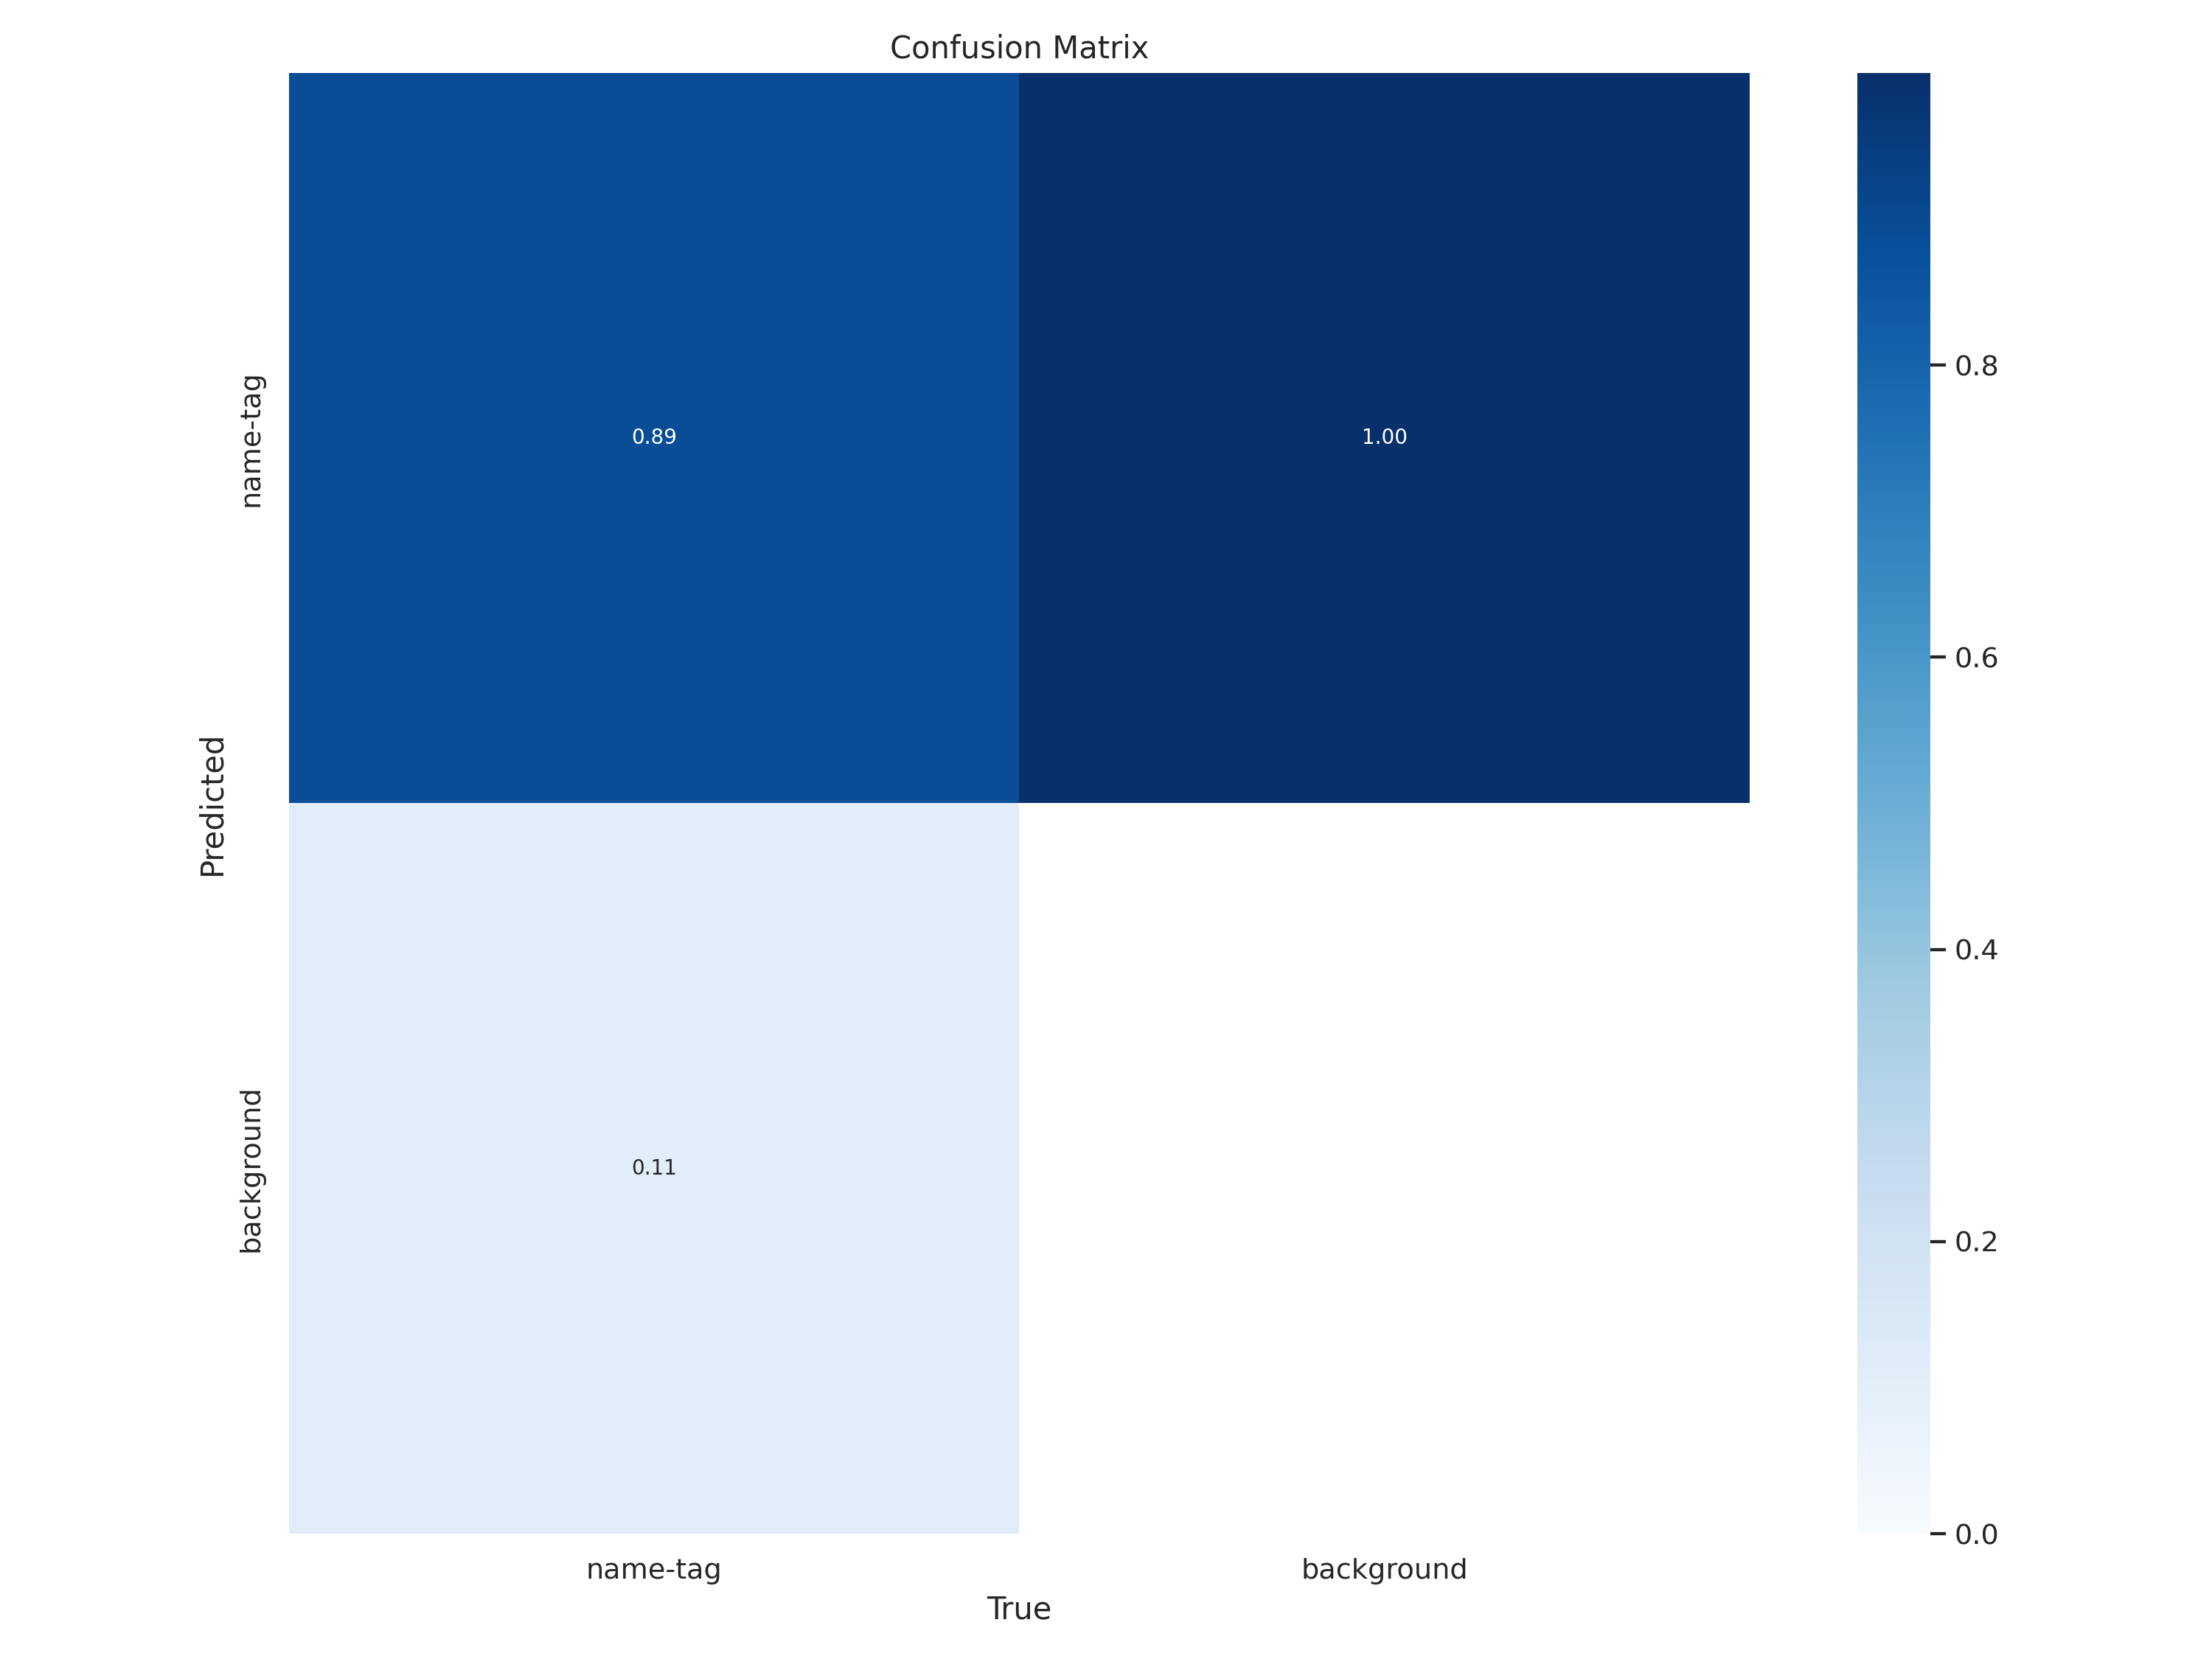

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

- show how many correct detect name-tag

/kaggle/working


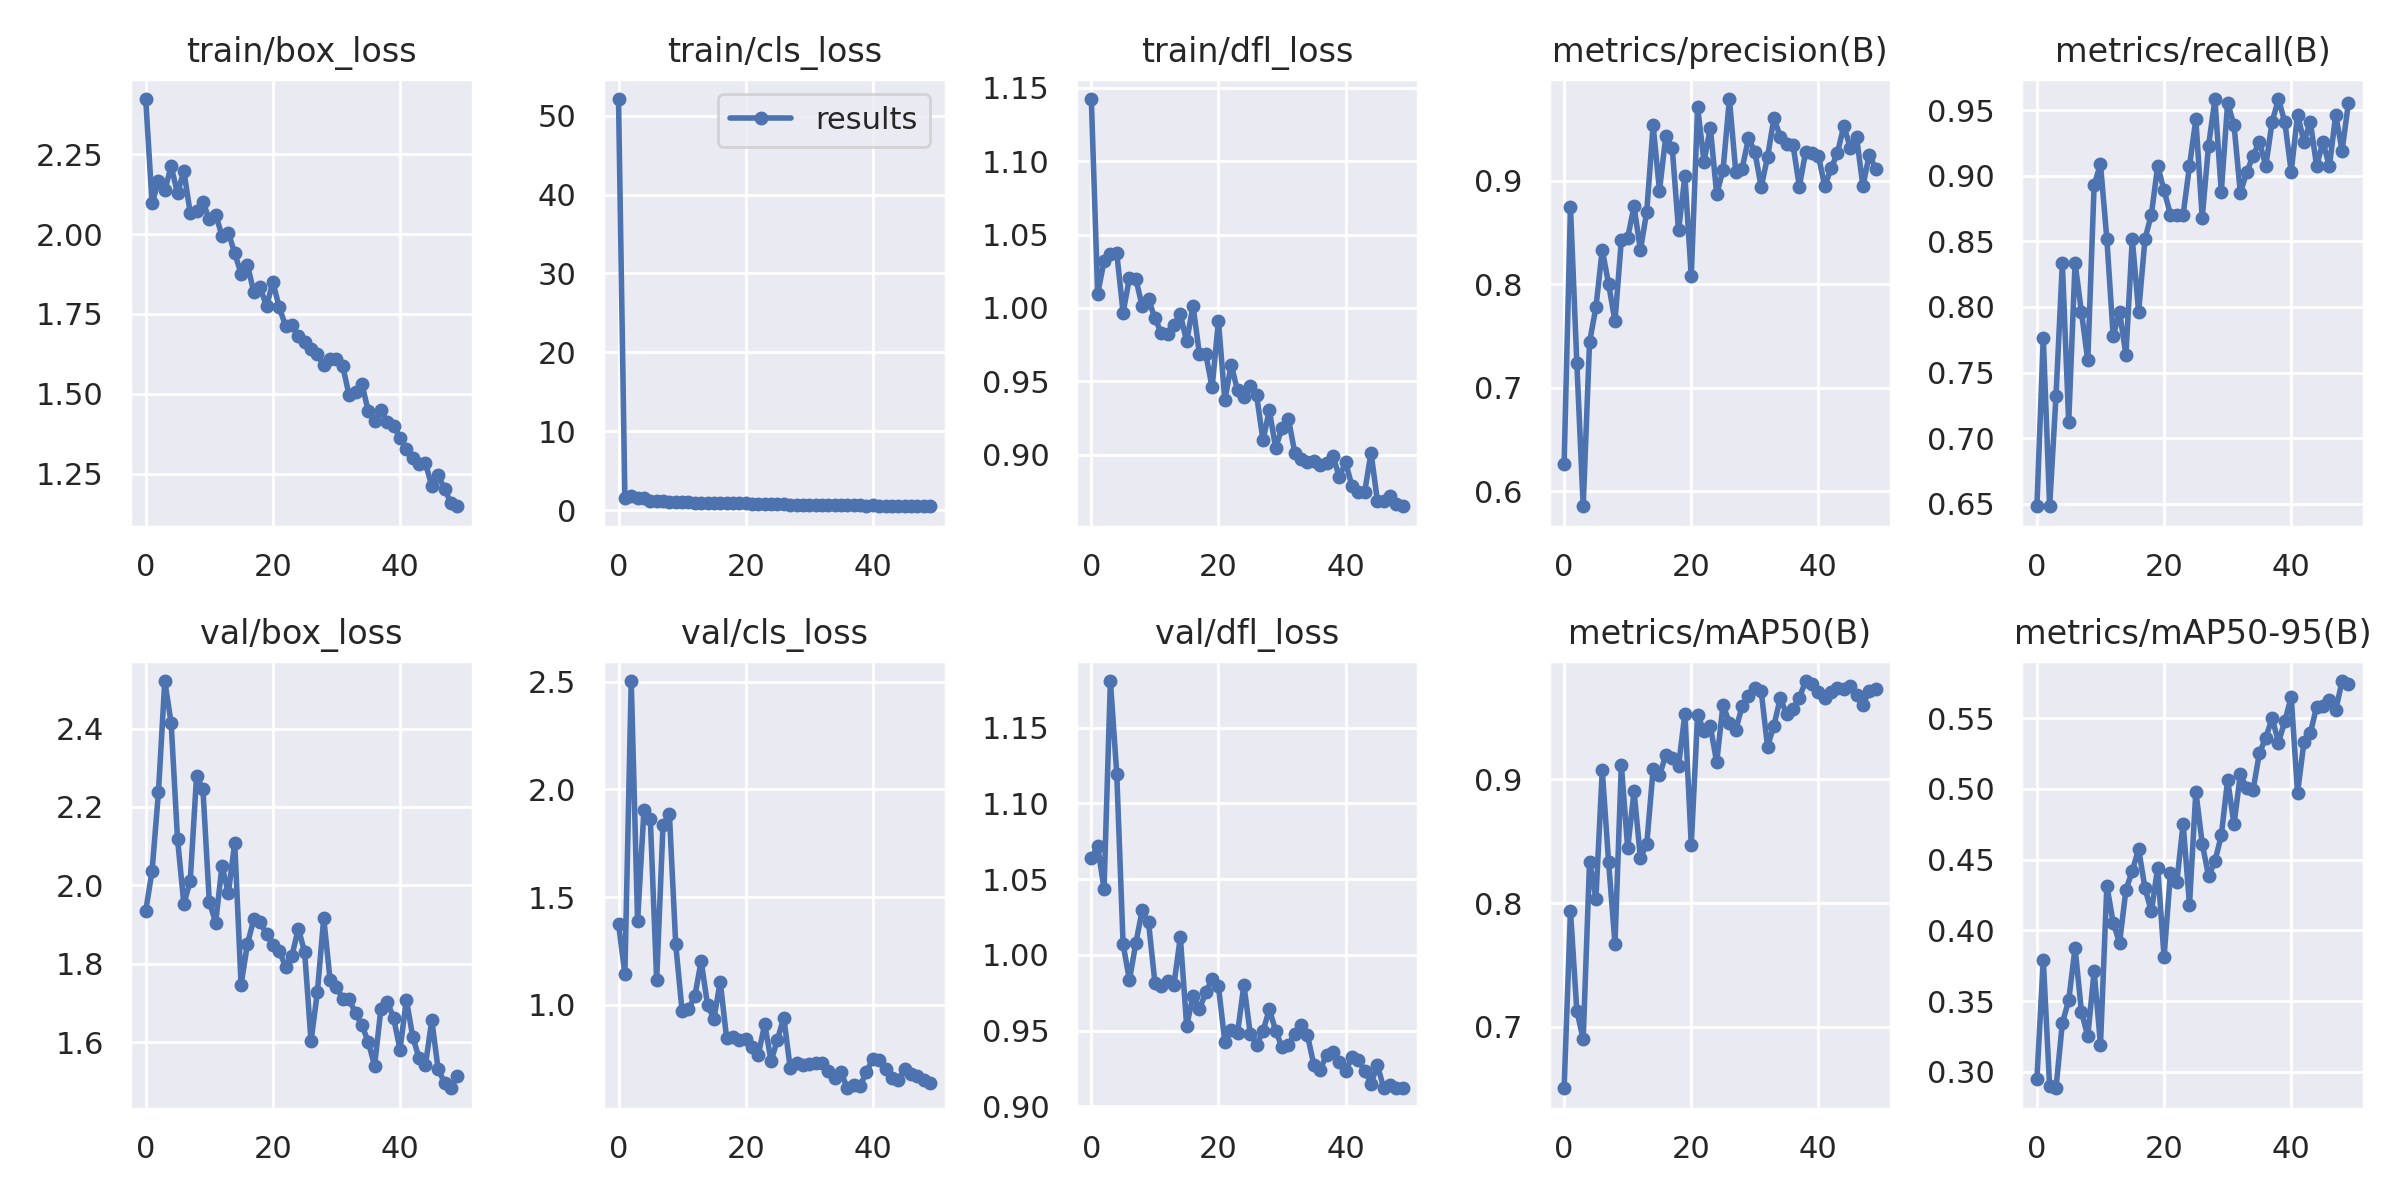

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


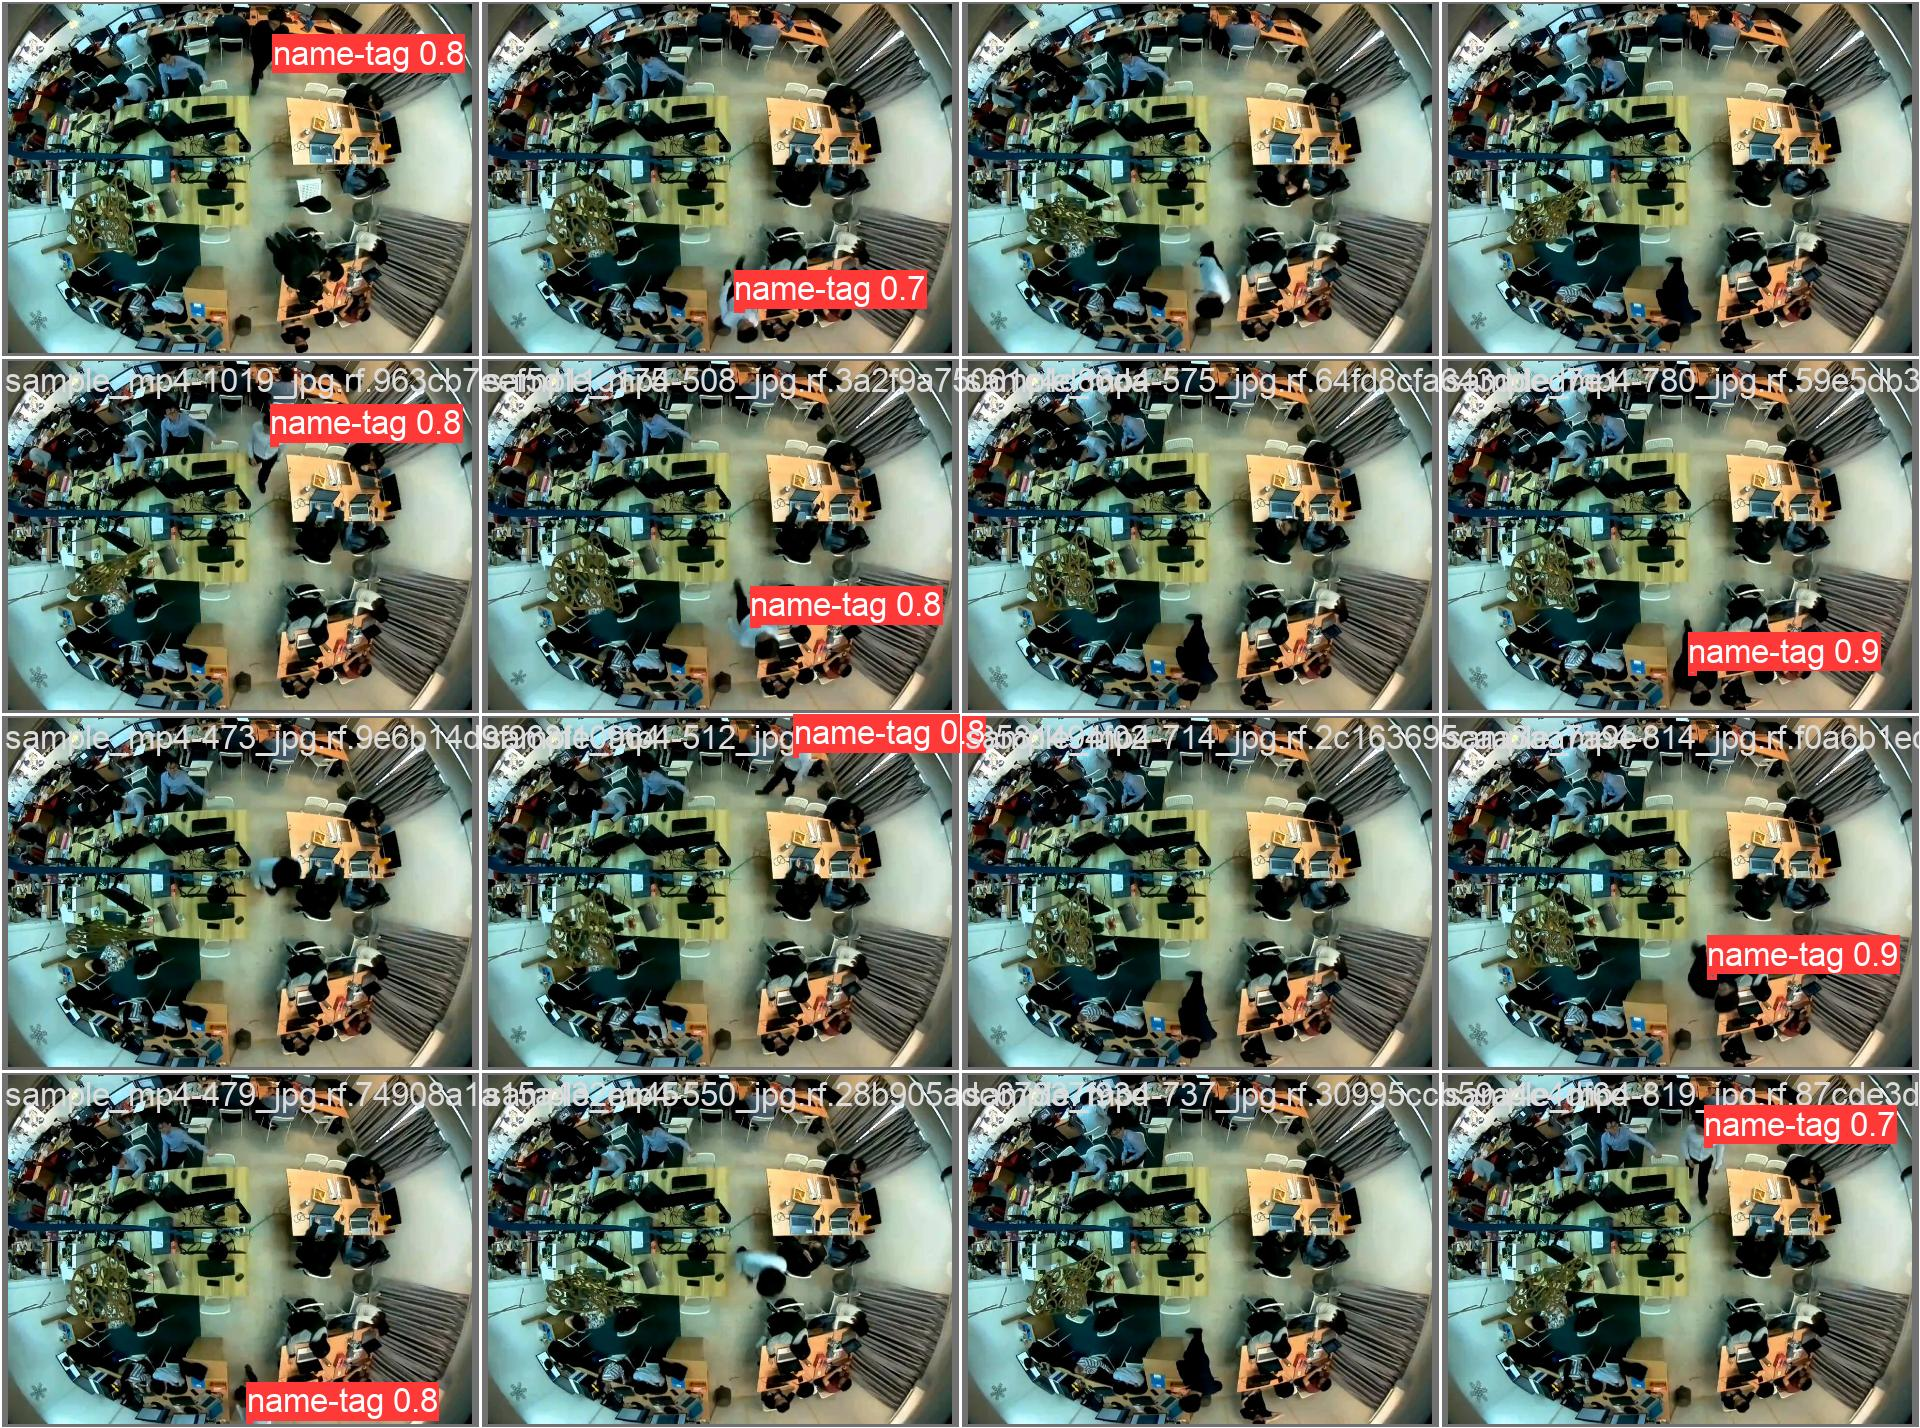

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

#### Validate the model

In [10]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/valid/label


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.926      0.926      0.972      0.595


Speed: 5.4ms pre-process, 9.2ms inference, 0.0ms loss, 1.5ms post-process per image


#### Predict with model

- predict with test set data

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


image 1/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1013_jpg.rf.5c7ca3f01ad3a27ca195984a7c69e58d.jpg: 736x960 1 name-tag, 75.0ms
image 2/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1016_jpg.rf.3c16bdda6ccb99354fe5a910b215143d.jpg: 736x960 1 name-tag, 9.6ms


image 3/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1021_jpg.rf.f373698fccf02d205e7328db248c56d2.jpg: 736x960 1 name-tag, 9.6ms


image 4/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1025_jpg.rf.48989990eb2b347b20287dfd6f9dedf6.jpg: 736x960 1 name-tag, 9.6ms


image 5/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1062_jpg.rf.1c6165959facf0a6143f31c7aee507d6.jpg: 736x960 1 name-tag, 9.6ms
image 6/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1086_jpg.rf.068247a13092af2dbe9af096a9f41d84.jpg: 736x960 9.6ms


image 7/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1105_jpg.rf.f3ad23b757d02da580840ab6b8482a42.jpg: 736x960 1 name-tag, 9.6ms


image 8/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1108_jpg.rf.4651603da382fec65bf747d3d5e665e1.jpg: 736x960 1 name-tag, 9.6ms


image 9/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1109_jpg.rf.1f1e9ce9aadc97031f42f07deb4c6ffe.jpg: 736x960 1 name-tag, 9.6ms
image 10/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1114_jpg.rf.35bade76cb4bbfe0e492ad52c62518bd.jpg: 736x960 1 name-tag, 9.6ms


image 11/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1115_jpg.rf.b92d2f87e3ca2b23a64586fbf0250b76.jpg: 736x960 1 name-tag, 9.6ms


image 12/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1170_jpg.rf.6dd8a7461f2330750ba167e237bf510f.jpg: 736x960 1 name-tag, 9.6ms


image 13/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1224_jpg.rf.20e3d6dc35e8e2c2a0c051075ee2e32d.jpg: 736x960 9.6ms
image 14/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1239_jpg.rf.2f38f4f72e722cf4b6719485dd64358f.jpg: 736x960 1 name-tag, 9.6ms


image 15/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-339_jpg.rf.674661f38e2e51a2e4cdf70a6afd37c9.jpg: 736x960 1 name-tag, 9.6ms


image 16/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-381_jpg.rf.fe43268b51e6c2fde4a0da4abae3f5f3.jpg: 736x960 1 name-tag, 9.6ms


image 17/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-383_jpg.rf.707e4a37c78cb87ed7c33d9f049eb27b.jpg: 736x960 1 name-tag, 9.6ms
image 18/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-433_jpg.rf.18bc9b9595004a72a32eccd648e385dd.jpg: 736x960 1 name-tag, 9.6ms


image 19/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-474_jpg.rf.38b309e08f6cb935f2b7ece9d50af100.jpg: 736x960 1 name-tag, 9.6ms


image 20/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-509_jpg.rf.b4dea78c3a75c810ee16e8d38fd9e41d.jpg: 736x960 1 name-tag, 9.7ms


image 21/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-515_jpg.rf.b476d48ea894397b984650087f4003fe.jpg: 736x960 1 name-tag, 9.6ms


image 22/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-548_jpg.rf.cac4c7472f4f3bec01c2b7862b0fefd1.jpg: 736x960 1 name-tag, 9.6ms
image 23/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-560_jpg.rf.461de8c1676466e0ce8c75fcca5919f9.jpg: 736x960 1 name-tag, 9.6ms


image 24/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-655_jpg.rf.0f65748e8596efb33ef0166316caef64.jpg: 736x960 9.6ms


image 25/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-694_jpg.rf.b8f8cbffa8bd65e205c89227a665d524.jpg: 736x960 9.6ms


image 26/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-697_jpg.rf.9ba4ca0bbc6e404c032c357904738238.jpg: 736x960 9.6ms
image 27/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-704_jpg.rf.58e22f2c20381be071224718423b543b.jpg: 736x960 9.6ms


image 28/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-816_jpg.rf.23a2a935c52a155de520be90c5d8ff18.jpg: 736x960 1 name-tag, 9.6ms


image 29/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-837_jpg.rf.60306b9411582fb566ac4e29279ca239.jpg: 736x960 9.6ms


image 30/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-849_jpg.rf.407469a6c43f0309ecbe3e7c2943d2f7.jpg: 736x960 1 name-tag, 9.6ms
image 31/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-855_jpg.rf.e9f9fad069fb214191e3ddcca20b5567.jpg: 736x960 1 name-tag, 9.7ms


image 32/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-857_jpg.rf.79c01383afaee232833273fe6657bc7f.jpg: 736x960 1 name-tag, 9.6ms


image 33/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-971_jpg.rf.de9495dd3821e5d17b9d3f5aecb08e09.jpg: 736x960 1 name-tag, 9.6ms


image 34/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-976_jpg.rf.268671b16251ac5722d05fc063861410.jpg: 736x960 1 name-tag, 9.6ms
image 35/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-980_jpg.rf.3ef3d04afb59210f4bc403fc619b6b4a.jpg: 736x960 1 name-tag, 9.6ms


image 36/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-984_jpg.rf.46fce2465bfd85fbc5ec324095d14733.jpg: 736x960 1 name-tag, 9.6ms
Speed: 0.8ms pre-process, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 960, 960)
Results saved to runs/detect/predict


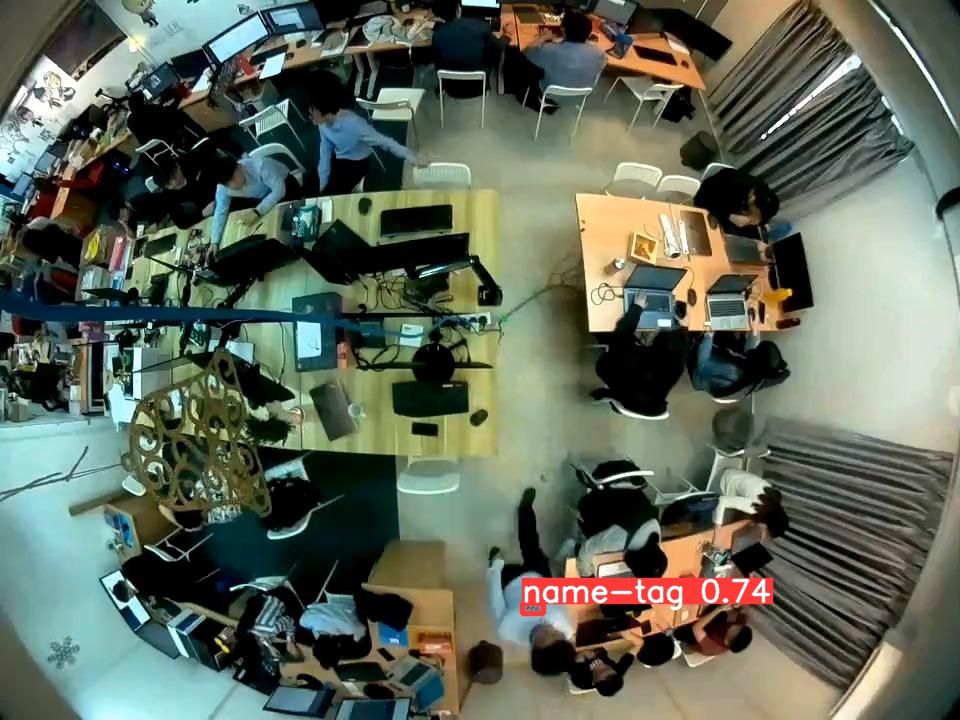

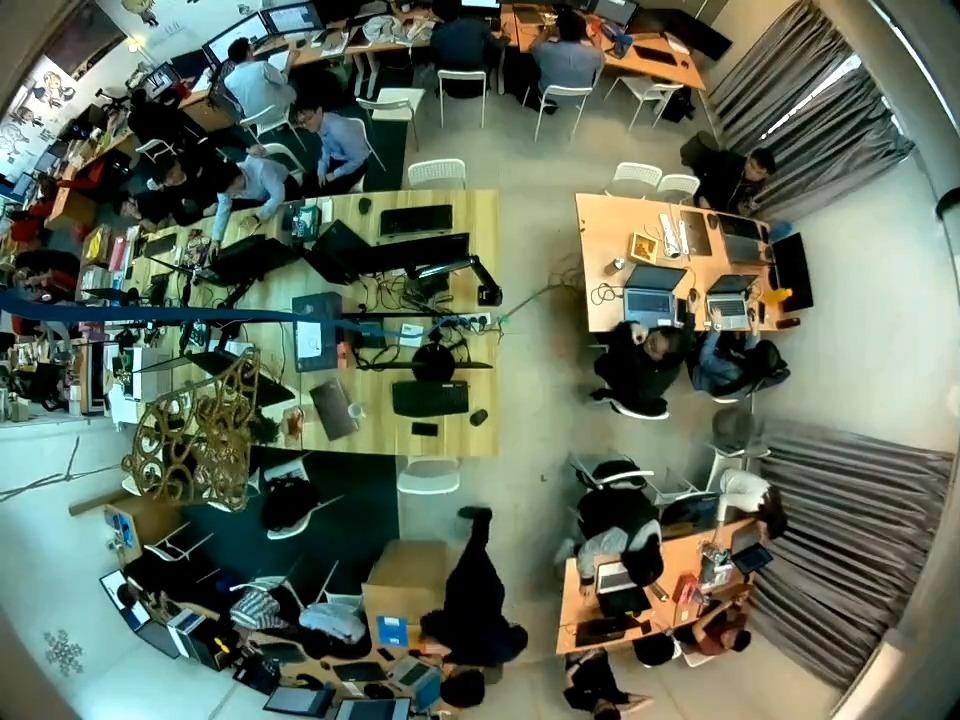

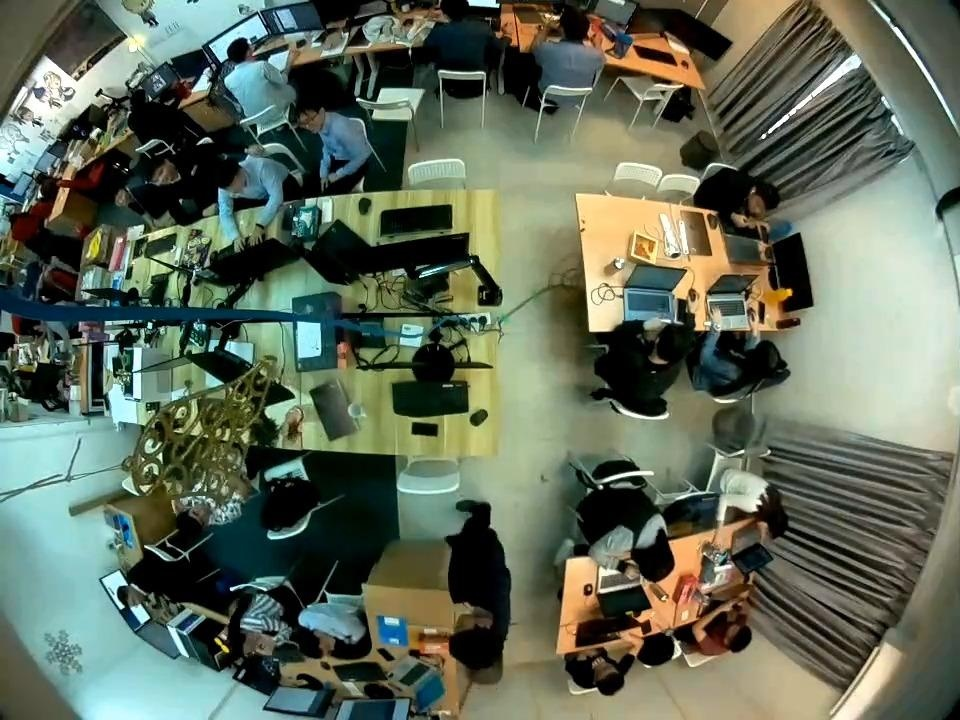

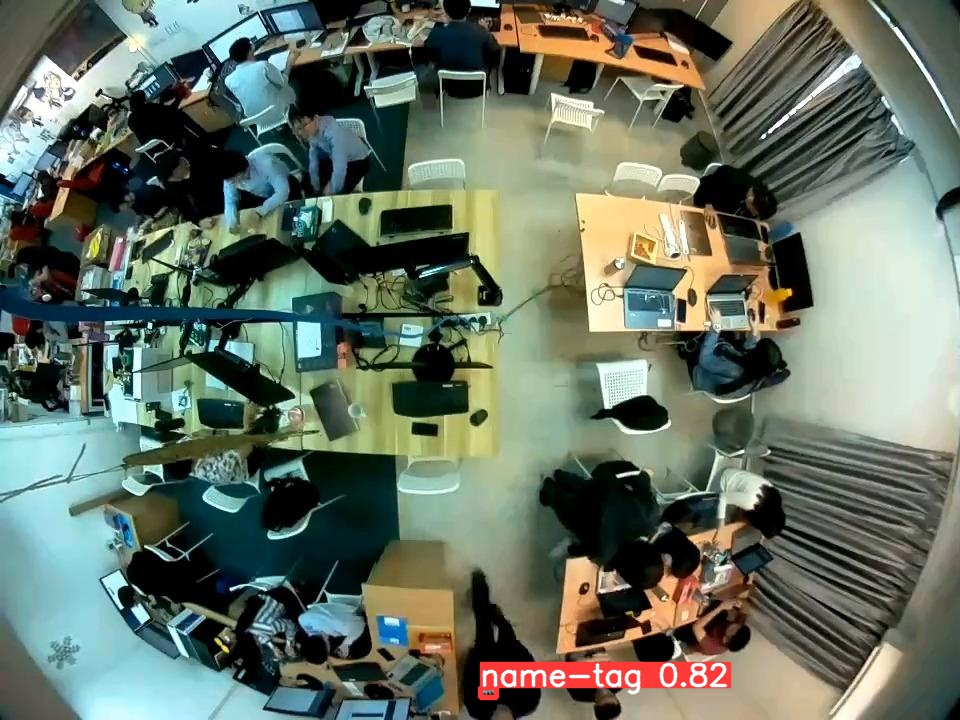

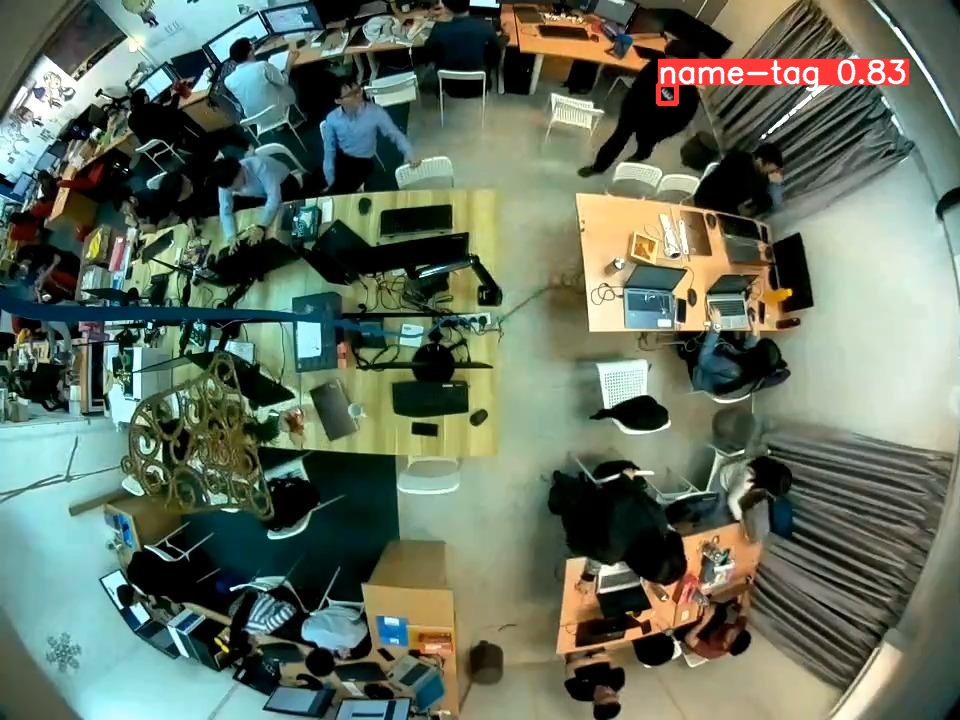

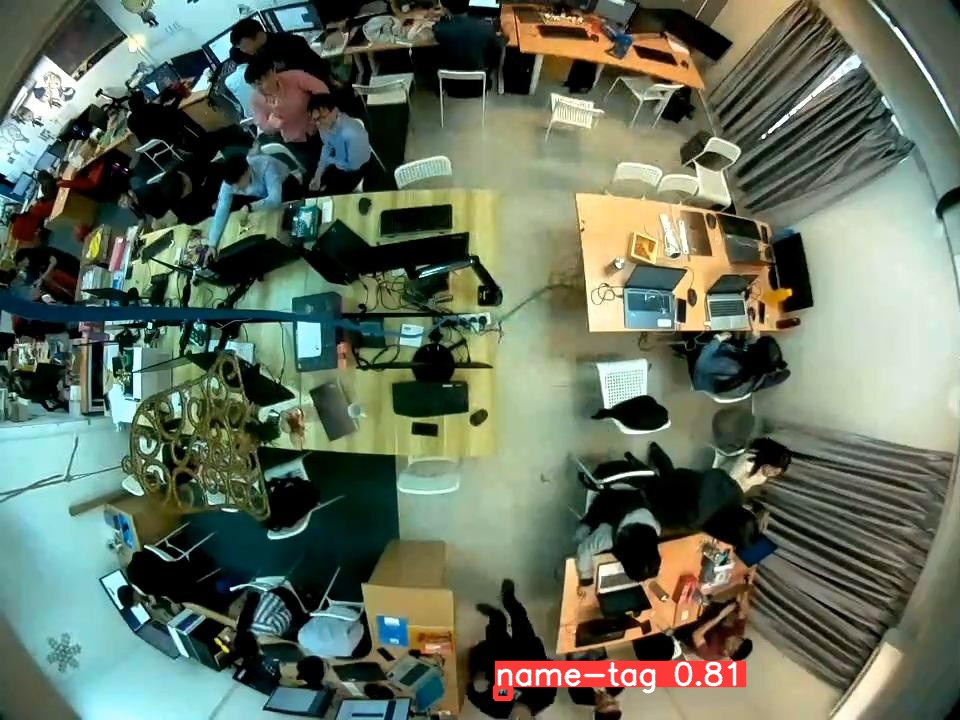

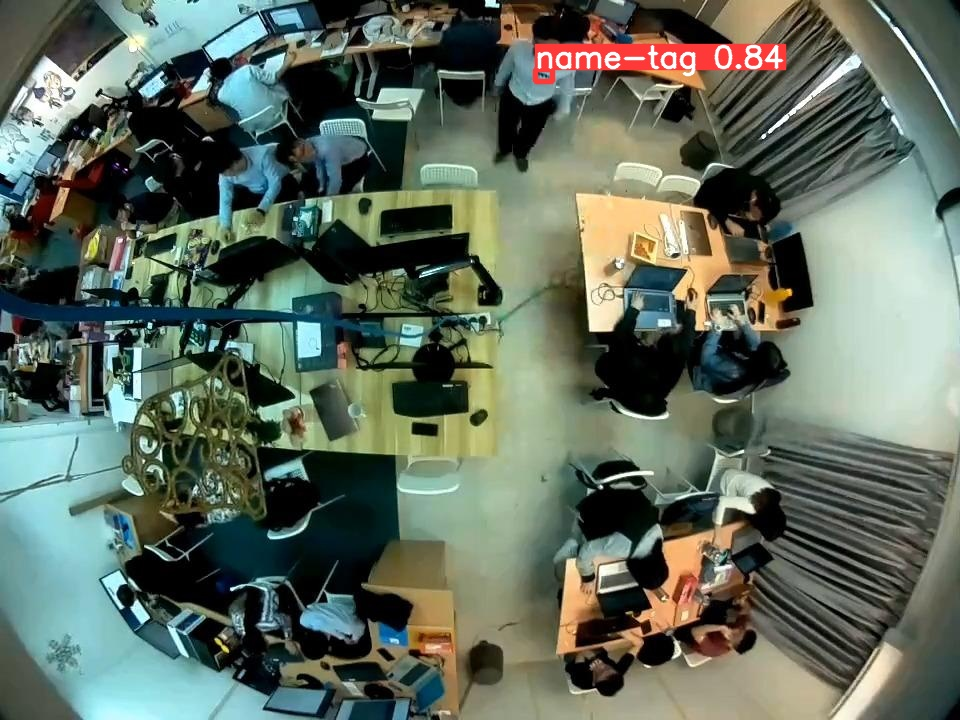

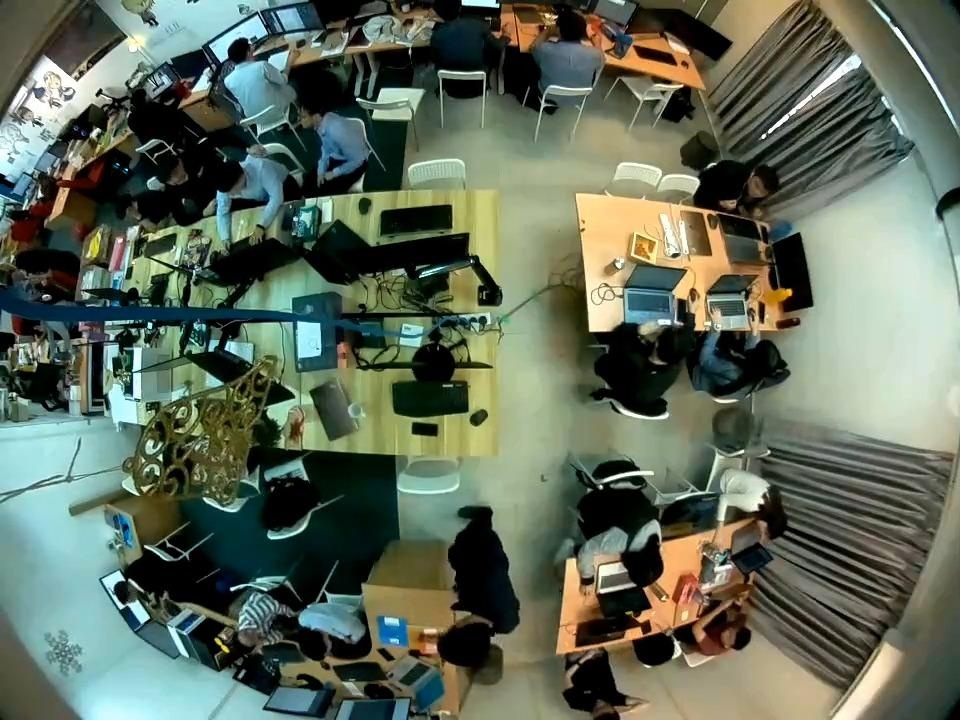

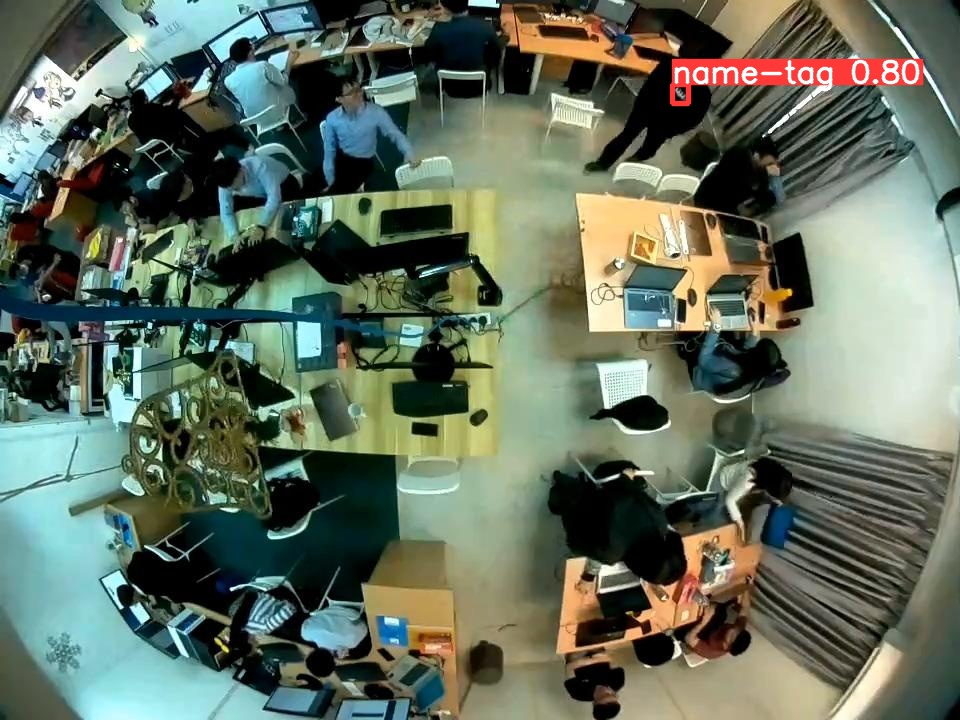

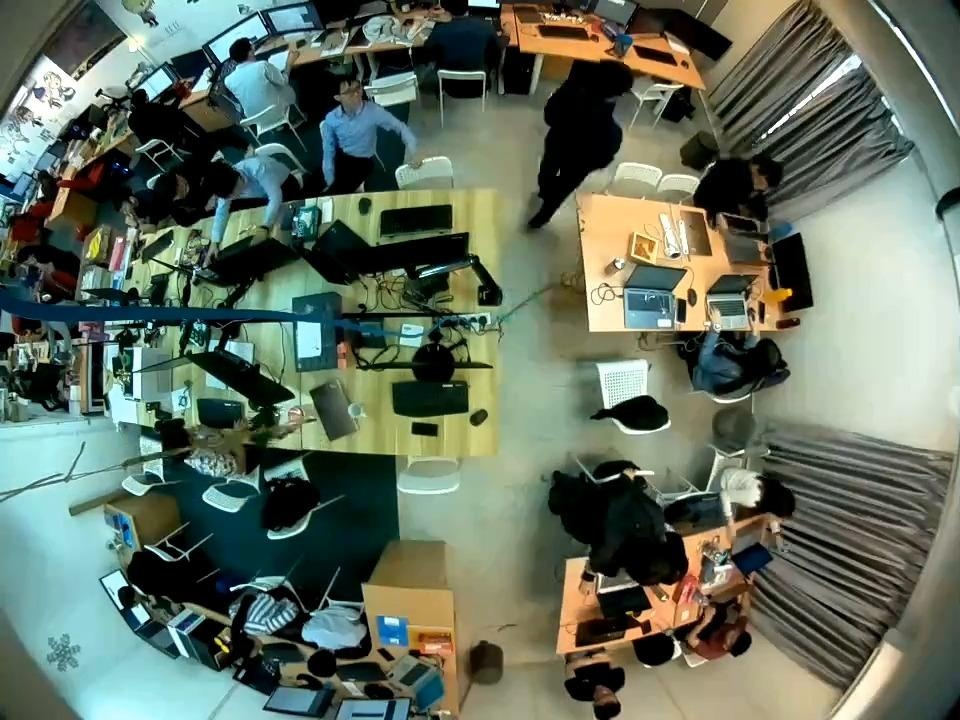

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

- used for predict sample.mp4 video

In [13]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/input/staff-attire-detect-sample-video/sample.mp4 save=True

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


video 1/1 (1/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 67.1ms


video 1/1 (2/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms
video 1/1 (3/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms


video 1/1 (4/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms
video 1/1 (5/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms
video 1/1 (6/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms


video 1/1 (7/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms
video 1/1 (8/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.3ms


video 1/1 (9/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.4ms
video 1/1 (10/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.4ms
video 1/1 (11/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.4ms


video 1/1 (12/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.3ms
video 1/1 (13/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.2ms


video 1/1 (14/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.2ms
video 1/1 (15/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.2ms
video 1/1 (16/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.8ms


video 1/1 (17/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (18/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (19/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (20/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (21/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (22/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (23/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (24/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (25/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (26/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (27/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (28/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (29/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (30/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (31/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (32/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (33/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (34/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (35/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (36/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (37/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (38/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (39/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (40/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (41/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (42/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (43/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (44/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (45/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (46/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (47/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (48/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (49/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (50/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (51/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (52/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (53/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (54/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (55/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (56/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (57/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (58/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (59/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (60/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (61/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (62/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (63/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (64/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (65/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (66/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (67/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (68/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (69/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (70/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (71/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (72/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (73/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (74/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (75/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (76/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (77/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (78/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (79/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (80/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (81/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (82/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (83/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (84/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (85/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (86/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (87/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (88/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (89/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (90/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (91/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (92/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (93/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (94/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (95/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (96/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (97/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (98/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (99/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (100/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (101/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (102/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (103/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (104/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (105/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (106/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (107/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (108/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (109/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (110/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (111/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (112/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (113/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (114/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (115/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (116/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (117/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (118/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (119/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (120/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (121/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (122/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (123/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (124/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (125/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (126/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (127/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (128/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (129/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (130/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (131/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (132/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (133/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (134/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (135/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (136/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (137/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (138/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (139/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (140/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (141/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (142/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (143/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (144/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (145/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (146/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (147/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (148/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (149/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (150/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (151/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (152/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (153/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (154/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (155/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (156/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (157/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (158/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (159/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (160/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (161/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (162/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (163/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (164/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (165/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (166/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (167/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (168/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (169/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (170/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (171/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (172/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (173/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (174/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (175/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (176/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (177/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (178/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (179/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (180/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (181/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (182/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (183/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (184/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (185/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (186/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (187/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (188/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (189/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (190/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (191/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (192/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (193/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (194/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (195/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (196/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (197/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (198/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (199/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (200/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (201/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (202/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (203/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (204/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (205/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (206/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (207/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (208/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (209/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (210/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (211/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (212/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (213/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (214/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (215/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (216/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (217/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (218/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (219/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (220/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (221/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (222/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (223/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (224/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (225/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (226/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (227/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (228/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (229/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (230/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (231/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (232/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (233/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (234/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (235/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (236/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms


video 1/1 (237/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (238/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (239/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (240/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (241/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (242/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (243/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (244/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (245/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (246/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (247/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (248/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (249/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (250/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (251/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (252/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (253/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (254/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (255/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (256/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (257/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (258/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (259/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (260/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (261/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (262/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (263/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (264/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (265/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (266/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (267/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (268/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (269/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (270/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (271/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (272/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (273/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (274/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (275/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (276/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (277/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (278/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (279/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (280/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (281/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (282/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (283/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (284/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (285/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (286/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (287/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (288/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (289/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (290/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (291/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (292/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (293/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (294/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (295/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (296/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (297/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (298/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (299/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (300/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (301/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (302/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (303/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (304/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (305/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (306/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (307/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (308/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (309/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (310/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (311/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (312/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (313/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (314/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (315/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (316/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (317/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (318/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (319/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (320/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (321/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (322/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (323/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (324/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (325/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (326/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (327/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (328/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (329/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (330/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (331/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (332/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (333/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (334/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (335/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (336/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (337/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (338/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (339/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (340/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (341/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (342/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (343/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (344/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (345/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (346/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (347/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (348/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (349/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (350/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (351/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (352/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (353/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (354/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (355/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (356/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (357/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (358/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (359/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (360/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (361/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (362/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (363/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (364/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (365/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (366/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (367/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (368/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (369/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (370/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (371/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (372/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (373/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (374/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (375/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (376/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (377/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (378/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (379/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (380/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (381/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (382/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (383/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (384/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (385/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (386/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (387/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (388/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (389/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (390/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (391/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (392/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (393/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (394/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (395/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (396/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (397/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (398/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (399/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (400/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (401/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (402/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (403/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (404/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (405/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (406/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (407/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (408/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (409/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (410/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (411/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (412/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (413/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (414/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms


video 1/1 (415/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (416/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (417/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (418/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (419/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (420/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (421/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (422/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (423/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (424/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (425/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (426/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (427/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (428/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (429/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.5ms
video 1/1 (430/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (431/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (432/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (433/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (434/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (435/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (436/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (437/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (438/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (439/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (440/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (441/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (442/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (443/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (444/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (445/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (446/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (447/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (448/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (449/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (450/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (451/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (452/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (453/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (454/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (455/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (456/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (457/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (458/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (459/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (460/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (461/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (462/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (463/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (464/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (465/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (466/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (467/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (468/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (469/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (470/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (471/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (472/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (473/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (474/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (475/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (476/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (477/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (478/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (479/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (480/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (481/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (482/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (483/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (484/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (485/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (486/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (487/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (488/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (489/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (490/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (491/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (492/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (493/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (494/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (495/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (496/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (497/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (498/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (499/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (500/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (501/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (502/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (503/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.5ms
video 1/1 (504/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (505/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (506/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (507/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (508/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (509/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (510/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (511/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.5ms
video 1/1 (512/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (513/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (514/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (515/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (516/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (517/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (518/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (519/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (520/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (521/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (522/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (523/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (524/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (525/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (526/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (527/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (528/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (529/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (530/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (531/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (532/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (533/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms


video 1/1 (534/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (535/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (536/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (537/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (538/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (539/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (540/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (541/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (542/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (543/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (544/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (545/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (546/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (547/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (548/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (549/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (550/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (551/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (552/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (553/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (554/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (555/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (556/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (557/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (558/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (559/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (560/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (561/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (562/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (563/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (564/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (565/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (566/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (567/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (568/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (569/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (570/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (571/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (572/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (573/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (574/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (575/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (576/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (577/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (578/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (579/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (580/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (581/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (582/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (583/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (584/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (585/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (586/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (587/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (588/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (589/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (590/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (591/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (592/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (593/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (594/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (595/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (596/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (597/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (598/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (599/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (600/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (601/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (602/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (603/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (604/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (605/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (606/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (607/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (608/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (609/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (610/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (611/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (612/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (613/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (614/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (615/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (616/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (617/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (618/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (619/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (620/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (621/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (622/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (623/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (624/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (625/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (626/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (627/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (628/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (629/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (630/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (631/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (632/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (633/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (634/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (635/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (636/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (637/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (638/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (639/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (640/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (641/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (642/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (643/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (644/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (645/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (646/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (647/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (648/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (649/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (650/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (651/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (652/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (653/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (654/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (655/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (656/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (657/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (658/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (659/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (660/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (661/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (662/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (663/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (664/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (665/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (666/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (667/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (668/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (669/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (670/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (671/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (672/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (673/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (674/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (675/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (676/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (677/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (678/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (679/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (680/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (681/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (682/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (683/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (684/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (685/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (686/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (687/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (688/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (689/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (690/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (691/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (692/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (693/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (694/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (695/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (696/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (697/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (698/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (699/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (700/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (701/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (702/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (703/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (704/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (705/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (706/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (707/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (708/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (709/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (710/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (711/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (712/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (713/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (714/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (715/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (716/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (717/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (718/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (719/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (720/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (721/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (722/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (723/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (724/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (725/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (726/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (727/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (728/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (729/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (730/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (731/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (732/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (733/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (734/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (735/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (736/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (737/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (738/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (739/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (740/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (741/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (742/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (743/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (744/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (745/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (746/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (747/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (748/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (749/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (750/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (751/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (752/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (753/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (754/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (755/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (756/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (757/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (758/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (759/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (760/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (761/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (762/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (763/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (764/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (765/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (766/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (767/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (768/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (769/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (770/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (771/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (772/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (773/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (774/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (775/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (776/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (777/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (778/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (779/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (780/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (781/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (782/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (783/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (784/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (785/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (786/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (787/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (788/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (789/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (790/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (791/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (792/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (793/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (794/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (795/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (796/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (797/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (798/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (799/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (800/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (801/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (802/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (803/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (804/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (805/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (806/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (807/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (808/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (809/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (810/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (811/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (812/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (813/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (814/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (815/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (816/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (817/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (818/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (819/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (820/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (821/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (822/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (823/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (824/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (825/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (826/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (827/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (828/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (829/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (830/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (831/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (832/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (833/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (834/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (835/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (836/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (837/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (838/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (839/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (840/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (841/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (842/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (843/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (844/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (845/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (846/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (847/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (848/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (849/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (850/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (851/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (852/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (853/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (854/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (855/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (856/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (857/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (858/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (859/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (860/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 2 name-tags, 9.6ms


video 1/1 (861/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (862/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (863/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (864/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (865/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (866/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (867/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (868/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (869/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (870/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (871/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (872/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (873/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (874/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (875/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (876/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (877/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (878/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (879/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (880/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (881/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (882/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (883/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (884/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (885/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (886/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (887/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (888/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (889/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (890/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (891/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (892/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (893/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (894/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (895/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (896/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (897/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.5ms


video 1/1 (898/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (899/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (900/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (901/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (902/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (903/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (904/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (905/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (906/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (907/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (908/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (909/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (910/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (911/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (912/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (913/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (914/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (915/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (916/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (917/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (918/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (919/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (920/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (921/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (922/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (923/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (924/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (925/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (926/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (927/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (928/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (929/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (930/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (931/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (932/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (933/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (934/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (935/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (936/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (937/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (938/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (939/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (940/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (941/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (942/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (943/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (944/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (945/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (946/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (947/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (948/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (949/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (950/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (951/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (952/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (953/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (954/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (955/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (956/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (957/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (958/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (959/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (960/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (961/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (962/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (963/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (964/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (965/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (966/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (967/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (968/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (969/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (970/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (971/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (972/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (973/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (974/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (975/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (976/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (977/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (978/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (979/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (980/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (981/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (982/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (983/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (984/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (985/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (986/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (987/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (988/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (989/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (990/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (991/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (992/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (993/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (994/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (995/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (996/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (997/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (998/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (999/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1000/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1001/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1002/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1003/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1004/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1005/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1006/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1007/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1008/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1009/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1010/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1011/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1012/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1013/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1014/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1015/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1016/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1017/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1018/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1019/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1020/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1021/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1022/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1023/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1024/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1025/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1026/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1027/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1028/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1029/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1030/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1031/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1032/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1033/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1034/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1035/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms
video 1/1 (1036/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1037/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1038/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1039/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1040/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1041/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1042/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1043/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1044/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms


video 1/1 (1045/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1046/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1047/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms


video 1/1 (1048/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1049/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1050/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1051/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1052/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1053/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1054/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1055/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1056/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1057/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1058/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1059/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1060/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1061/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1062/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.5ms
video 1/1 (1063/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1064/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1065/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1066/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1067/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1068/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1069/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1070/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1071/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (1072/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1073/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1074/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1075/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1076/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1077/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1078/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1079/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1080/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1081/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1082/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1083/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1084/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1085/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1086/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1087/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1088/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1089/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1090/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1091/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1092/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1093/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1094/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1095/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1096/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1097/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1098/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1099/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1100/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1101/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1102/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1103/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (1104/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1105/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1106/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 2 name-tags, 9.7ms


video 1/1 (1107/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1108/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1109/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1110/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1111/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1112/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1113/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (1114/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1115/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1116/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1117/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1118/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1119/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1120/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1121/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1122/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1123/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1124/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (1125/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1126/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1127/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1128/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1129/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1130/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1131/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1132/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1133/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1134/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1135/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1136/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1137/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1138/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1139/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1140/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1141/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1142/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1143/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1144/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1145/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1146/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1147/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1148/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1149/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1150/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1151/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1152/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1153/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1154/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1155/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.5ms
video 1/1 (1156/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1157/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1158/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1159/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (1160/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1161/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1162/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1163/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1164/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1165/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1166/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1167/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1168/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1169/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1170/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1171/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1172/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1173/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1174/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1175/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1176/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1177/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1178/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1179/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1180/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1181/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1182/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1183/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1184/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1185/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1186/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1187/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1188/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1189/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1190/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1191/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1192/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1193/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1194/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1195/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1196/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1197/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1198/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (1199/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1200/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 2 name-tags, 9.7ms
video 1/1 (1201/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (1202/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1203/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1204/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1205/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1206/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1207/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.5ms
video 1/1 (1208/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1209/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1210/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1211/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1212/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1213/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1214/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1215/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1216/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1217/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1218/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1219/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1220/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1221/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1222/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1223/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1224/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1225/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1226/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1227/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1228/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1229/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1230/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1231/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1232/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1233/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1234/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1235/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1236/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1237/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1238/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1239/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1240/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1241/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (1242/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1243/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1244/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (1245/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1246/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1247/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1248/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1249/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1250/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1251/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1252/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1253/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1254/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1255/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1256/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1257/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1258/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1259/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1260/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1261/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms


video 1/1 (1262/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1263/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1264/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1265/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1266/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1267/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1268/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1269/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1270/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1271/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1272/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1273/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1274/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1275/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1276/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1277/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1278/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1279/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1280/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1281/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1282/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1283/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1284/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1285/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1286/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1287/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1288/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1289/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1290/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1291/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1292/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1293/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1294/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1295/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1296/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1297/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1298/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1299/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1300/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1301/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1302/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1303/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1304/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1305/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1306/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1307/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1308/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1309/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1310/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1311/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1312/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1313/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1314/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1315/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1316/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1317/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1318/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1319/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1320/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1321/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1322/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1323/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1324/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1325/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1326/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1327/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1328/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1329/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1330/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1331/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1332/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1333/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1334/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1335/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1336/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1337/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1338/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1339/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1340/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1341/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
Speed: 0.7ms pre-process, 9.7ms inference, 0.8ms postprocess per image at shape (1, 3, 960, 960)
Results saved to runs/detect/predict2


- check the result in the saved predict folder

In [ ]:
# Created output zip file
!zip -r staff_attire_detect_output.zip /kaggle/working/